In [168]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:\\Users\\asus\\OneDrive\\Desktop\\Final Portfolio Projects\\Telco Customer Churn Prediction')
df = pd.read_csv('Telco Customer Dataset.csv')

df.head()
df_copy = df.copy()

In [169]:
df.shape

(7043, 21)

In [170]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [172]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [173]:
num_cols = df.select_dtypes(include = 'int64' or 'float64').columns.tolist()
cat_cols = df.select_dtypes(include = 'object').columns.tolist()

In [174]:
df[num_cols].skew()

SeniorCitizen    1.833633
tenure           0.239540
dtype: float64

In [175]:
df['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

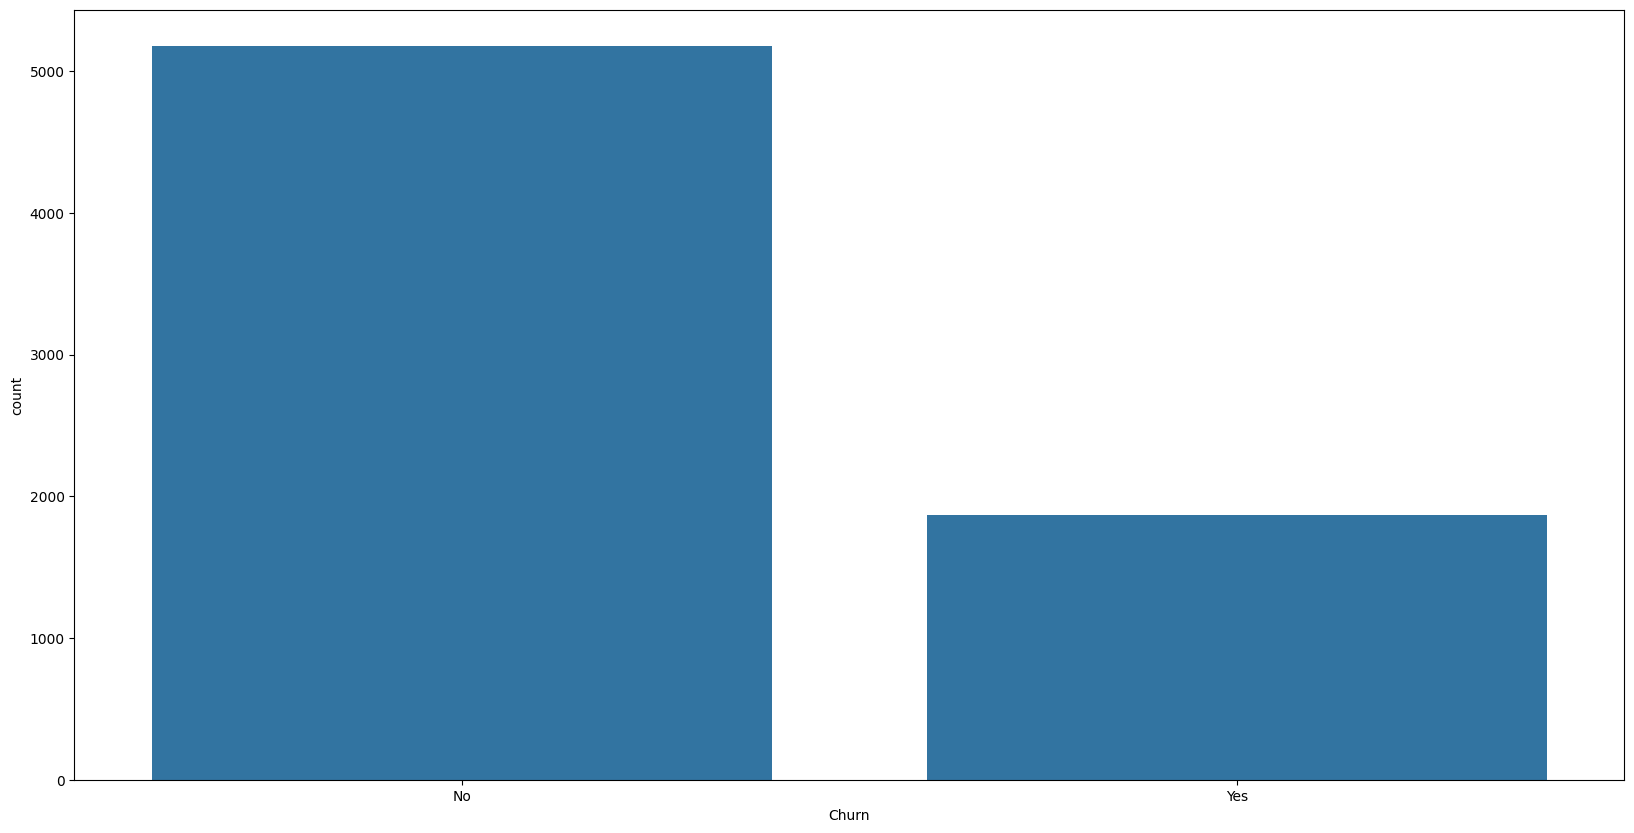

In [176]:
plt.figure(figsize = (20, 10))
sns.countplot(x = df['Churn'])
plt.show()

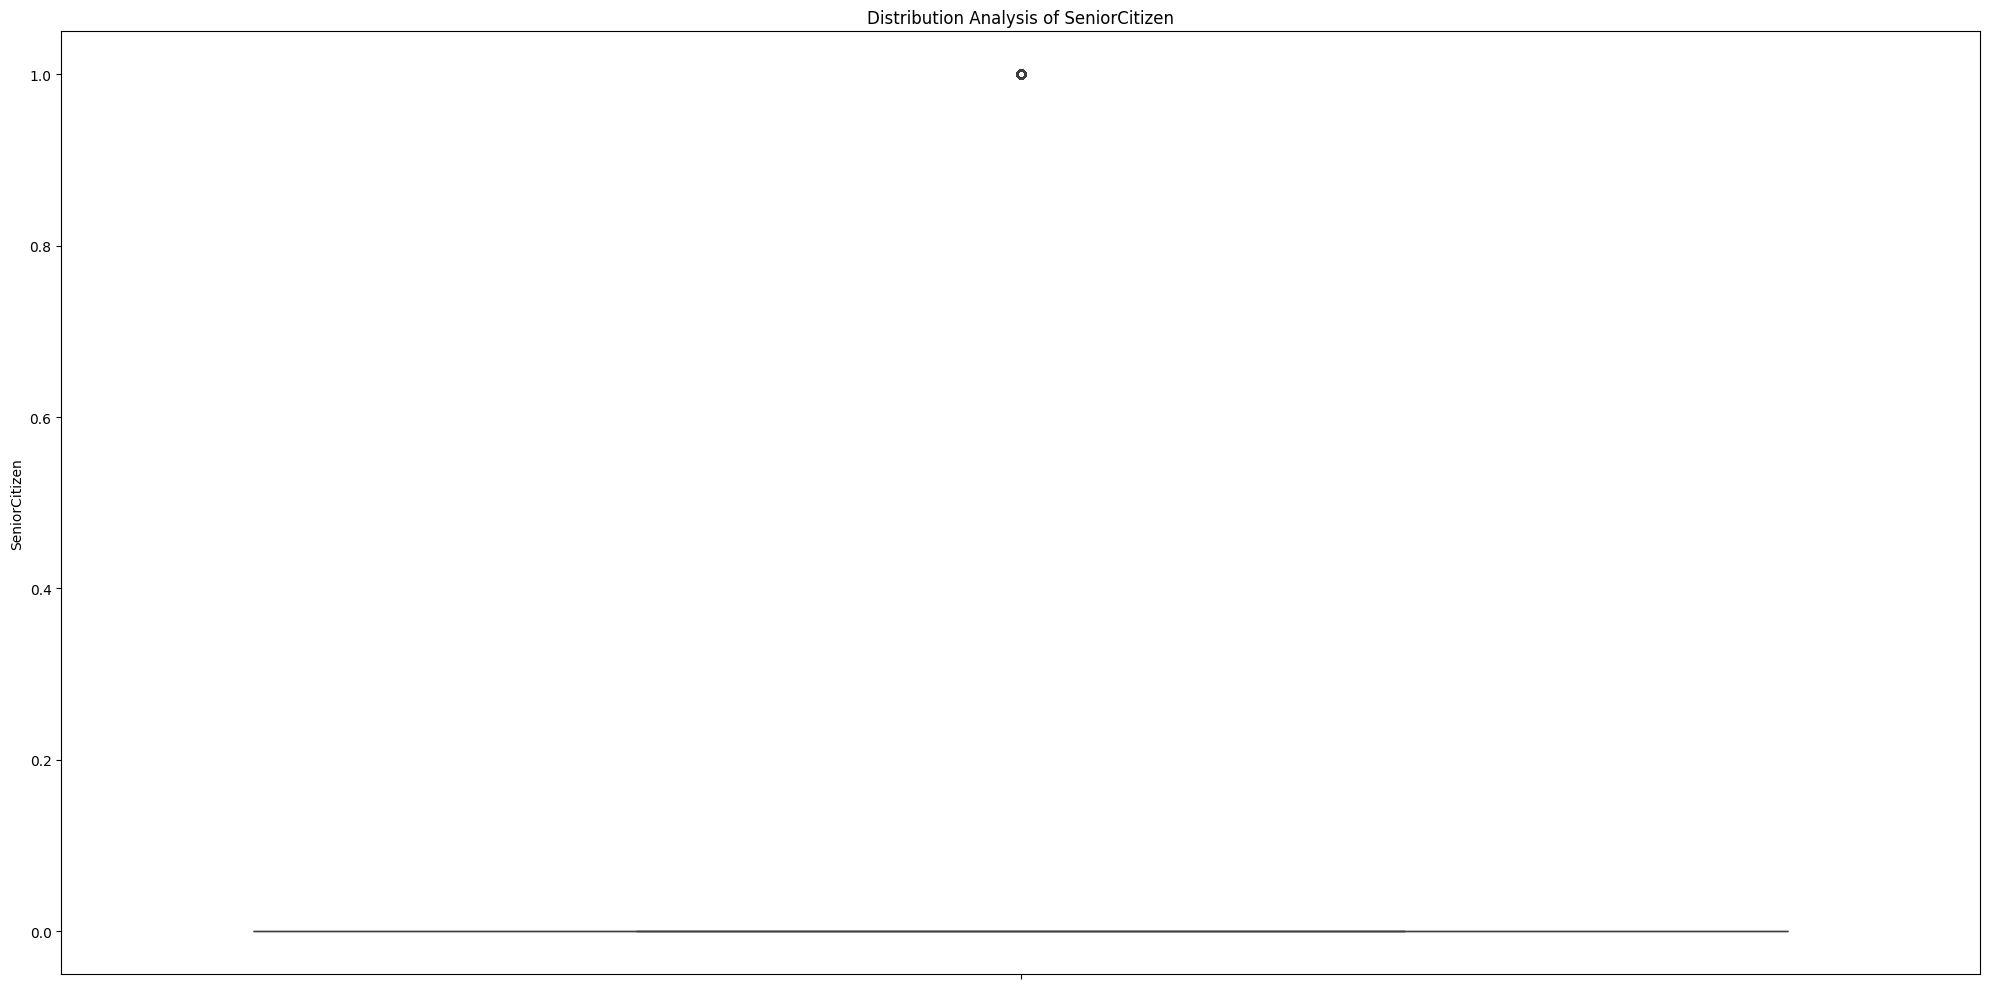

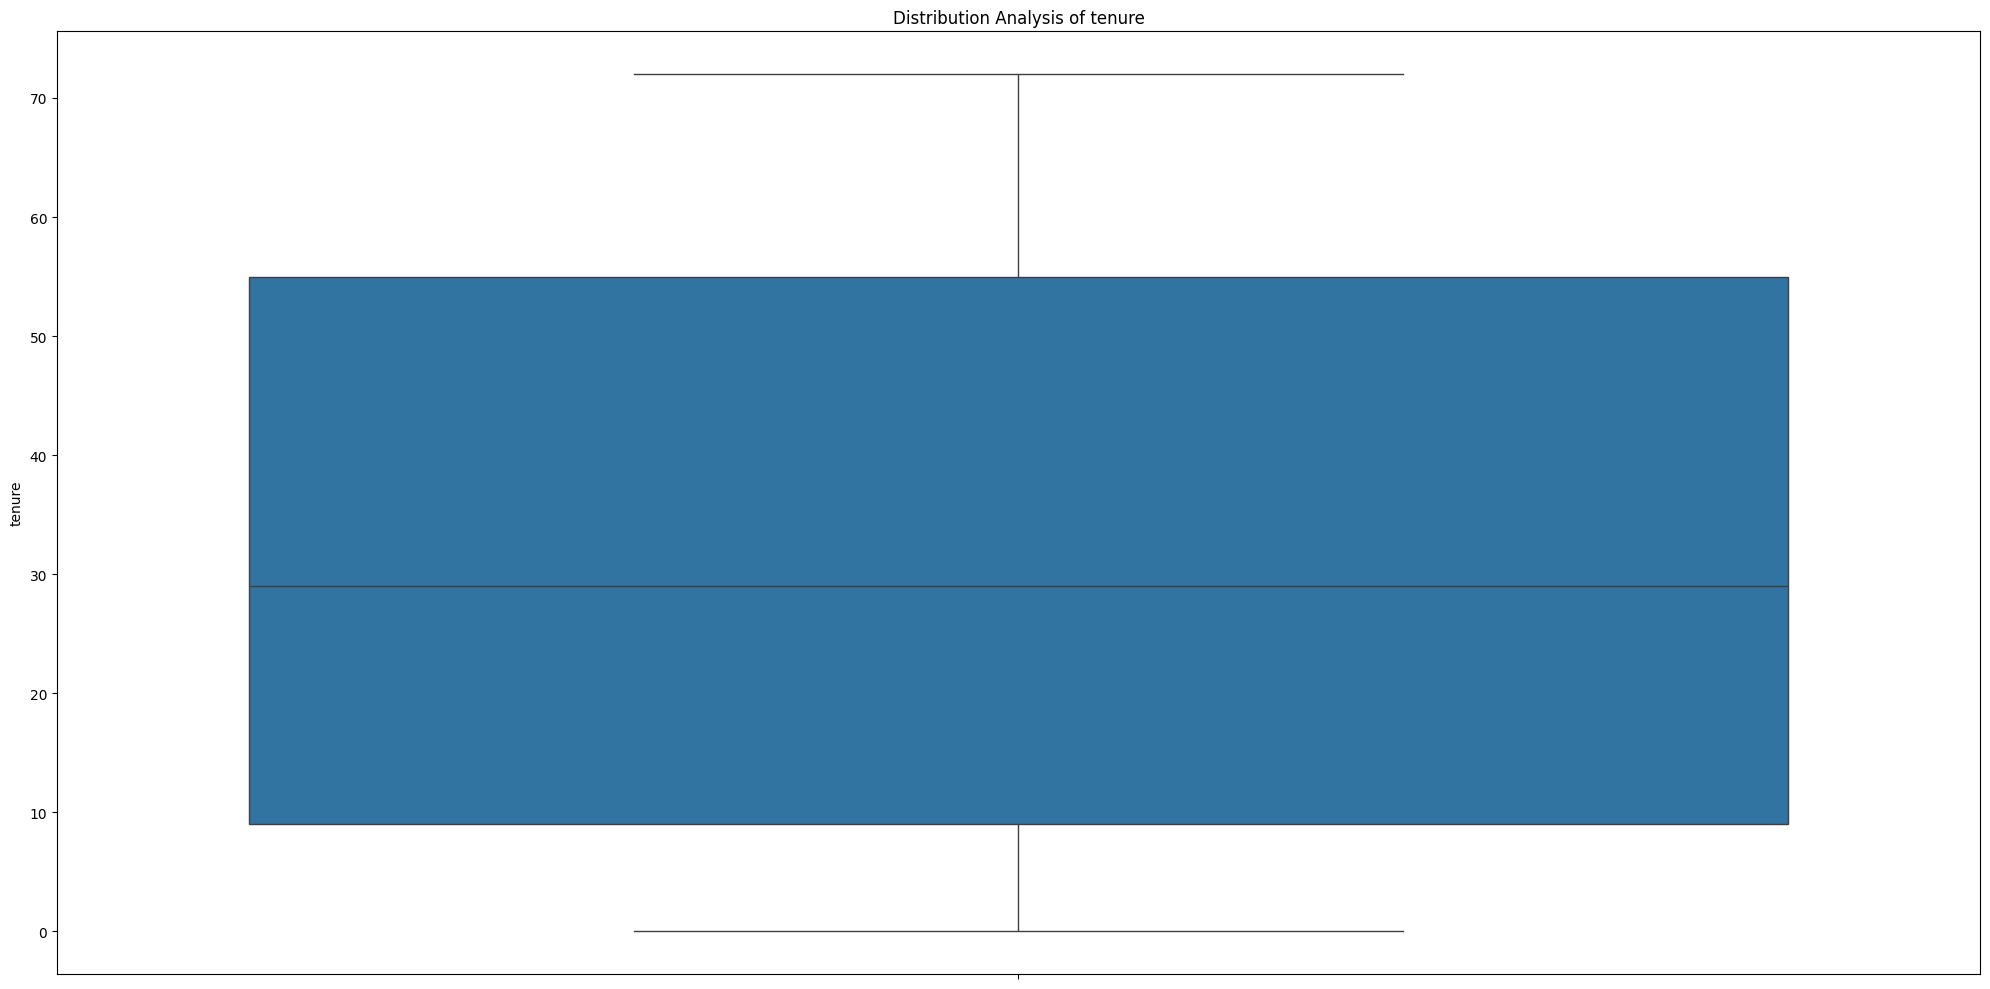

In [177]:
for cols in num_cols:
    plt.figure(figsize = (20, 10))
    sns.boxplot(df[cols])
    plt.title(f"Distribution Analysis of {cols}")
    plt.tight_layout()
    plt.show()

In [178]:
df[num_cols].skew()

SeniorCitizen    1.833633
tenure           0.239540
dtype: float64

In [179]:
num_cols.remove('SeniorCitizen') #Senior Citizen is binary - Not many Useful insights!

In [180]:
num_cols

['tenure']

In [181]:
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [182]:
df = df.drop('customerID', axis = 1)
cat_cols.remove('customerID')

In [183]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [184]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [185]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [186]:
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})

In [187]:
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})

In [188]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})

In [189]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [190]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [191]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [192]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [193]:
df['Contract'] = df['Contract'].replace({'Month-to-month': 'Monthly', 'Two year': 'BiYearly', 'One year': 'Yearly'})

In [194]:
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [195]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [196]:
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [197]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [198]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Monthly,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,Yearly,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Monthly,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,Yearly,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Monthly,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yearly,1,Mailed check,84.80,1990.5,0
7039,1,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yearly,1,Credit card (automatic),103.20,7362.9,0
7040,1,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Monthly,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Monthly,1,Mailed check,74.40,306.6,1


In [199]:
df['MultipleLines'] = df['MultipleLines'].map({'No phone service': 0, 'No': 0, 'Yes': 1})

In [200]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [201]:
df['HasInternetService'] = df['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

In [202]:
cols_to_fix = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for cols in cols_to_fix:
    df[cols] = df[cols].map({'No internet service': 0, 'No': 0, 'Yes': 1})

In [203]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [204]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService
0,1,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Monthly,1,Electronic check,29.85,29.85,0,1
1,0,0,0,0,34,1,0,DSL,1,0,...,0,0,0,Yearly,0,Mailed check,56.95,1889.5,0,1
2,0,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Monthly,1,Mailed check,53.85,108.15,1,1
3,0,0,0,0,45,0,0,DSL,1,0,...,1,0,0,Yearly,0,Bank transfer (automatic),42.30,1840.75,0,1
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Monthly,1,Electronic check,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,...,1,1,1,Yearly,1,Mailed check,84.80,1990.5,0,1
7039,1,0,1,1,72,1,1,Fiber optic,0,1,...,0,1,1,Yearly,1,Credit card (automatic),103.20,7362.9,0,1
7040,1,0,1,1,11,0,0,DSL,1,0,...,0,0,0,Monthly,1,Electronic check,29.60,346.45,0,1
7041,0,1,1,0,4,1,1,Fiber optic,0,0,...,0,0,0,Monthly,1,Mailed check,74.40,306.6,1,1


In [205]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [206]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [207]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [208]:
df = pd.get_dummies(df, columns=['InternetService'], drop_first=False)

In [209]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternetService,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,Monthly,1,Electronic check,29.85,29.85,0,1,True,False,False
1,0,0,0,0,34,1,0,1,0,1,...,Yearly,0,Mailed check,56.95,1889.50,0,1,True,False,False
2,0,0,0,0,2,1,0,1,1,0,...,Monthly,1,Mailed check,53.85,108.15,1,1,True,False,False
3,0,0,0,0,45,0,0,1,0,1,...,Yearly,0,Bank transfer (automatic),42.30,1840.75,0,1,True,False,False
4,1,0,0,0,2,1,0,0,0,0,...,Monthly,1,Electronic check,70.70,151.65,1,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,Yearly,1,Mailed check,84.80,1990.50,0,1,True,False,False
7039,1,0,1,1,72,1,1,0,1,1,...,Yearly,1,Credit card (automatic),103.20,7362.90,0,1,False,True,False
7040,1,0,1,1,11,0,0,1,0,0,...,Monthly,1,Electronic check,29.60,346.45,0,1,True,False,False
7041,0,1,1,0,4,1,1,0,0,0,...,Monthly,1,Mailed check,74.40,306.60,1,1,False,True,False


In [210]:
df = pd.get_dummies(df, columns = ['Contract'], drop_first = True)

In [211]:
df['Automatic_Transfer'] = df['PaymentMethod'].apply(lambda x: 1 if x in ['Bank transfer (automatic)', 'Credit card (automatic)'] else 0)

In [212]:
df = pd.get_dummies(df, columns = ['PaymentMethod'], drop_first = True)

In [213]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [214]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,HasInternetService,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Monthly,Contract_Yearly,Automatic_Transfer,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,1,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,1,0,0,1,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [215]:
df['Churn'].value_counts(normalize = True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

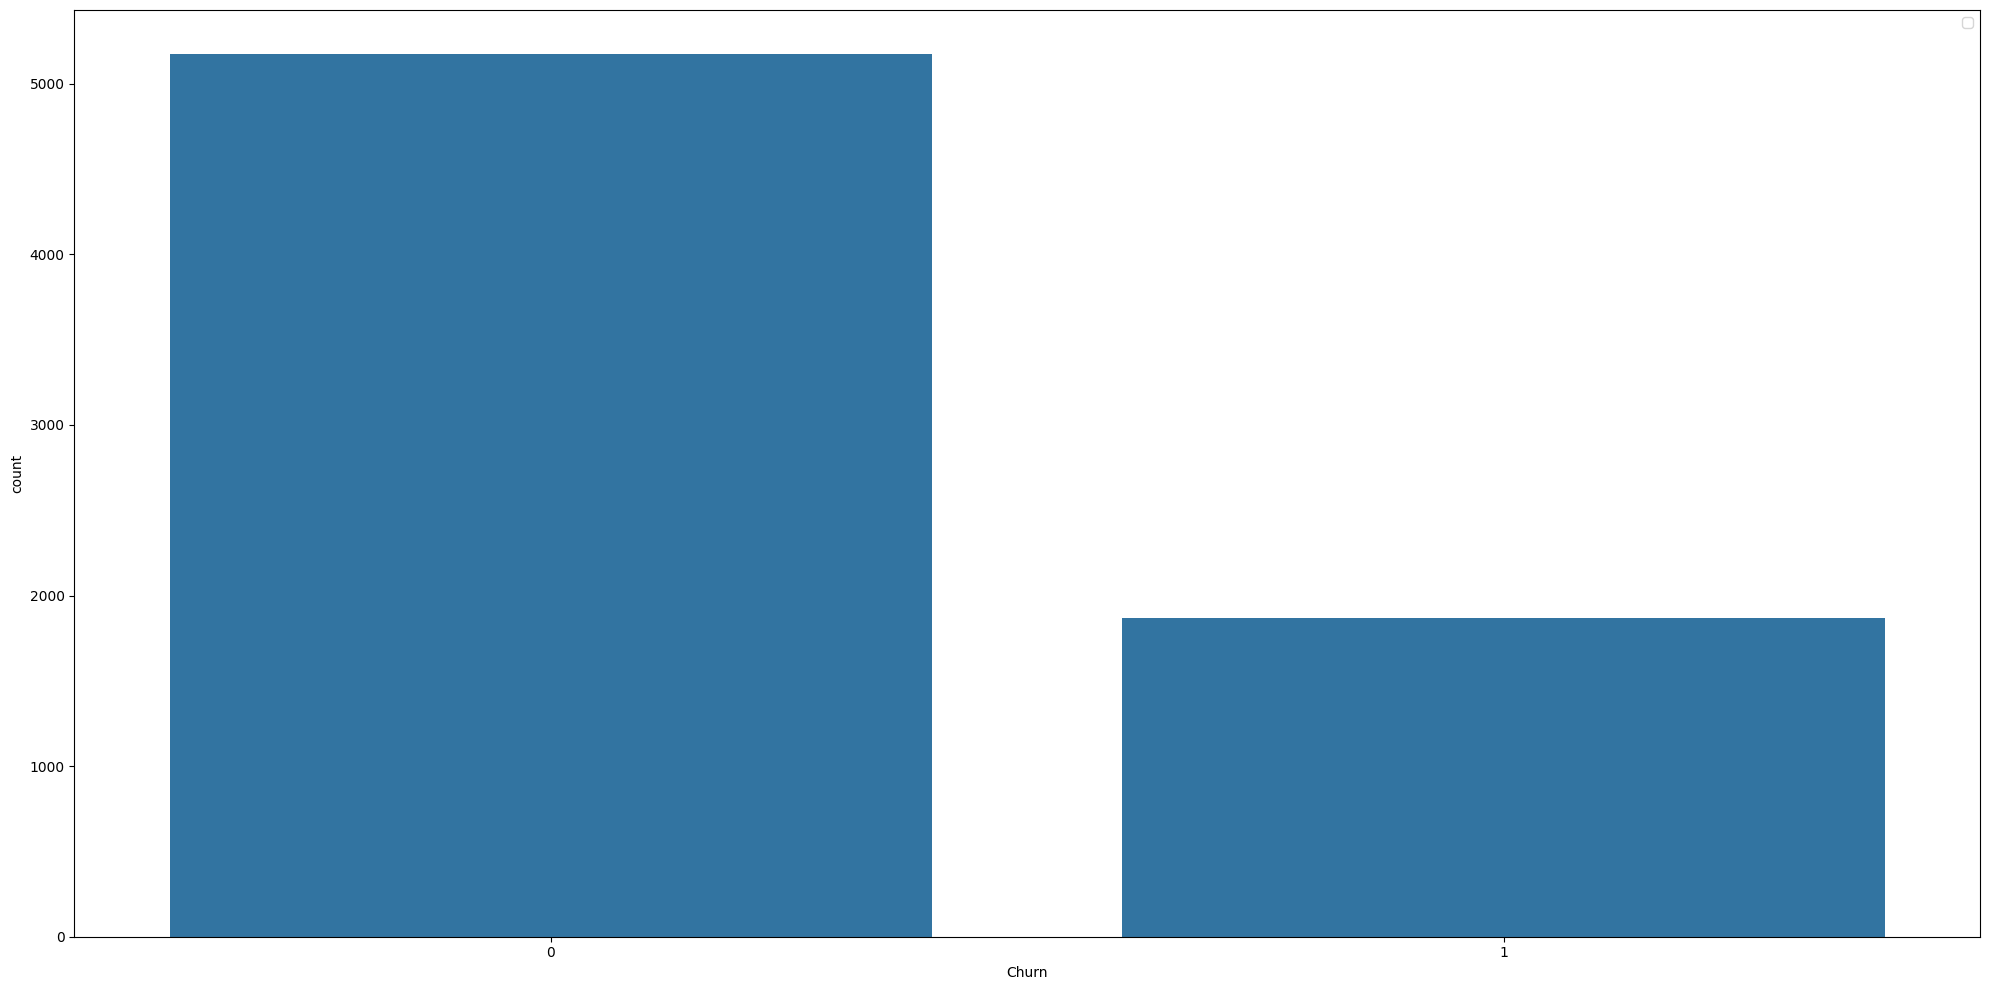

In [216]:
plt.figure(figsize = (20, 10))
sns.countplot(x = df['Churn'])
plt.legend()
plt.tight_layout()
plt.show()

In [217]:
bools_cols = df.select_dtypes(include = 'int64').columns.tolist()
bools_cols.remove('tenure')
bools_cols.remove('Churn')

In [218]:
for cols in bools_cols:
    print(df[cols].mean())
    print(df.groupby(cols)['Churn'].mean())
    print('\n')

0.495243504188556
gender
0    0.261603
1    0.269209
Name: Churn, dtype: float64


0.1621468124378816
SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64


0.4830327985233565
Partner
0    0.329580
1    0.196649
Name: Churn, dtype: float64


0.2995882436461735
Dependents
0    0.312791
1    0.154502
Name: Churn, dtype: float64


0.9031662643759761
PhoneService
0    0.249267
1    0.267096
Name: Churn, dtype: float64


0.42183728524776376
MultipleLines
0    0.250246
1    0.286099
Name: Churn, dtype: float64


0.2866676132329973
OnlineSecurity
0    0.313296
1    0.146112
Name: Churn, dtype: float64


0.3448814425670879
OnlineBackup
0    0.291721
1    0.215315
Name: Churn, dtype: float64


0.3438875479199205
DeviceProtection
0    0.286518
1    0.225021
Name: Churn, dtype: float64


0.2902172369728809
TechSupport
0    0.311862
1    0.151663
Name: Churn, dtype: float64


0.38435325855459324
StreamingTV
0    0.243312
1    0.300702
Name: Churn, dtype: float64


0.38790288229447

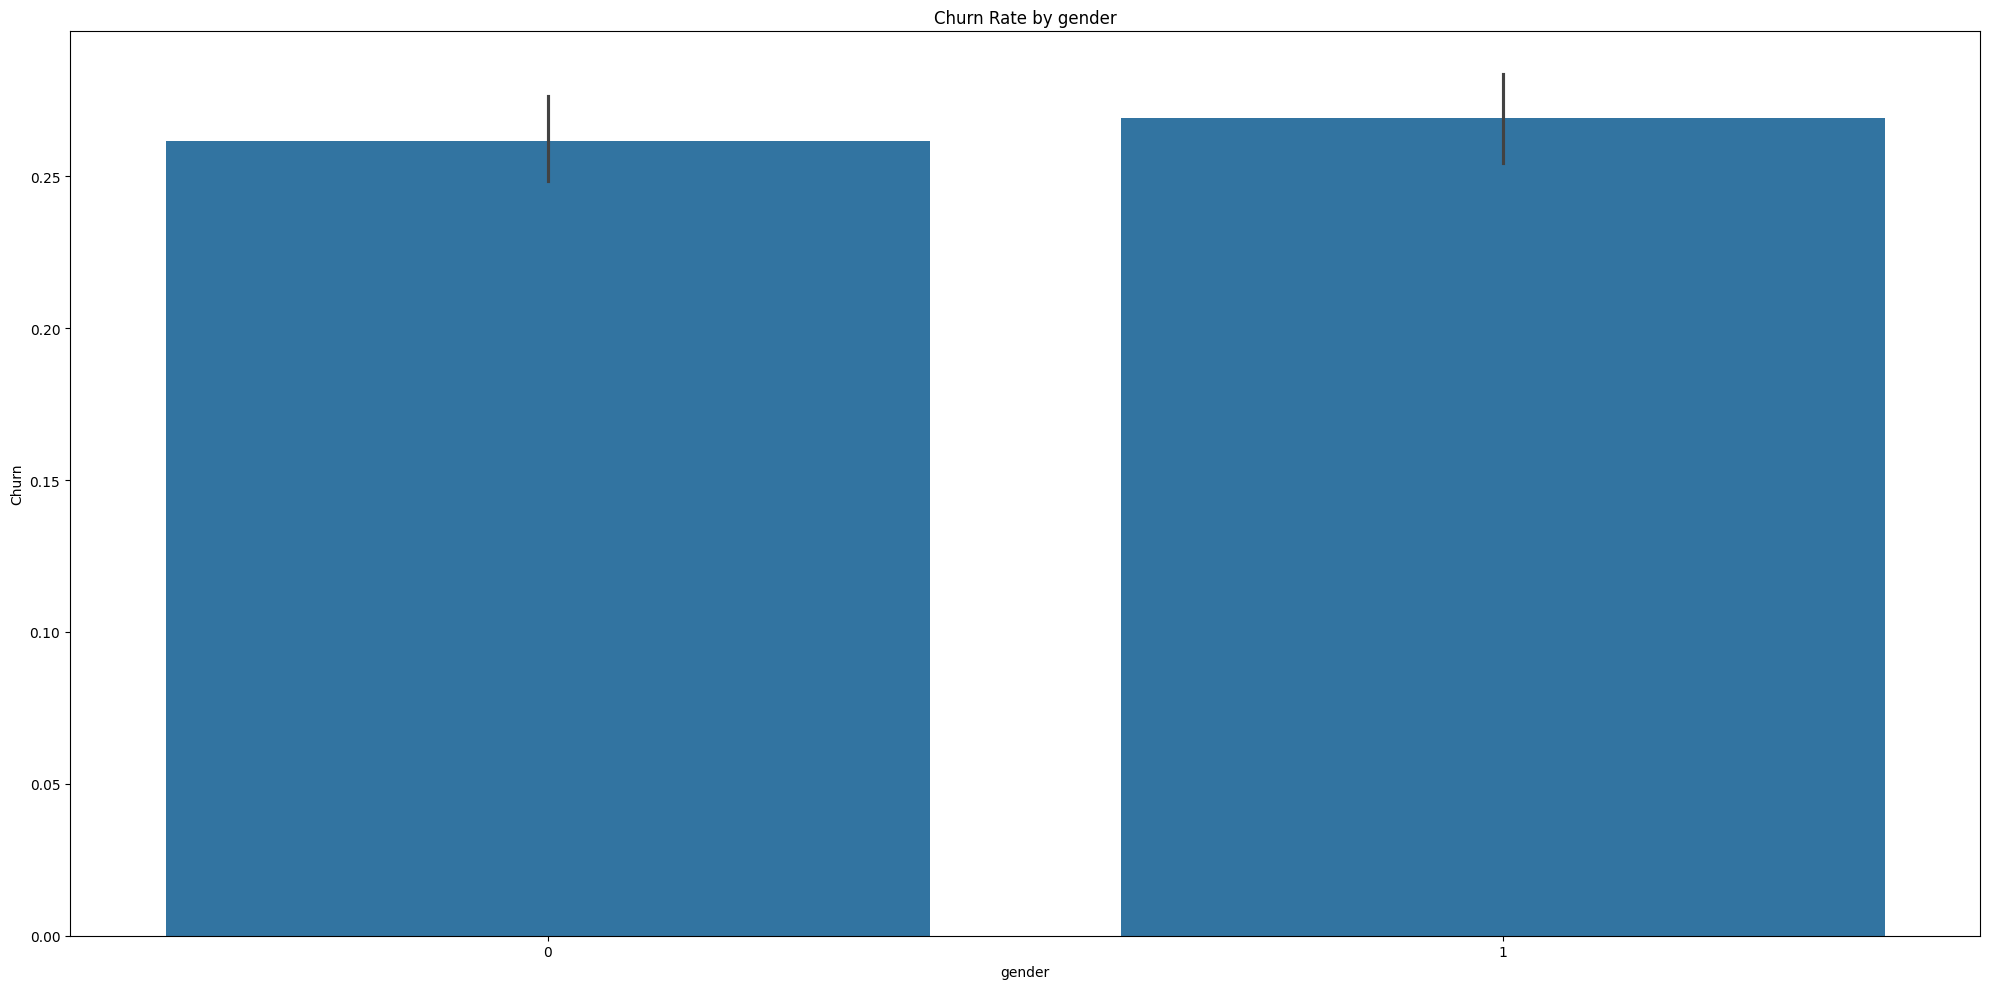

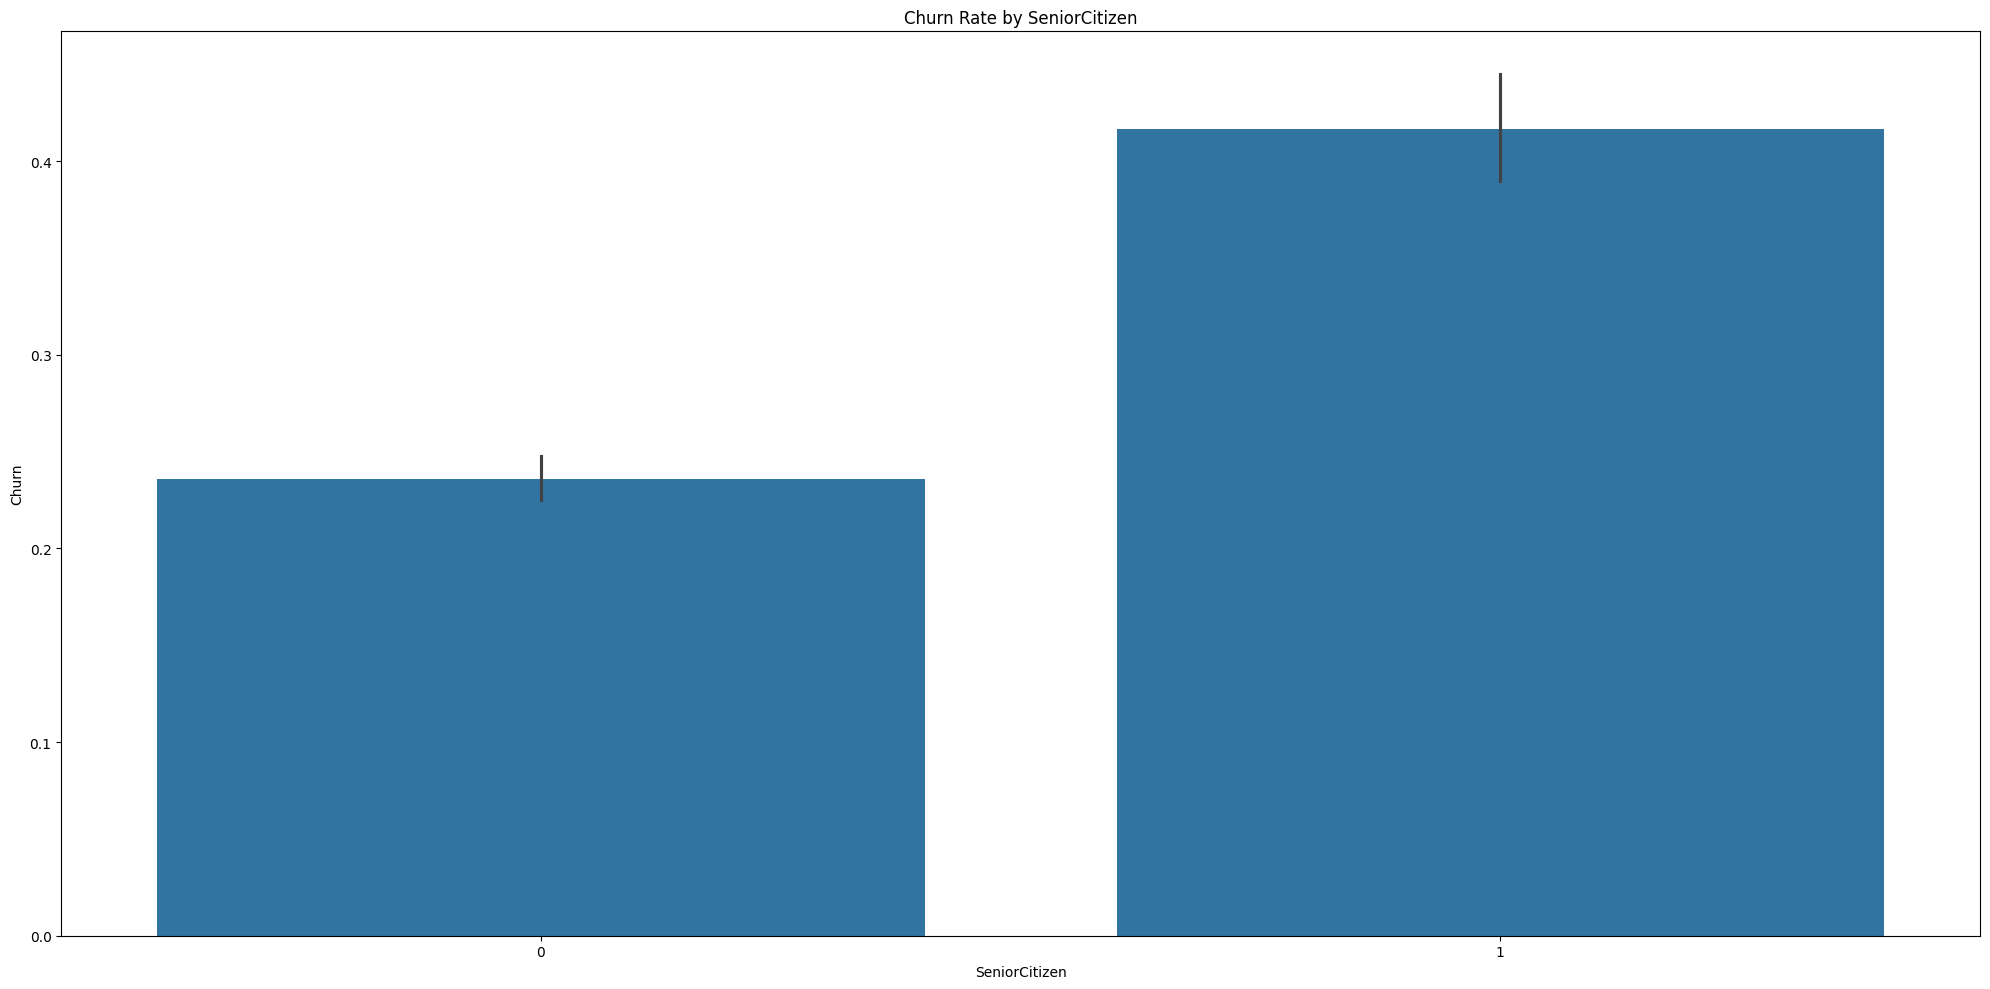

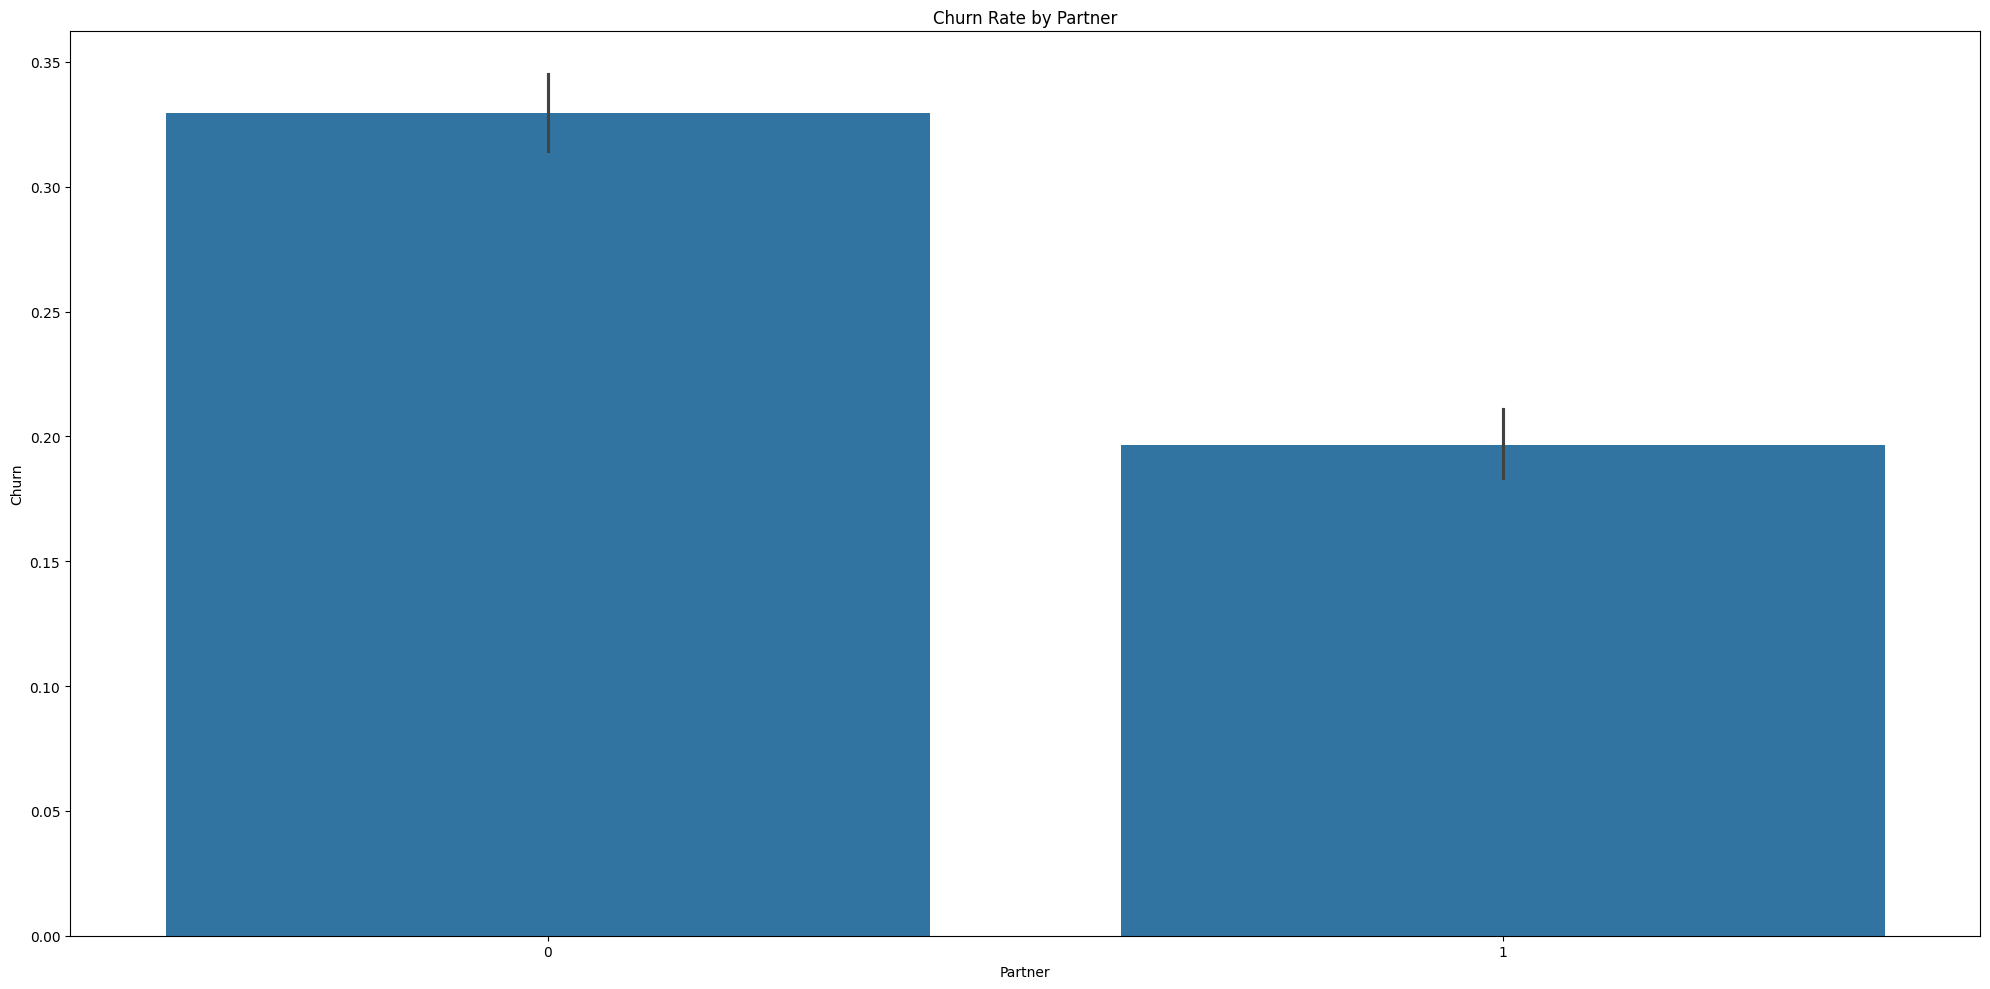

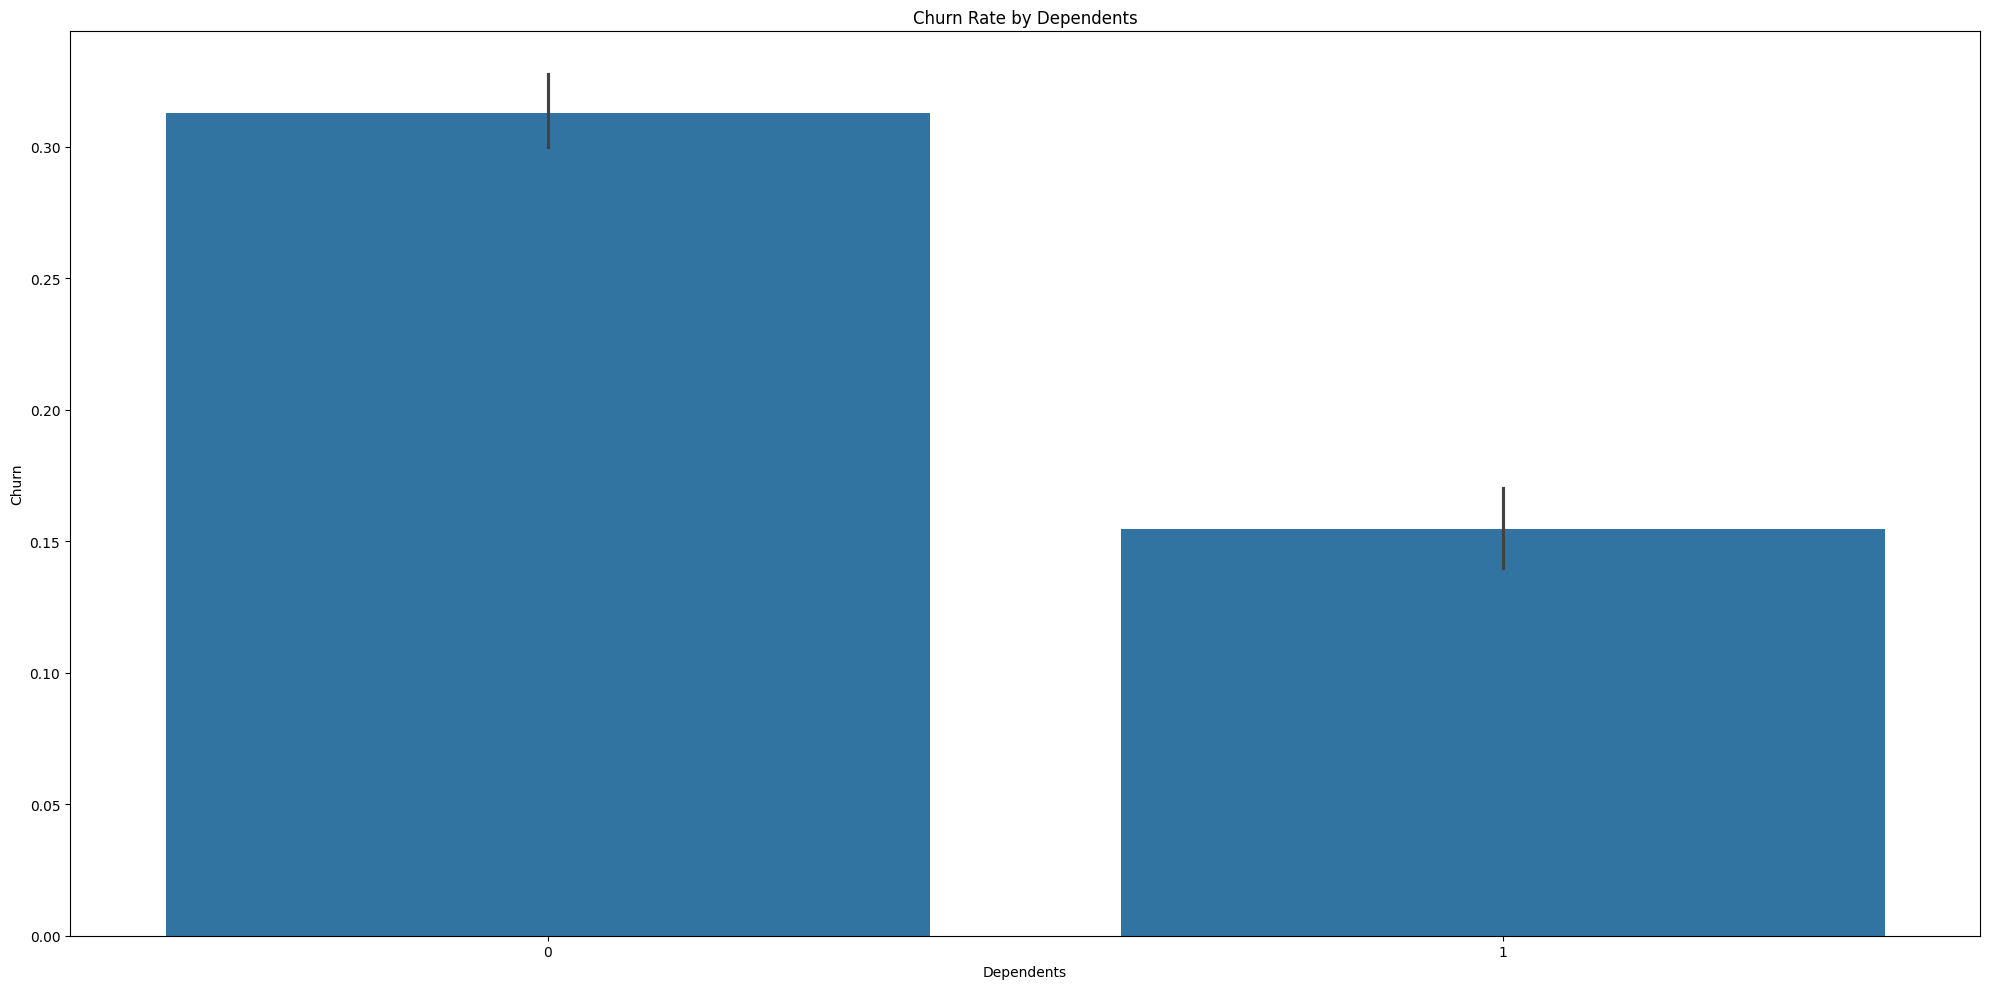

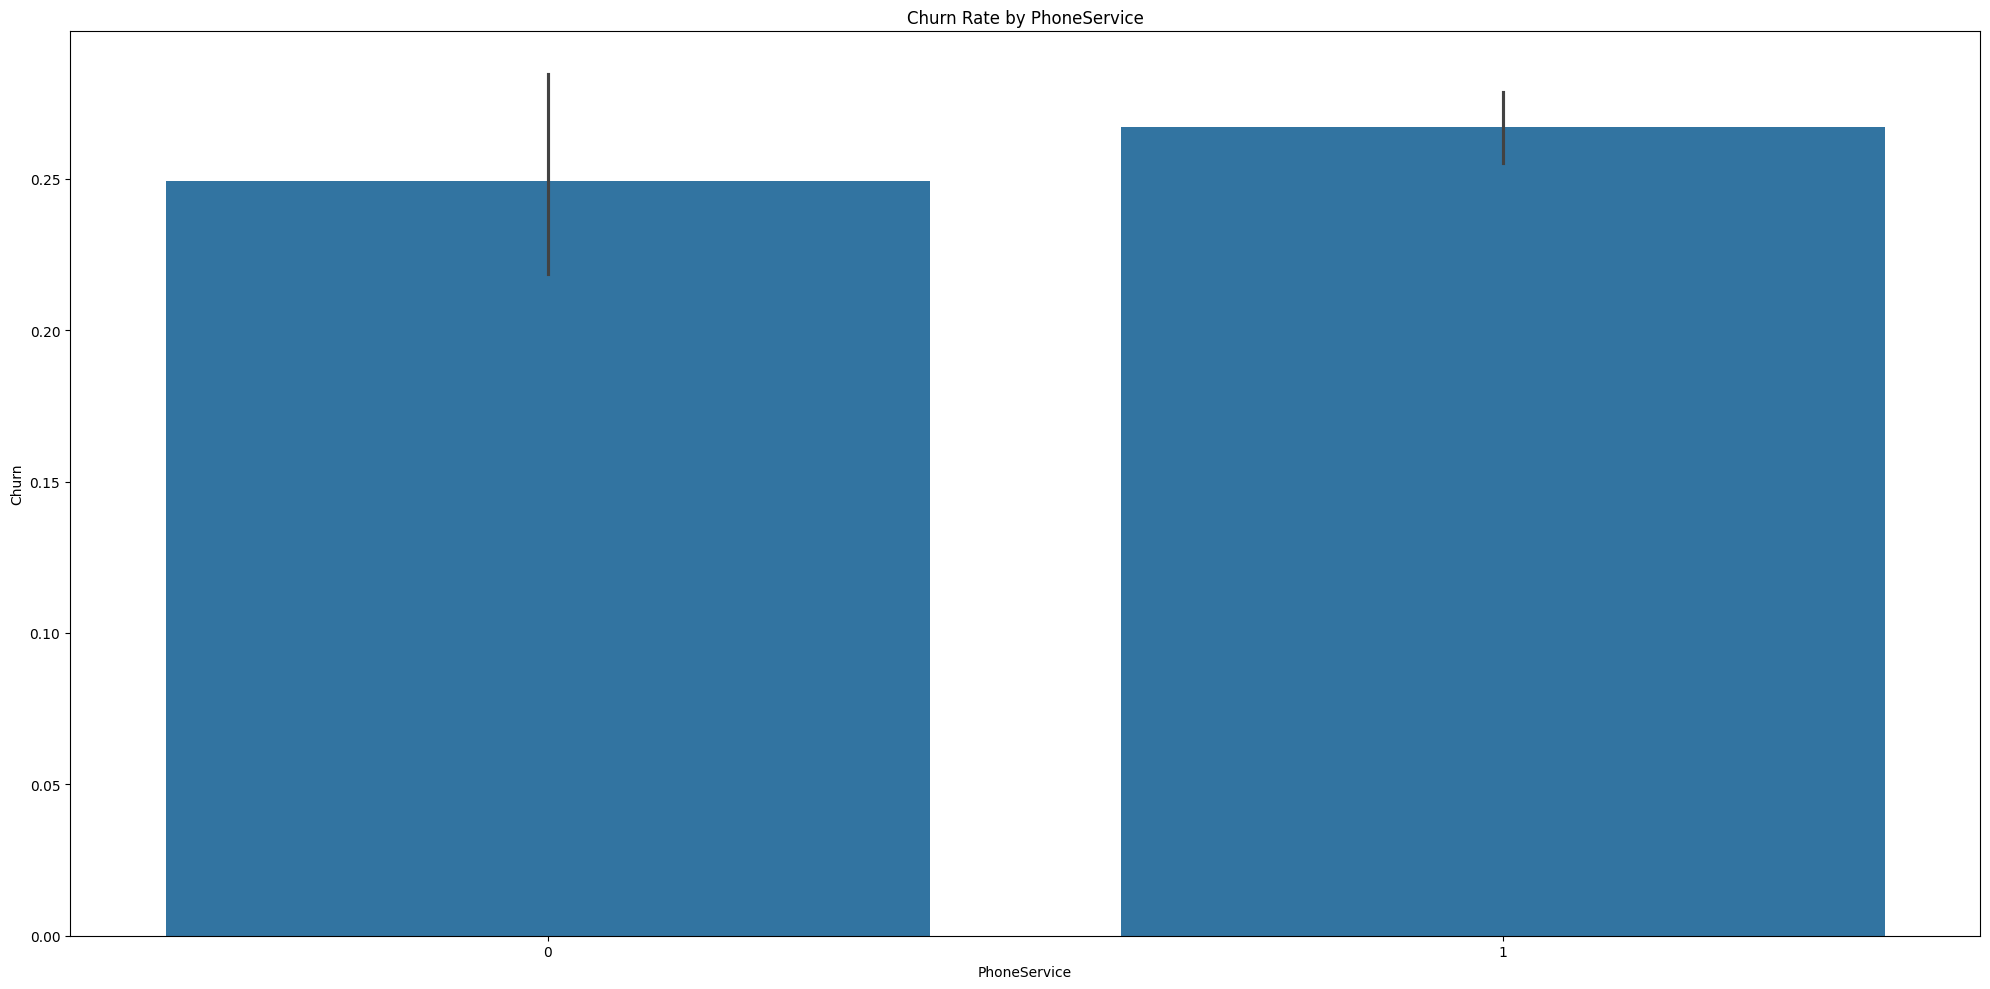

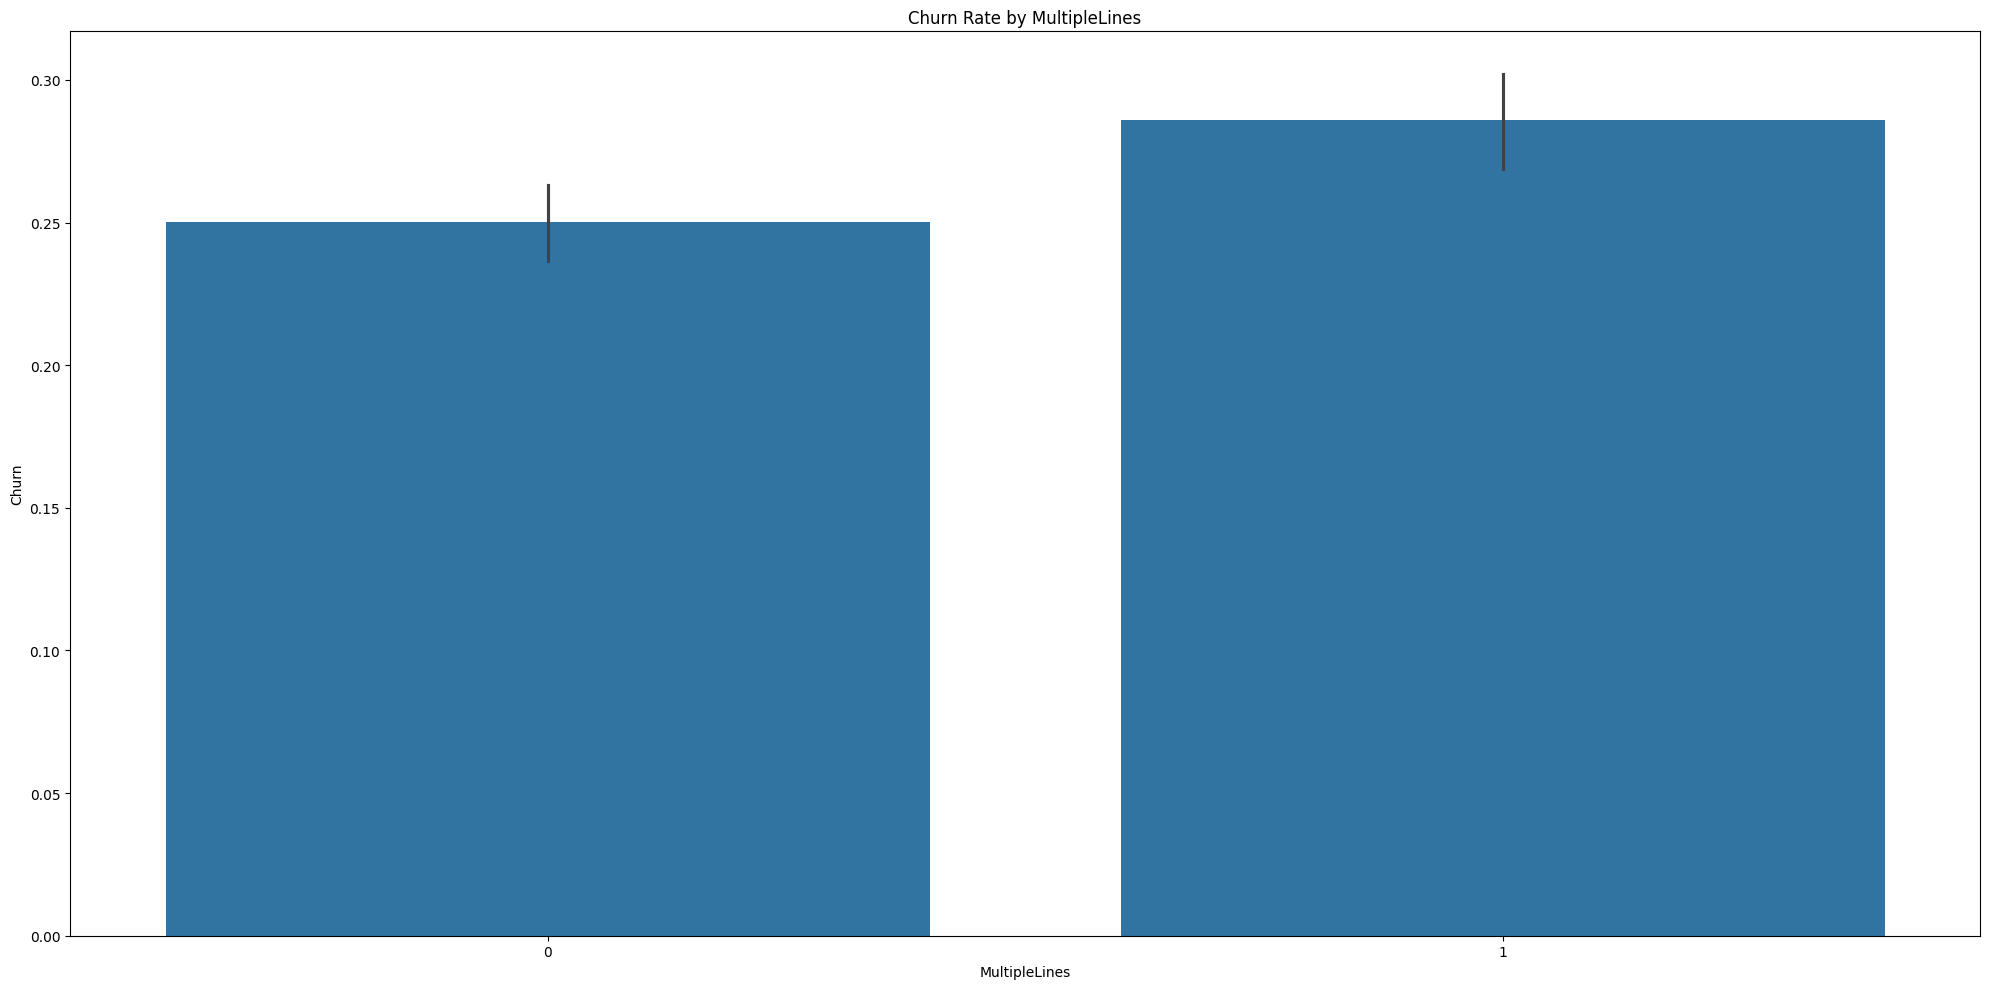

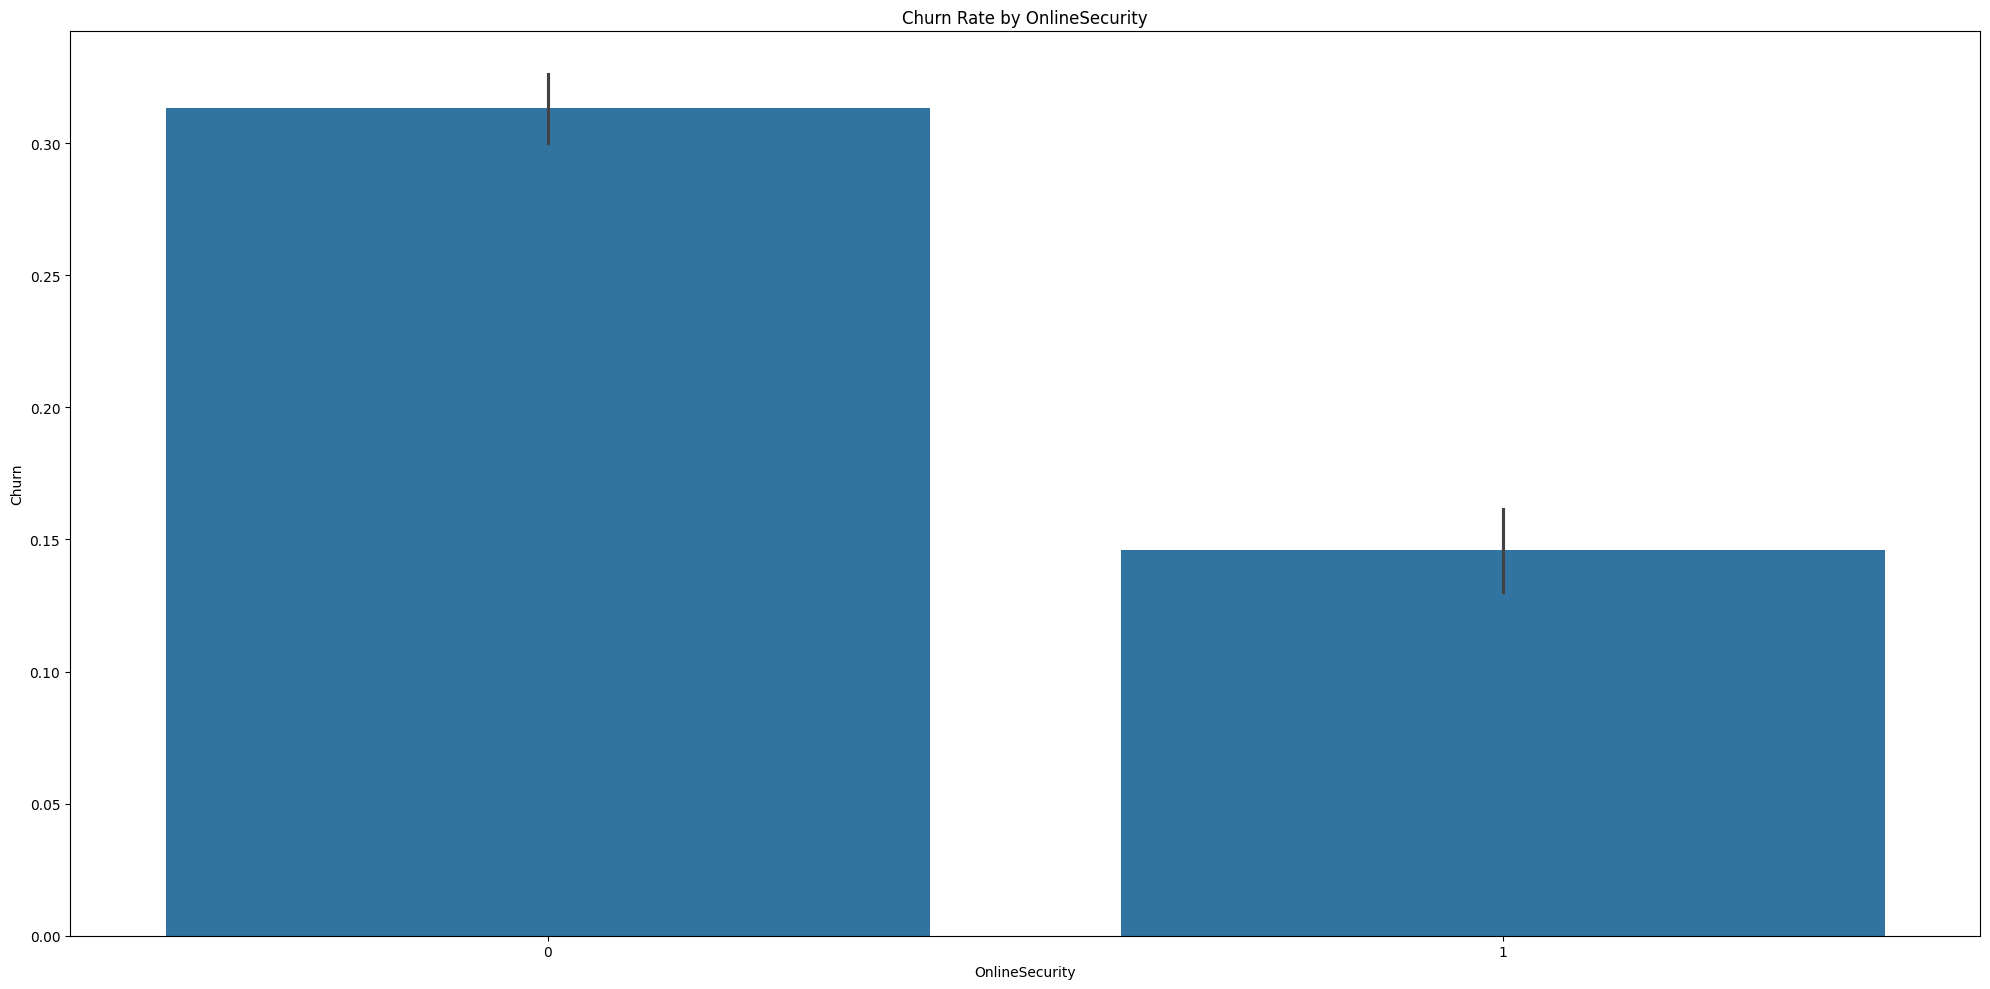

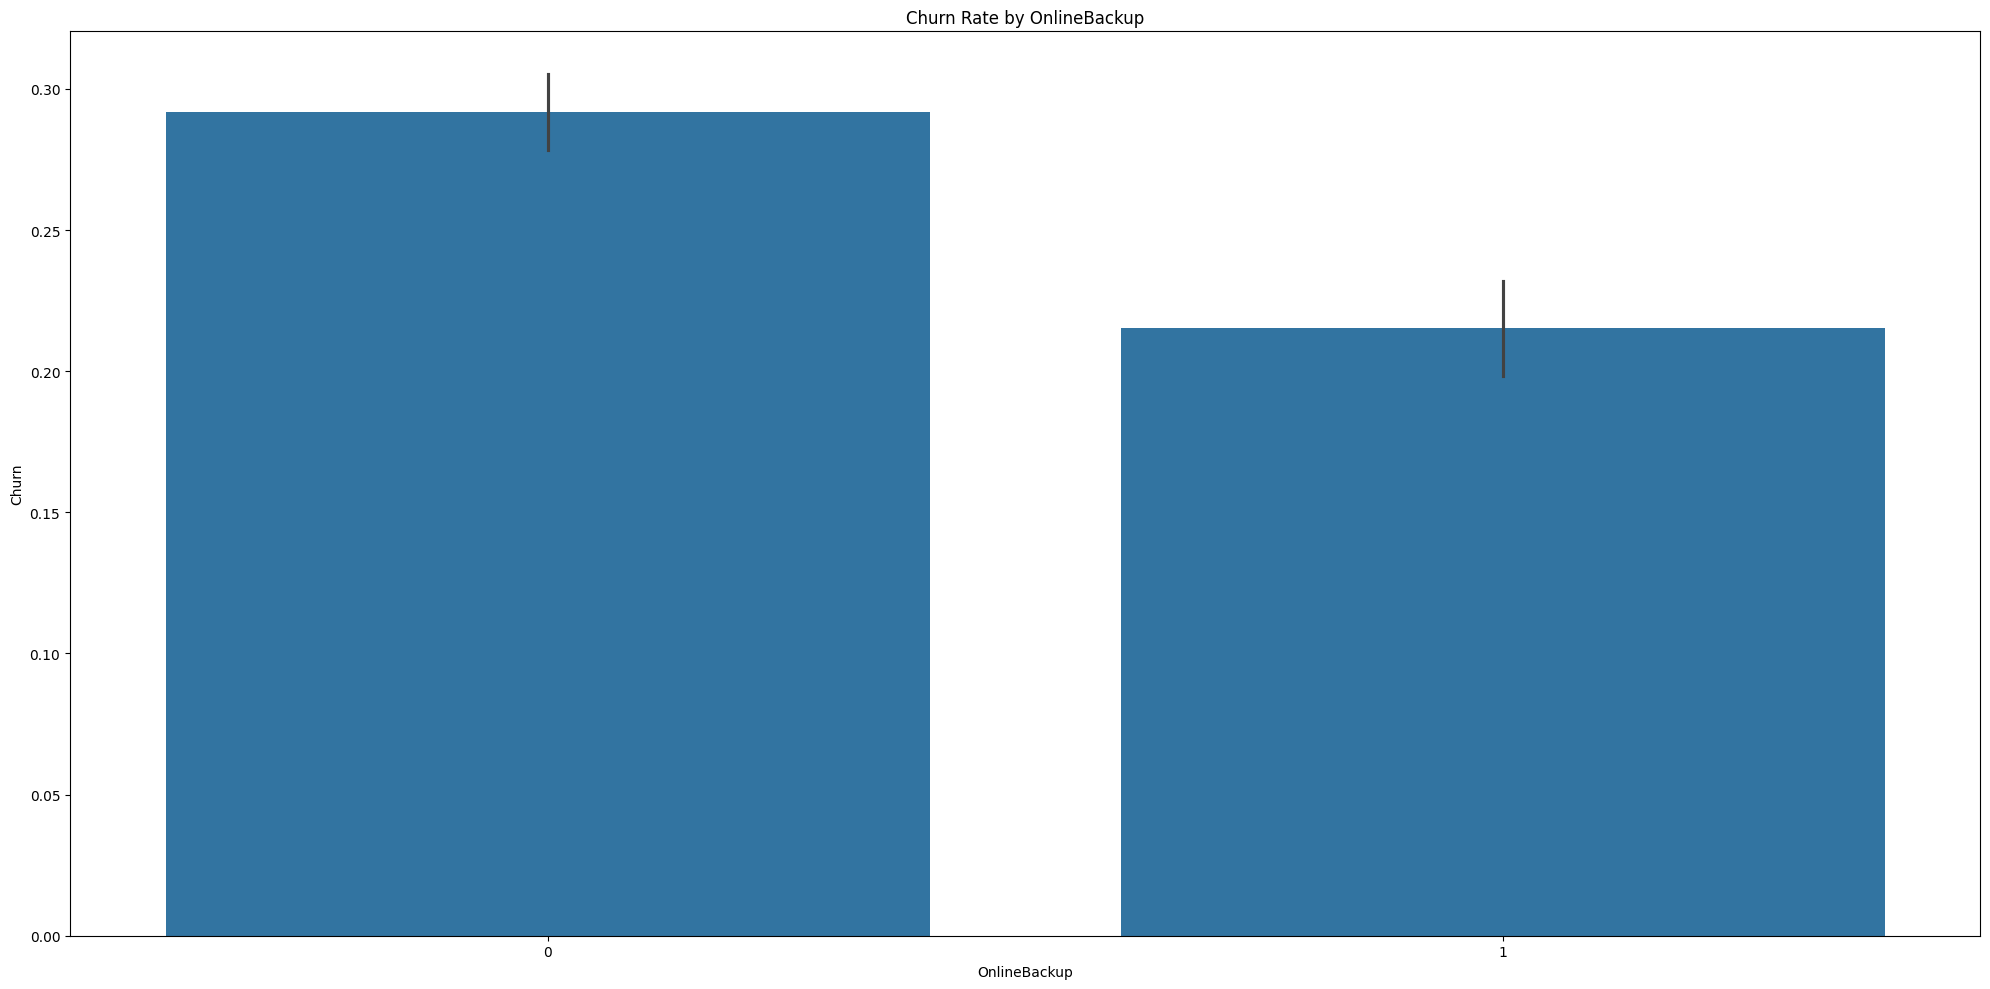

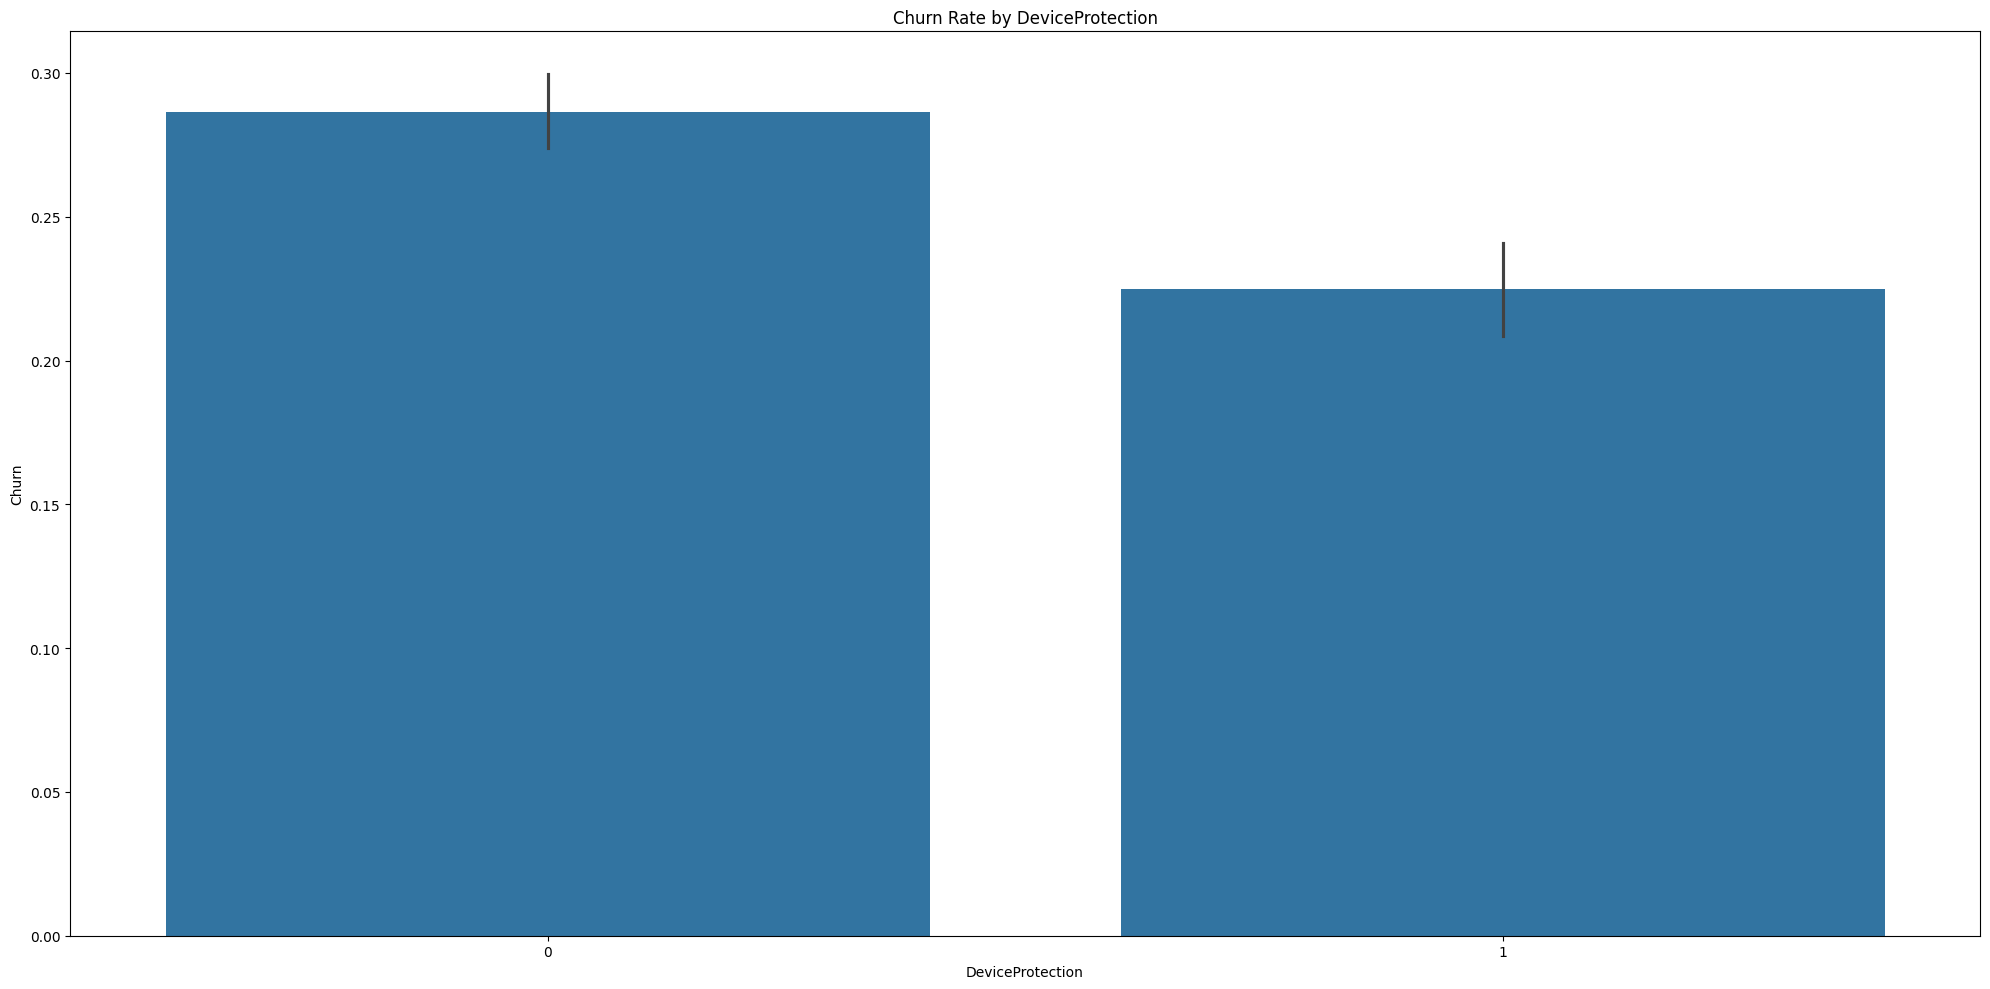

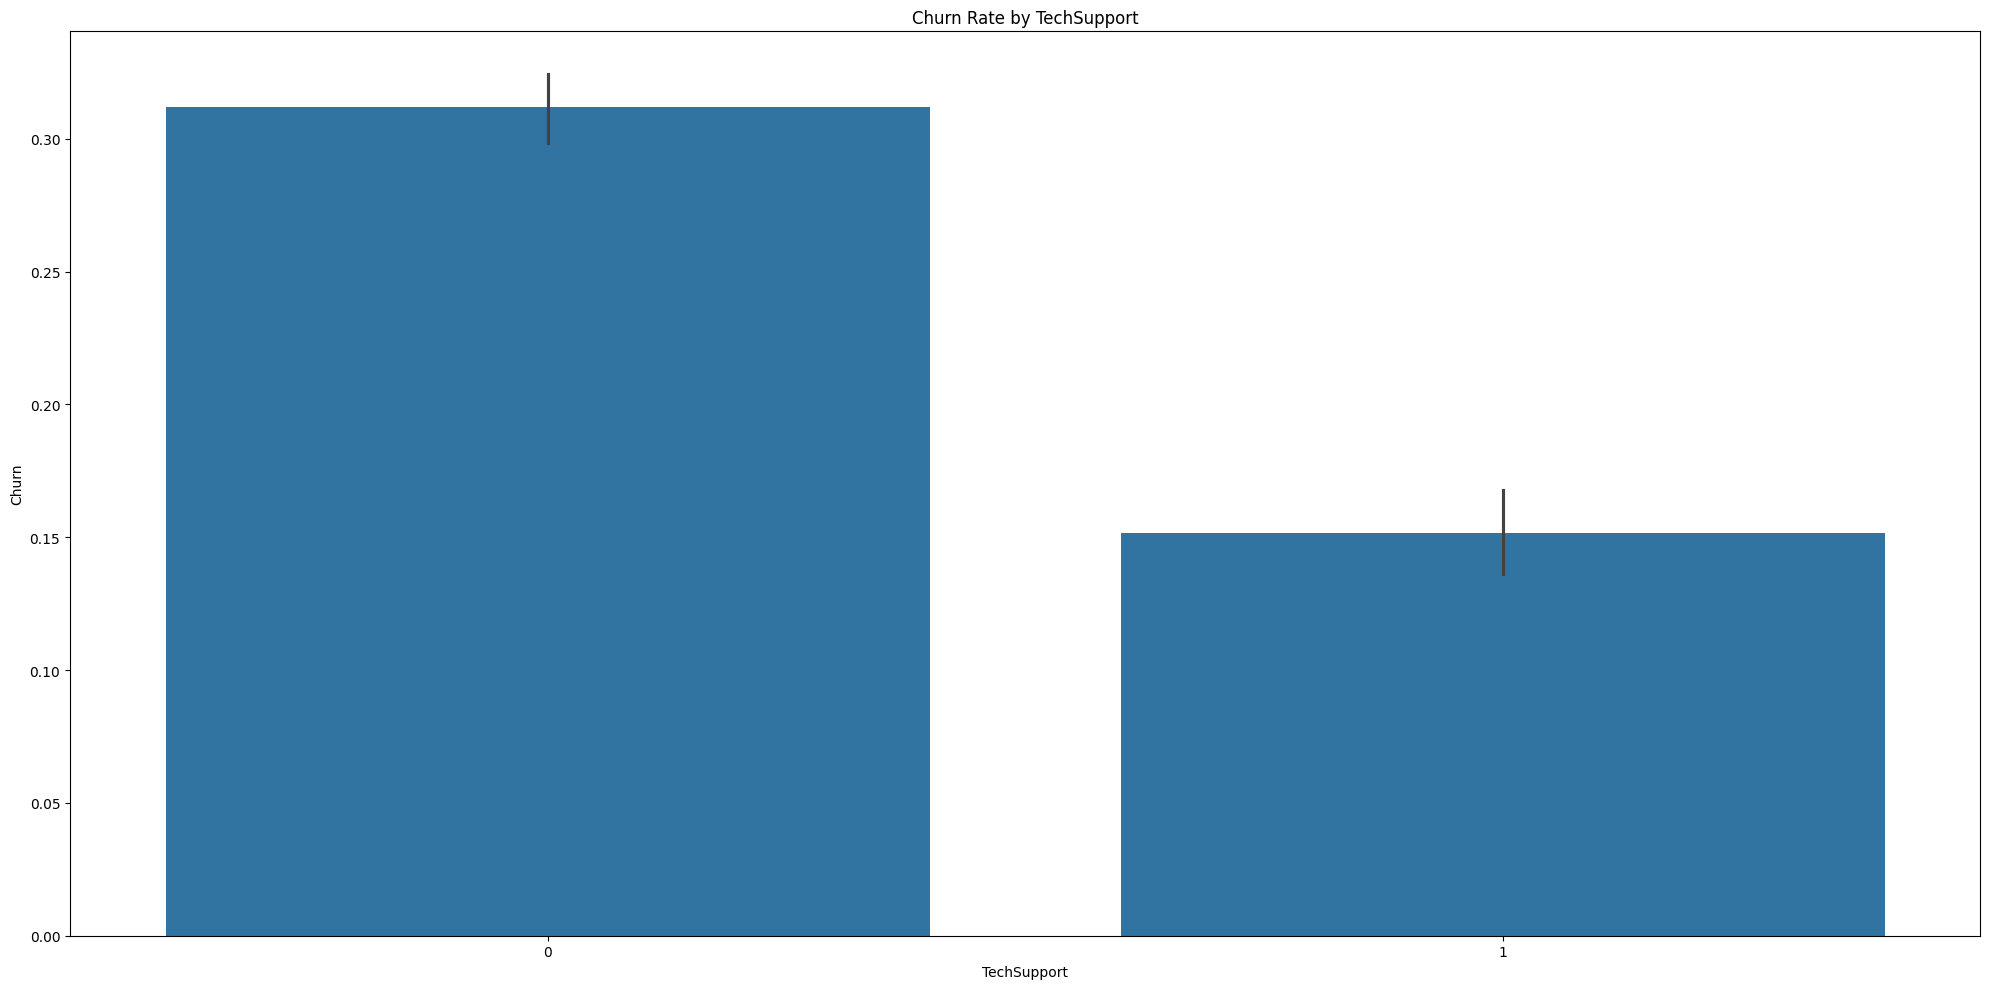

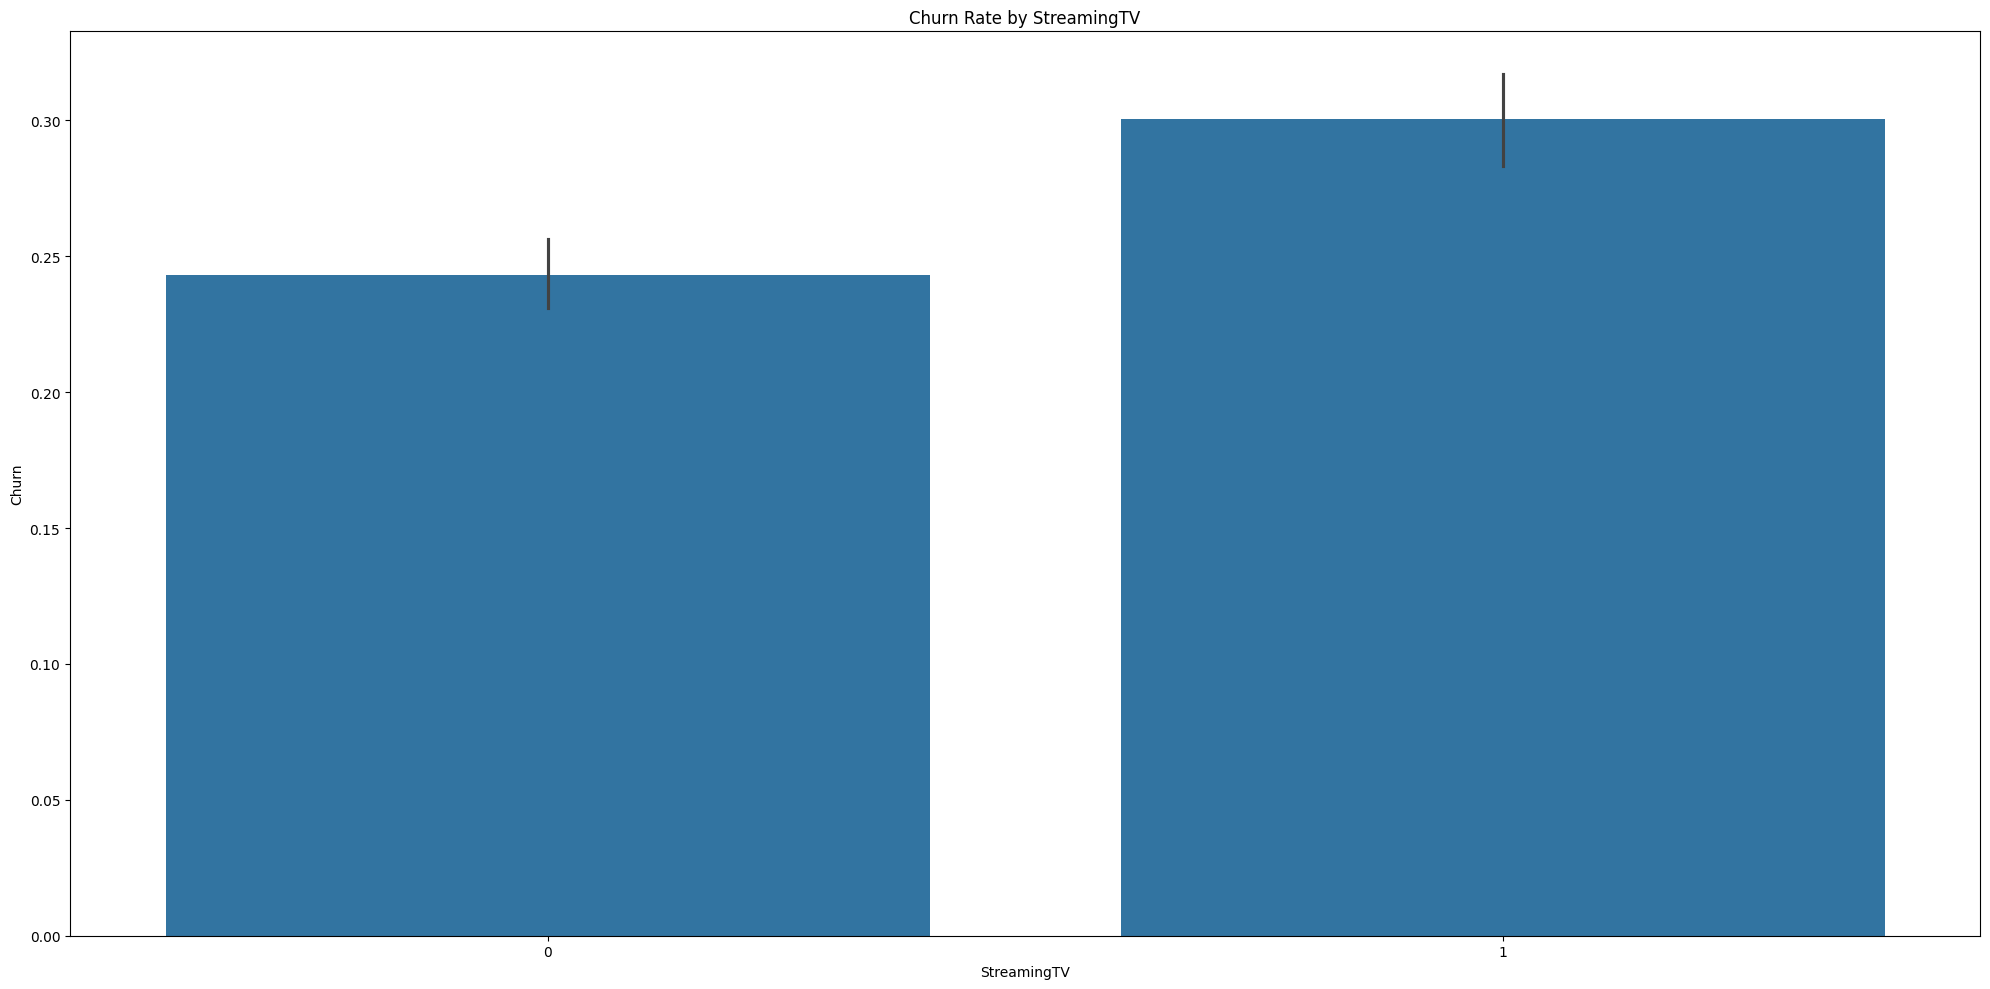

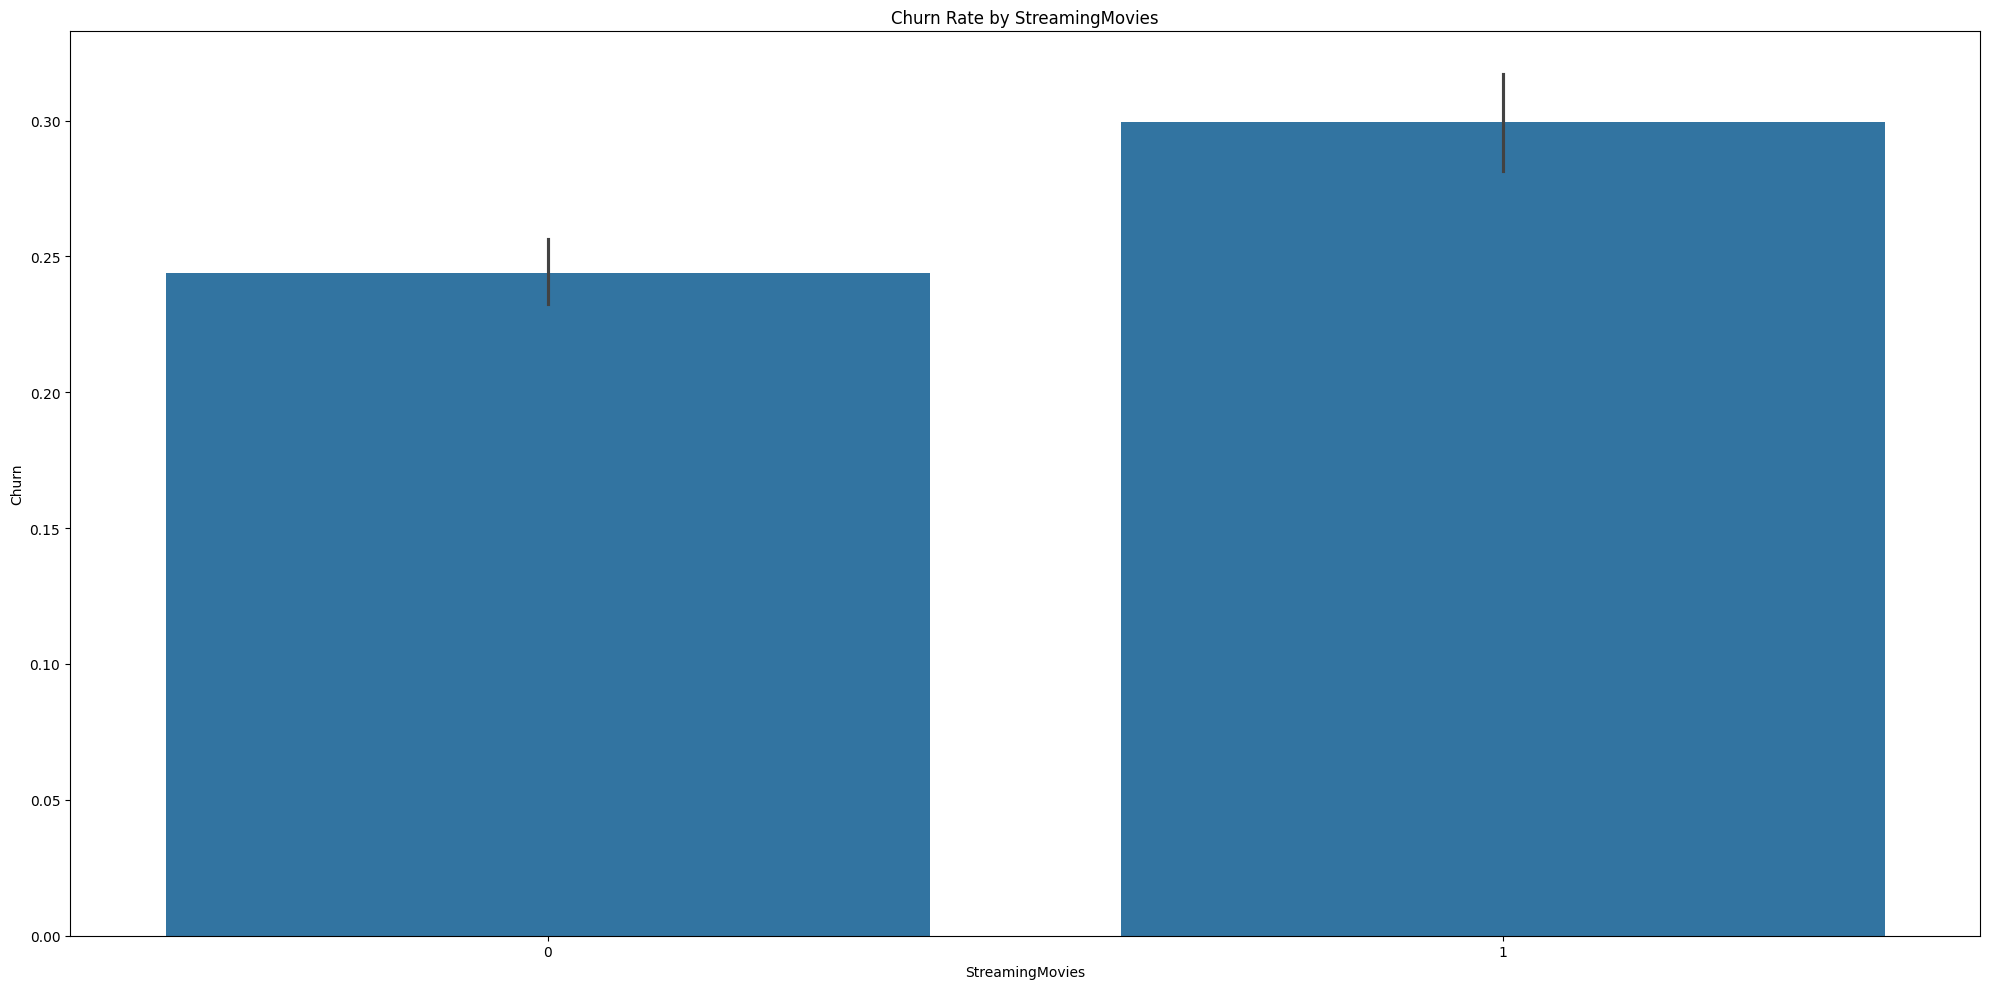

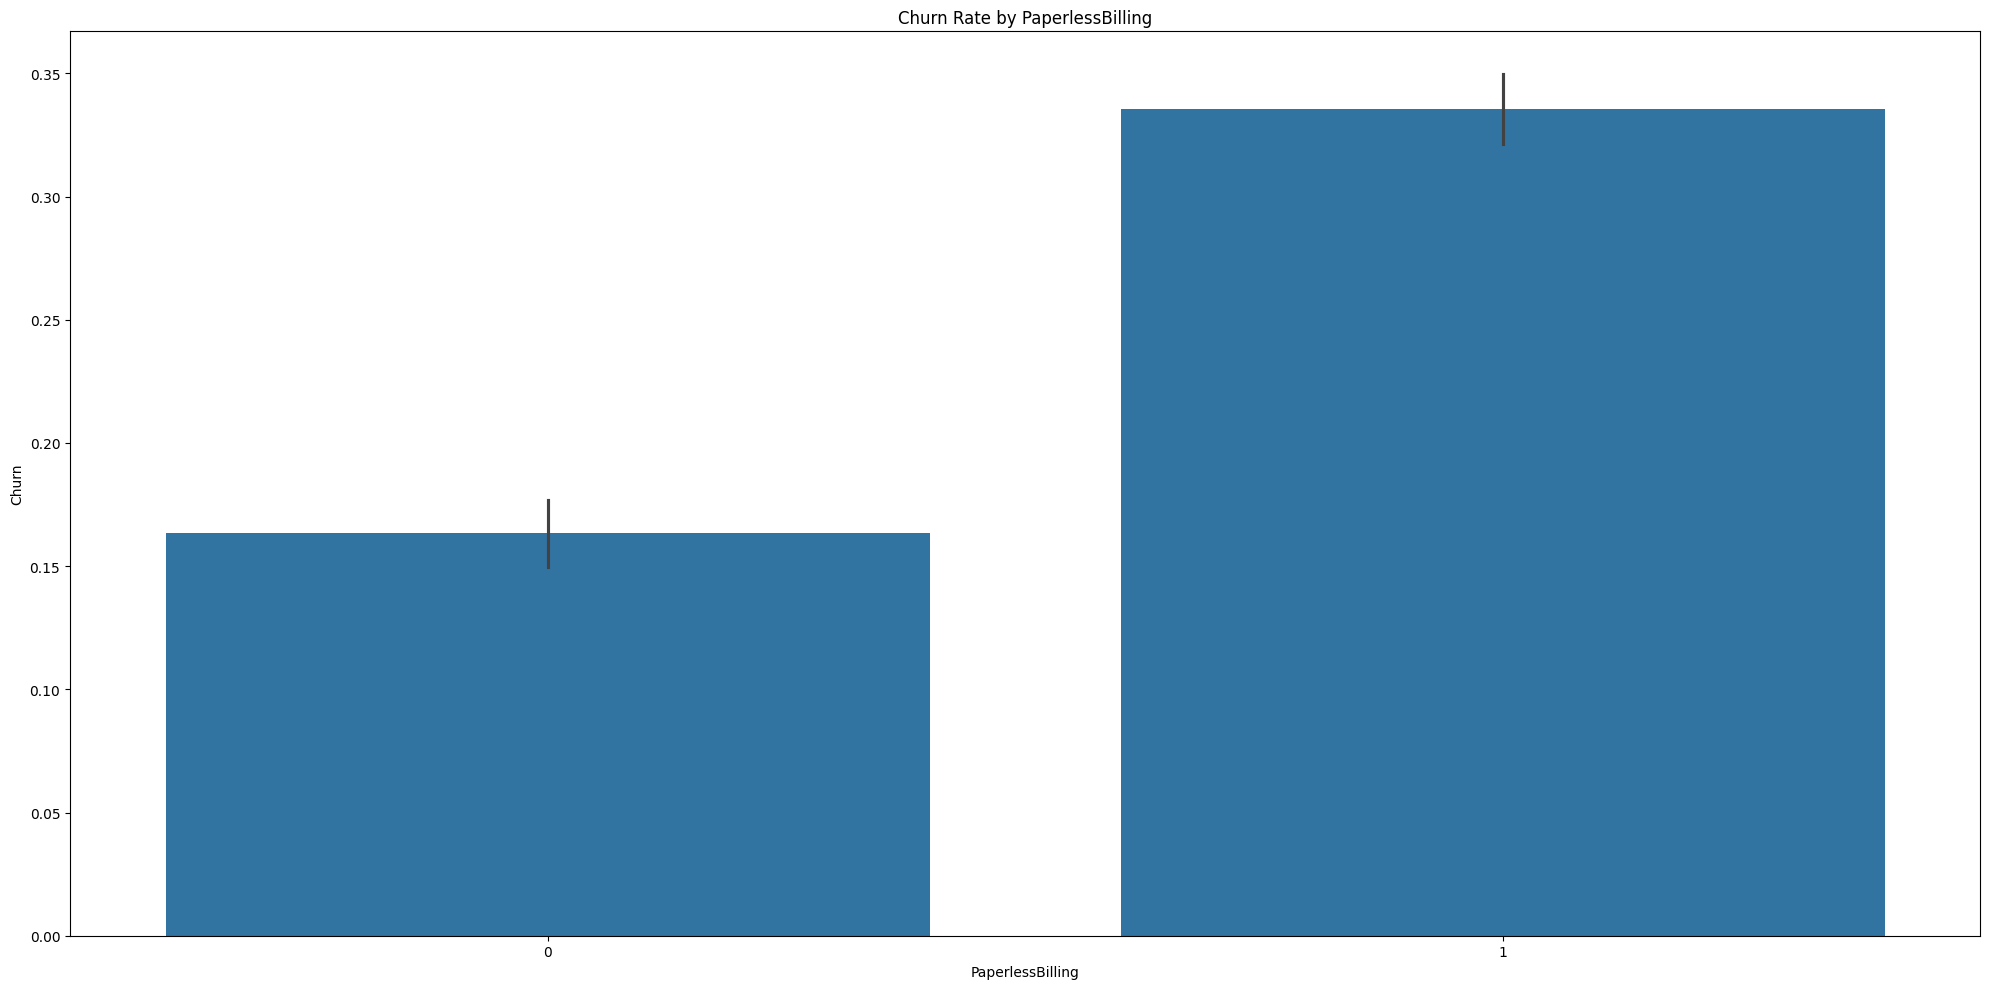

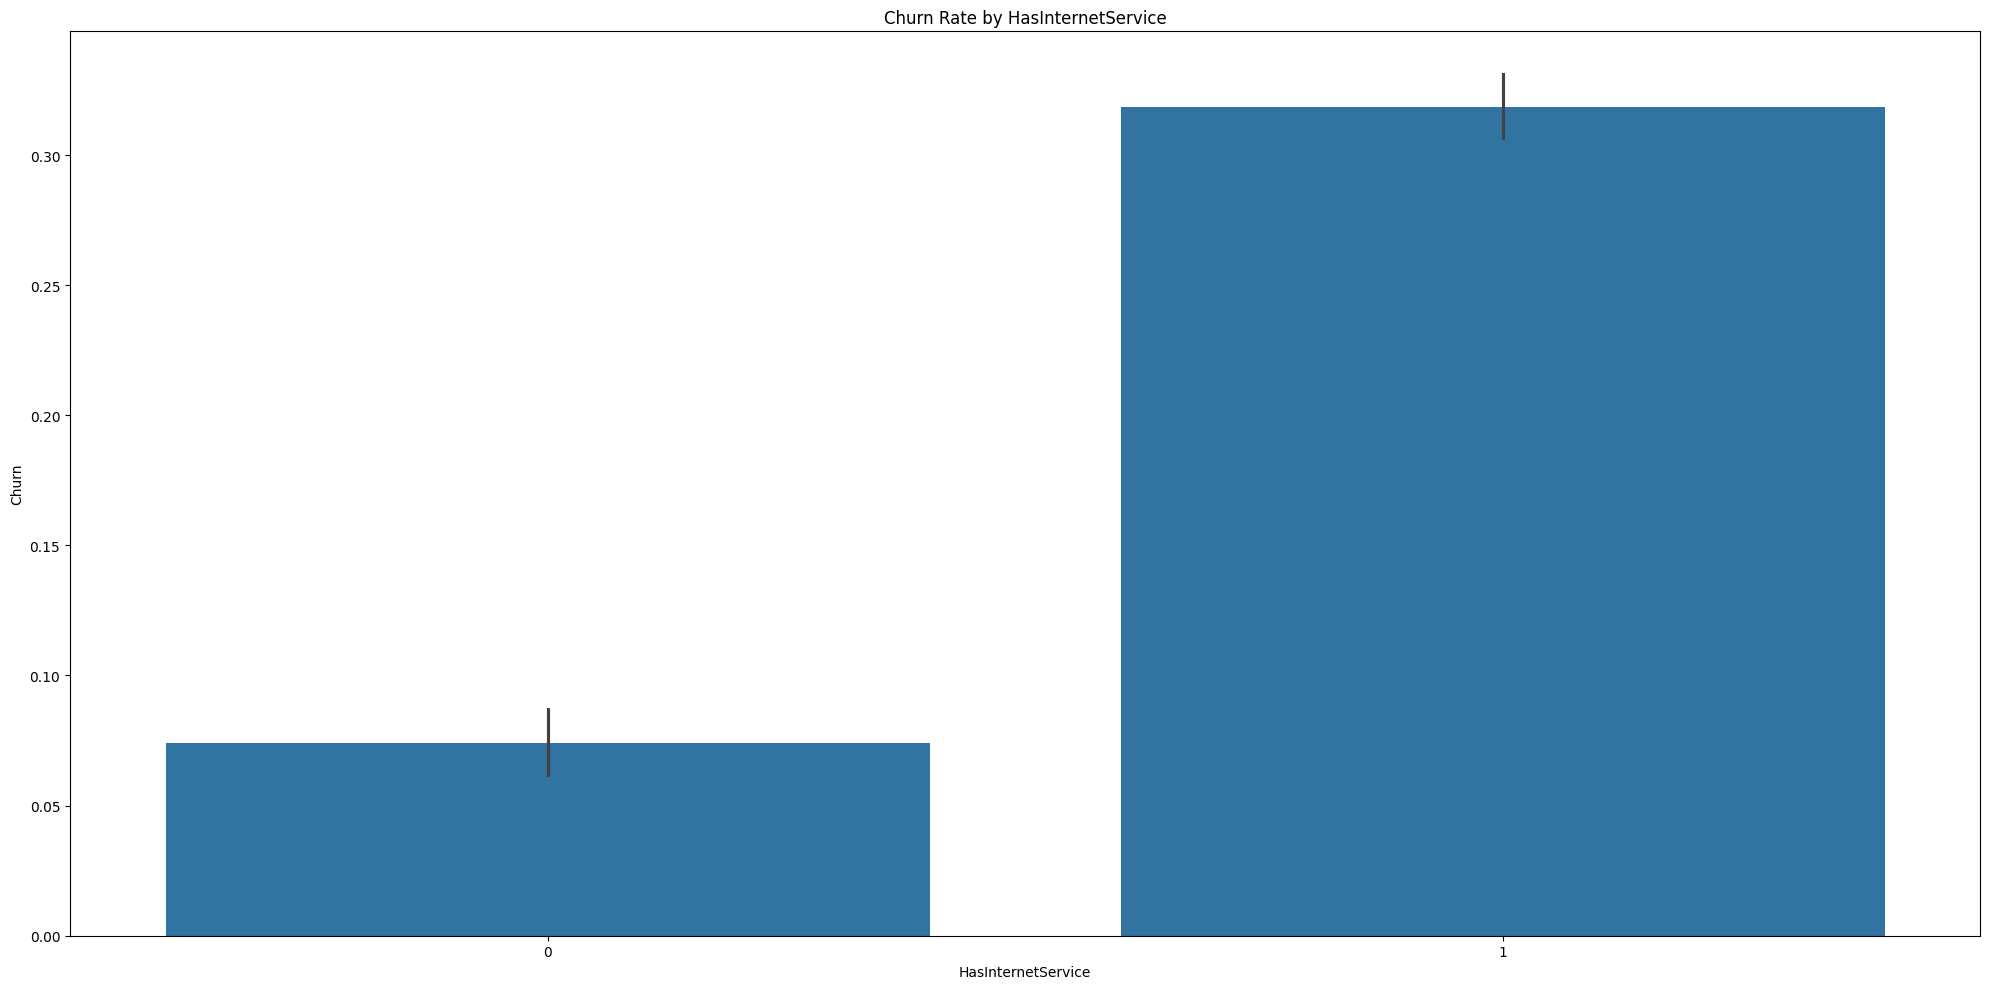

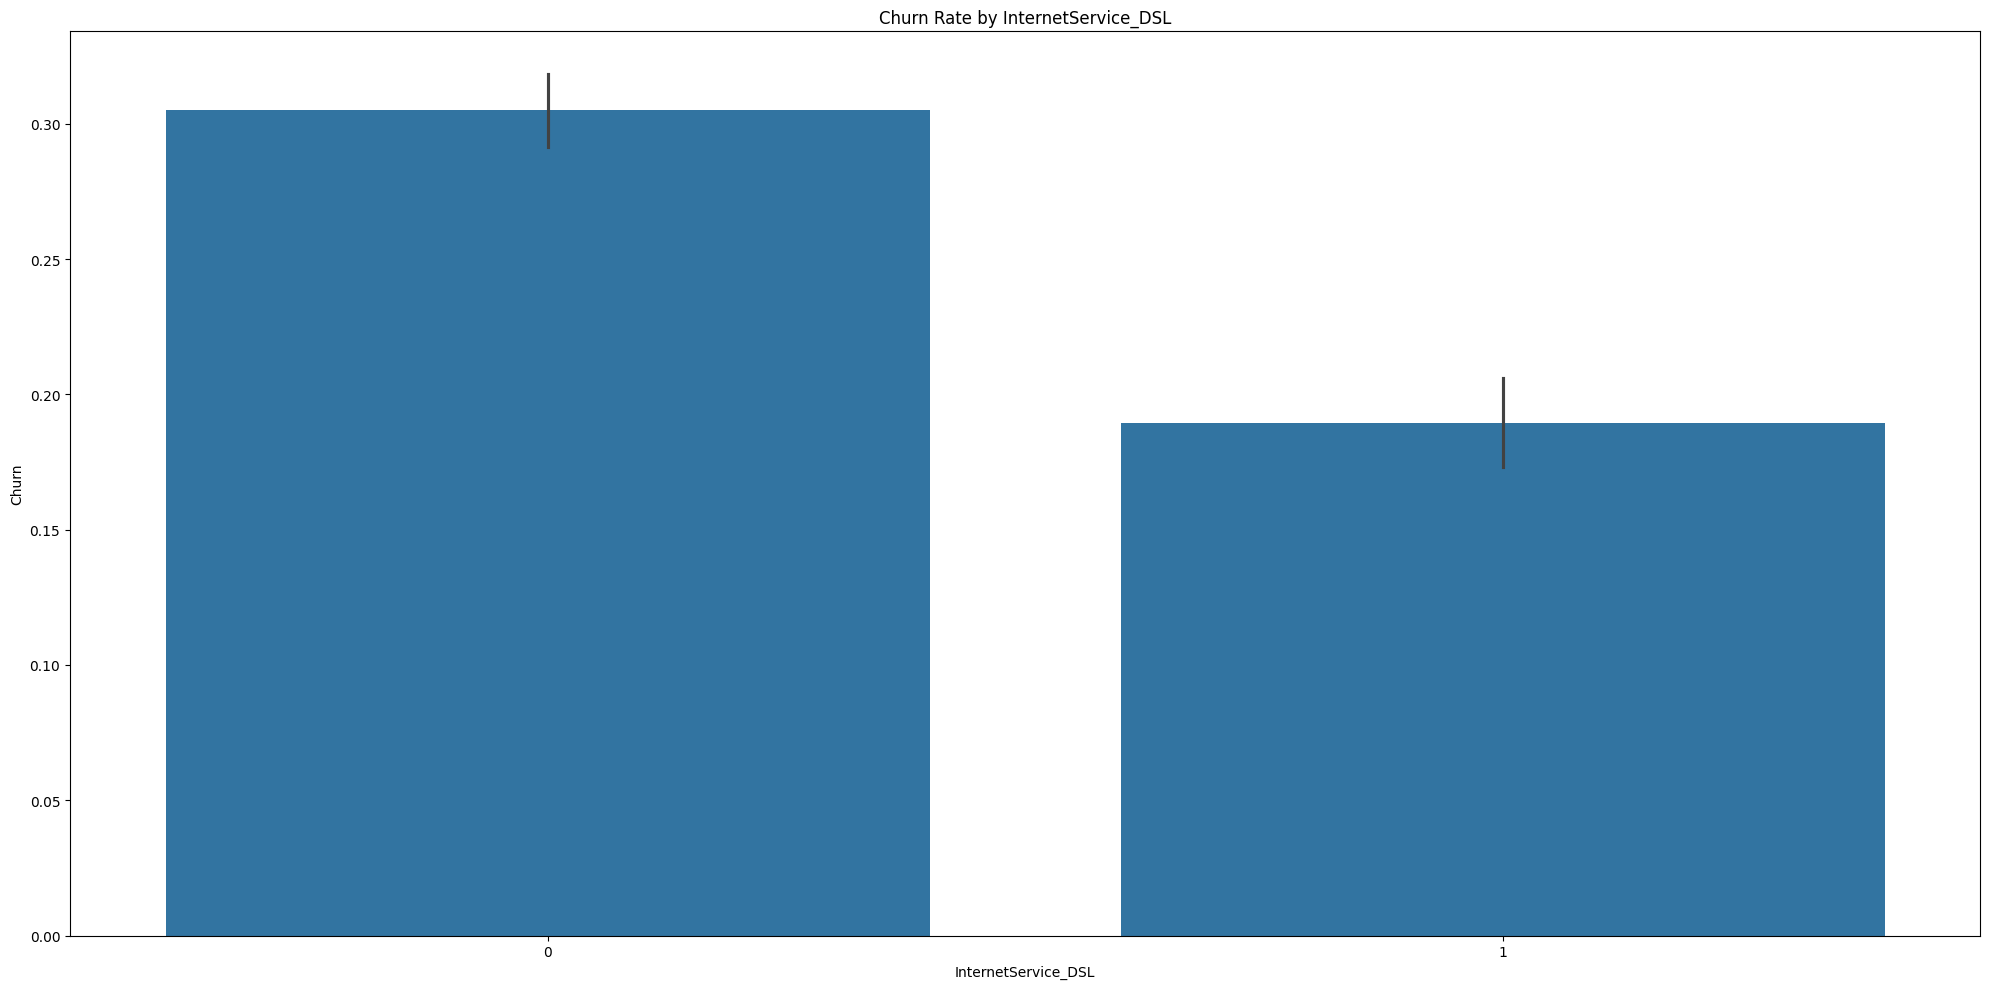

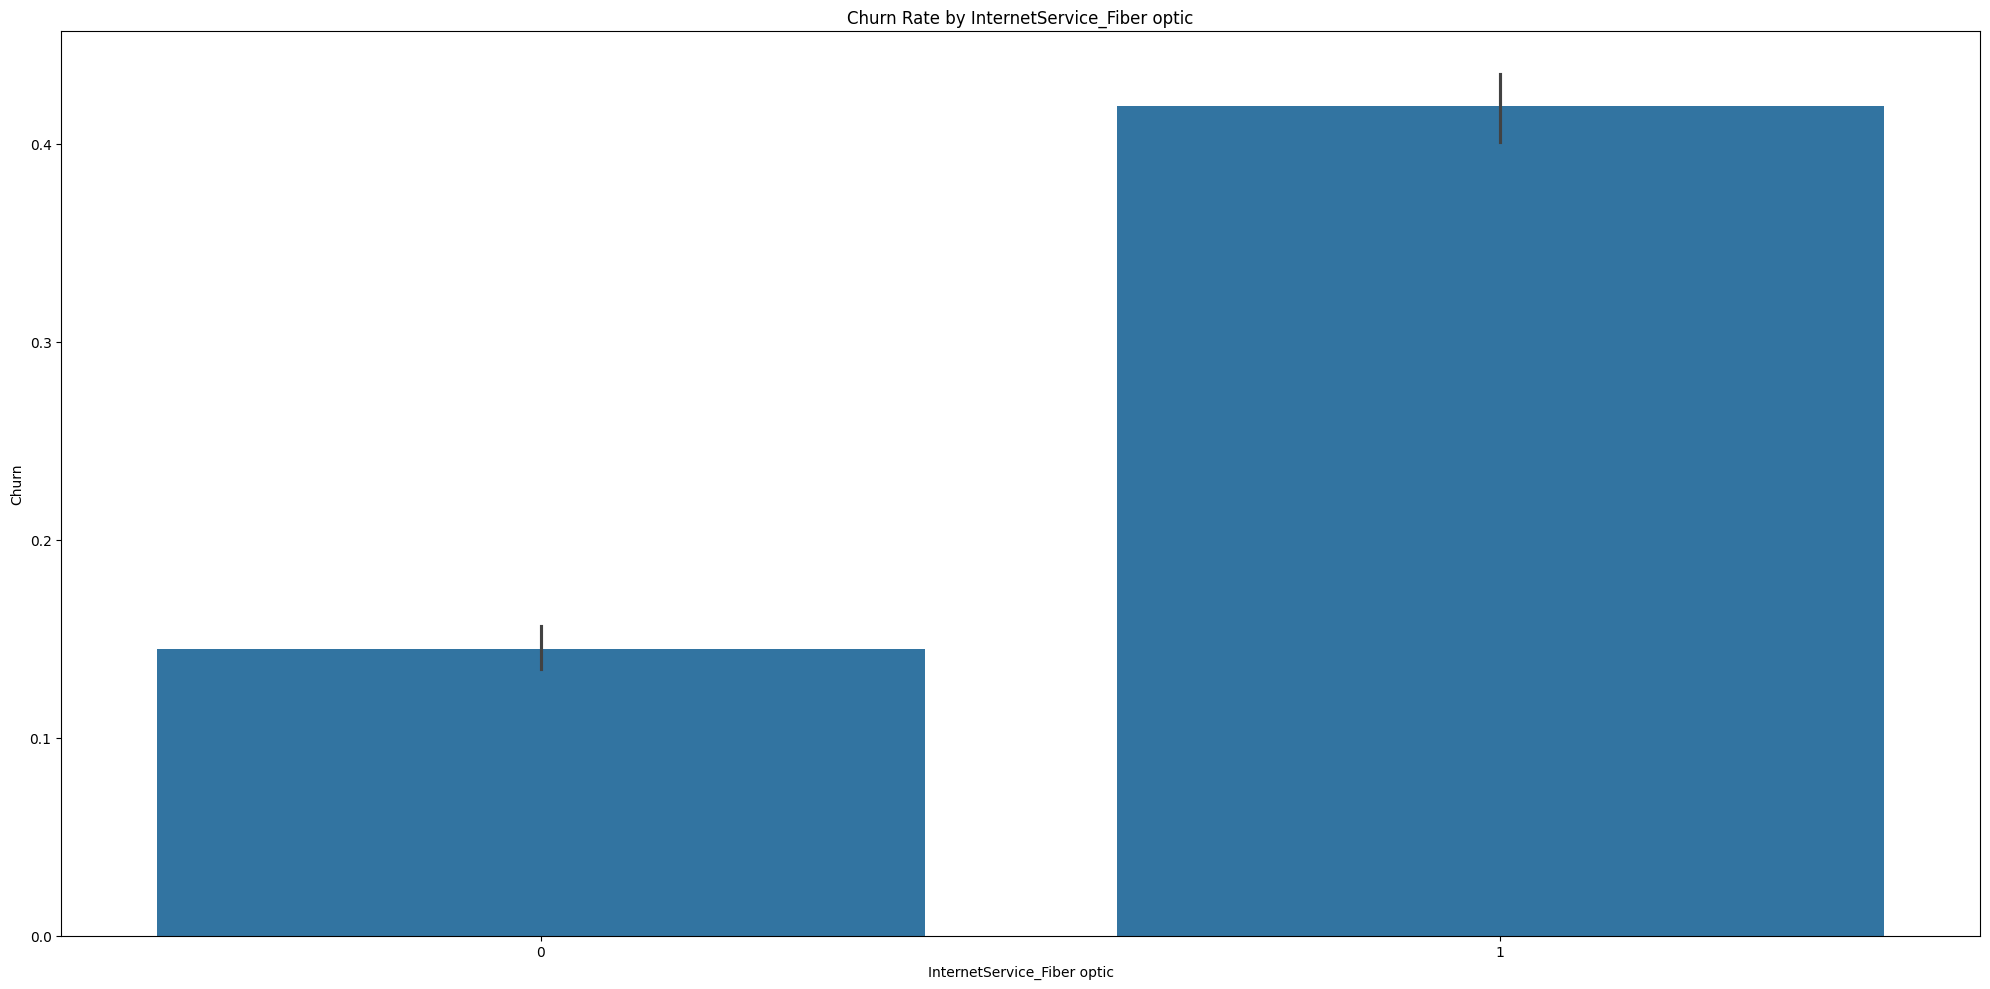

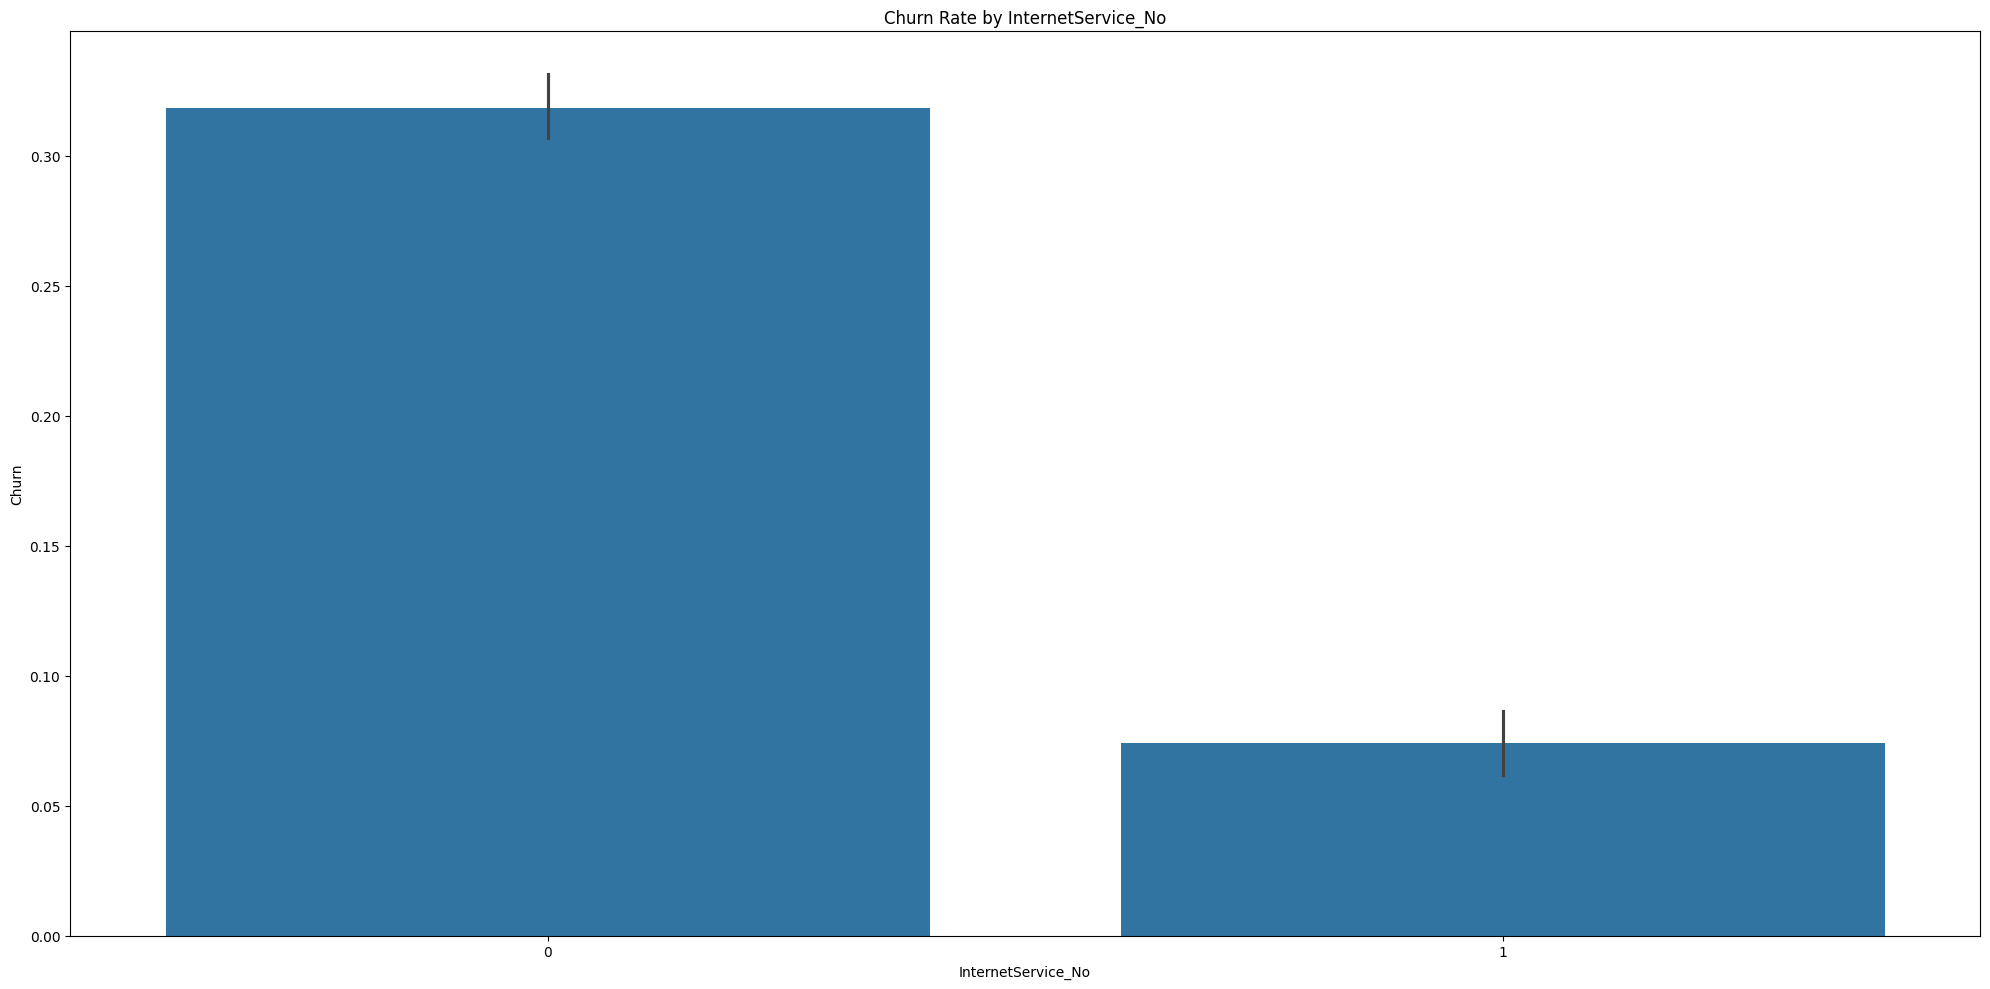

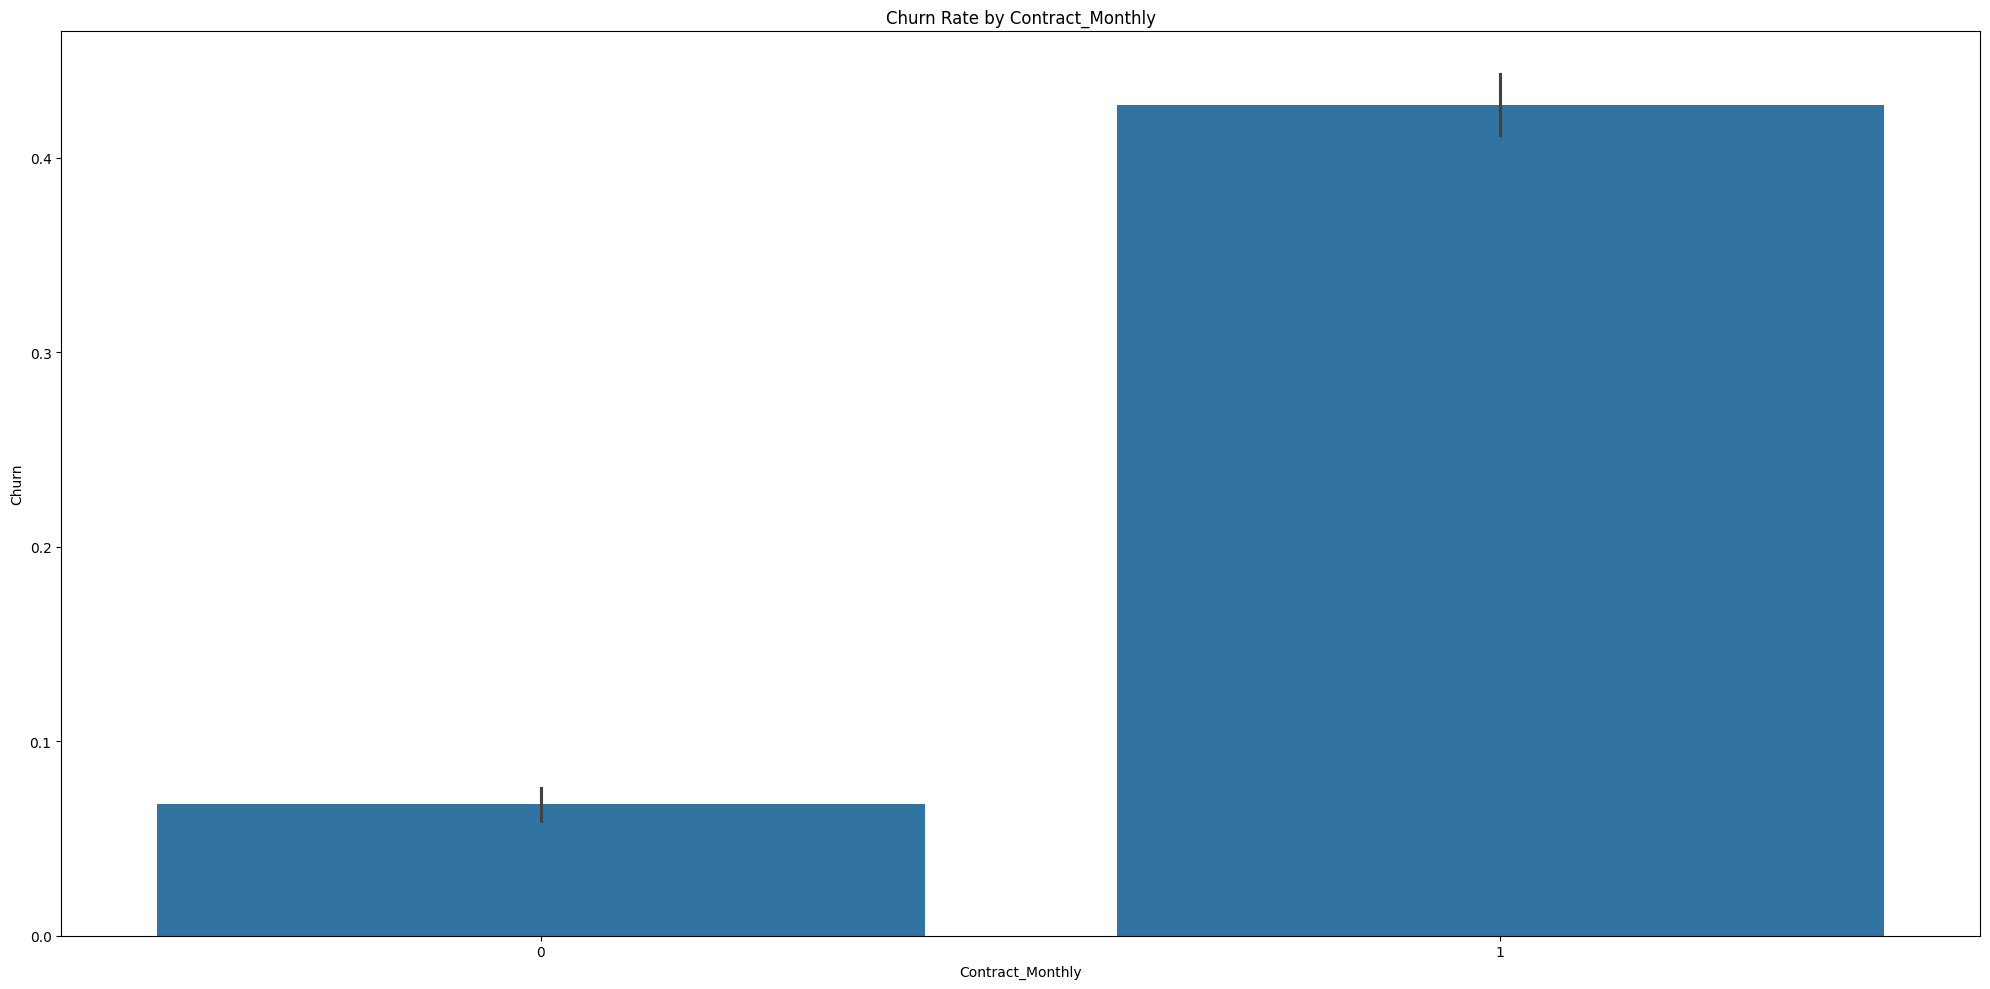

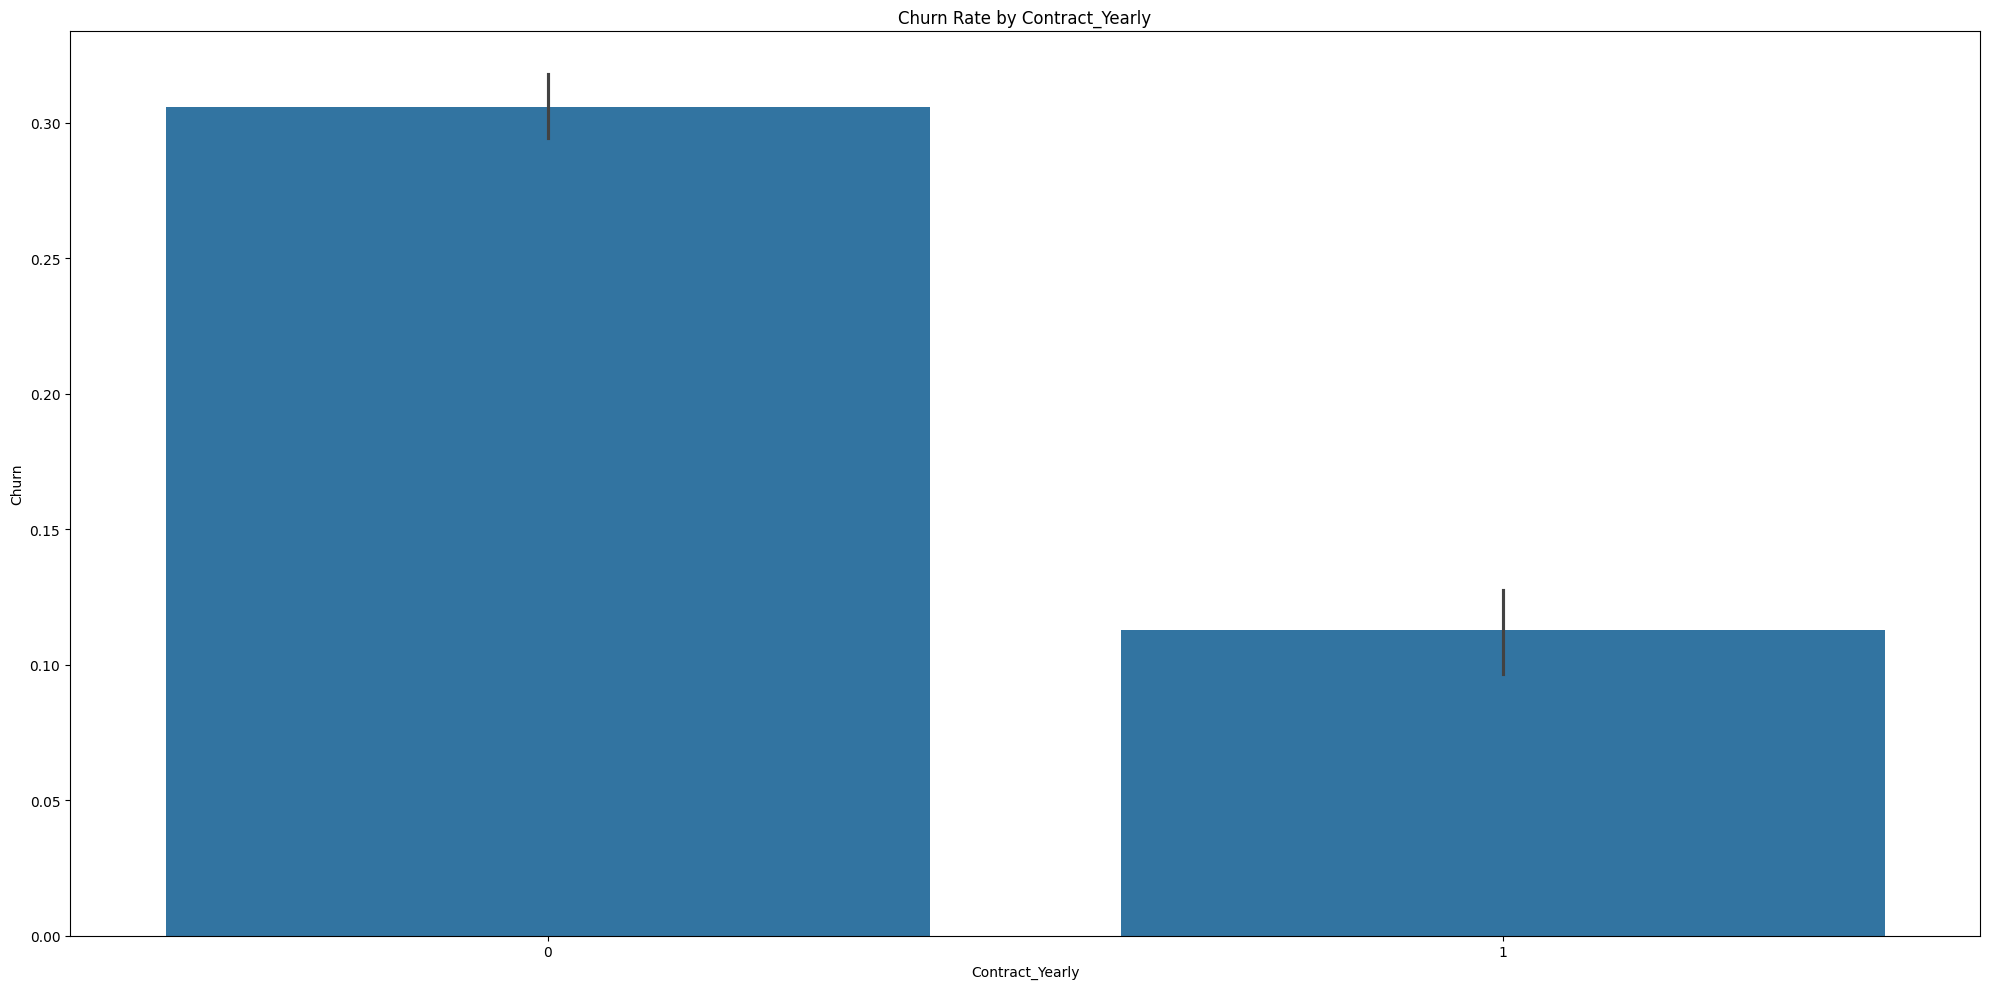

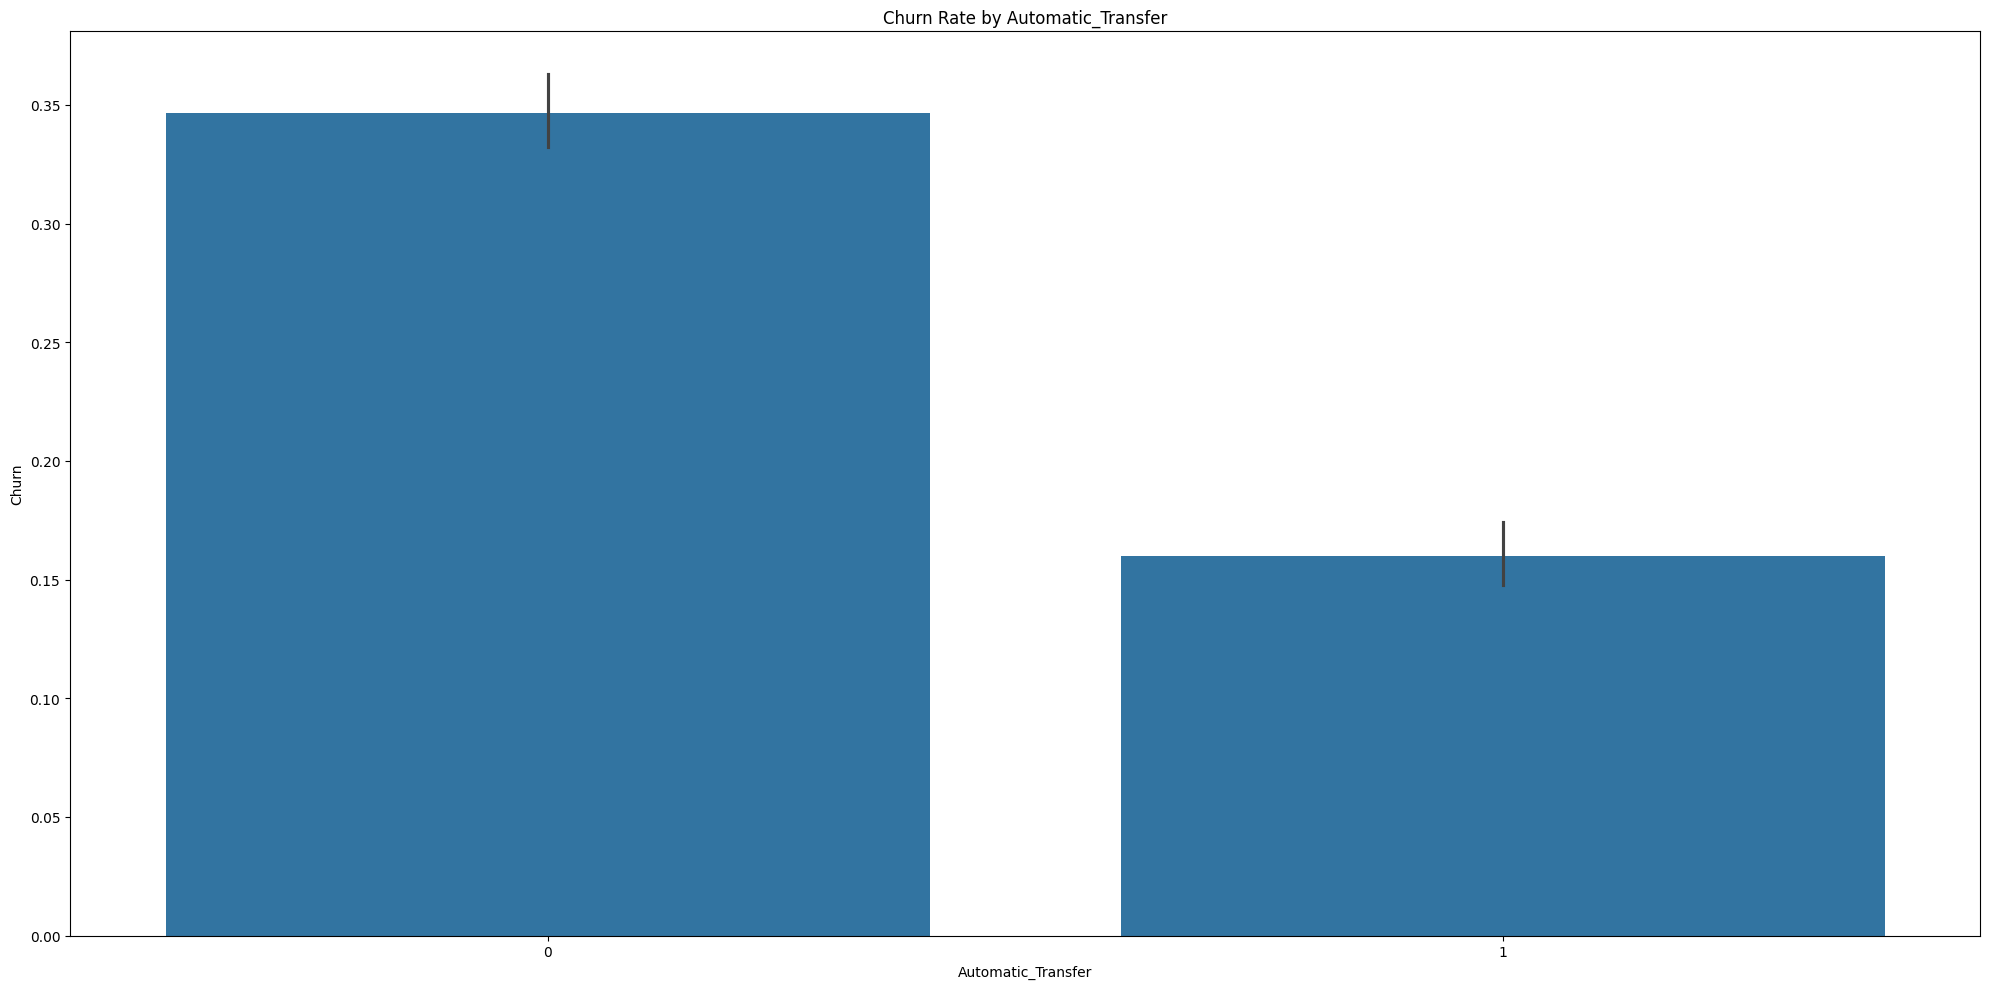

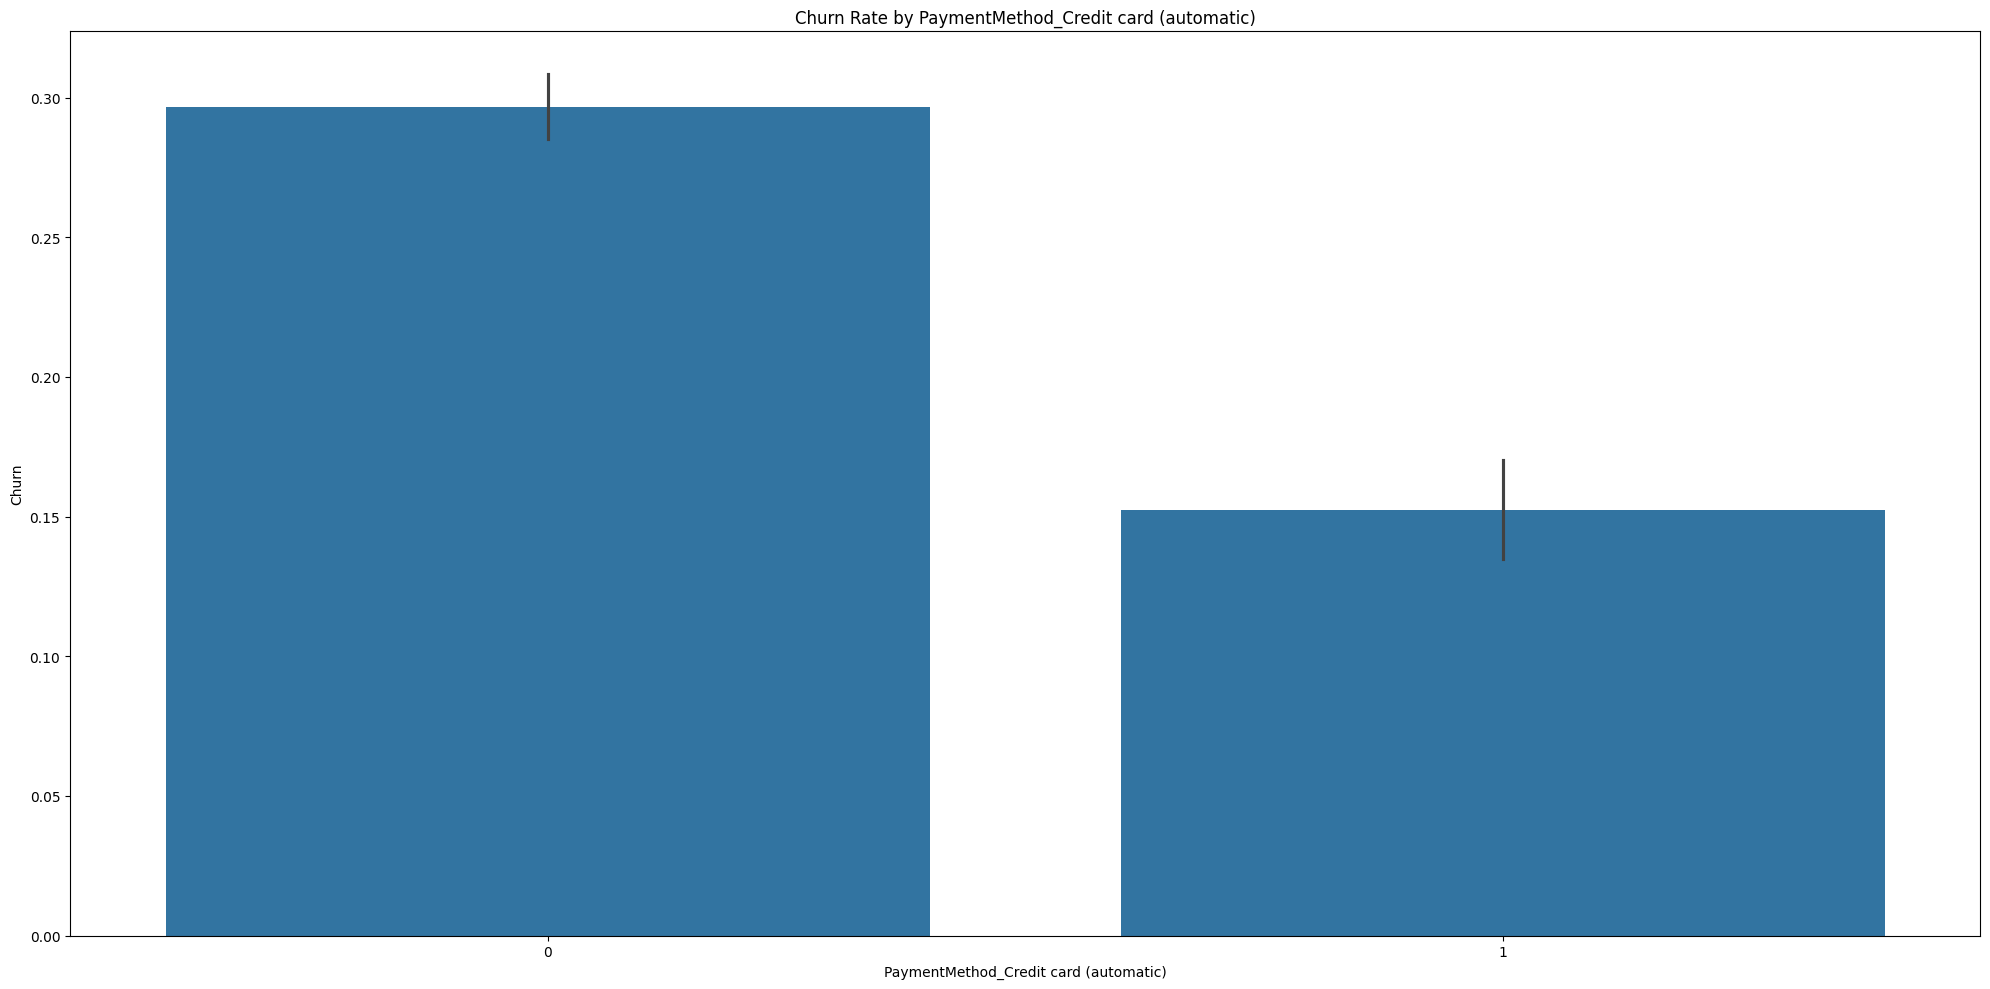

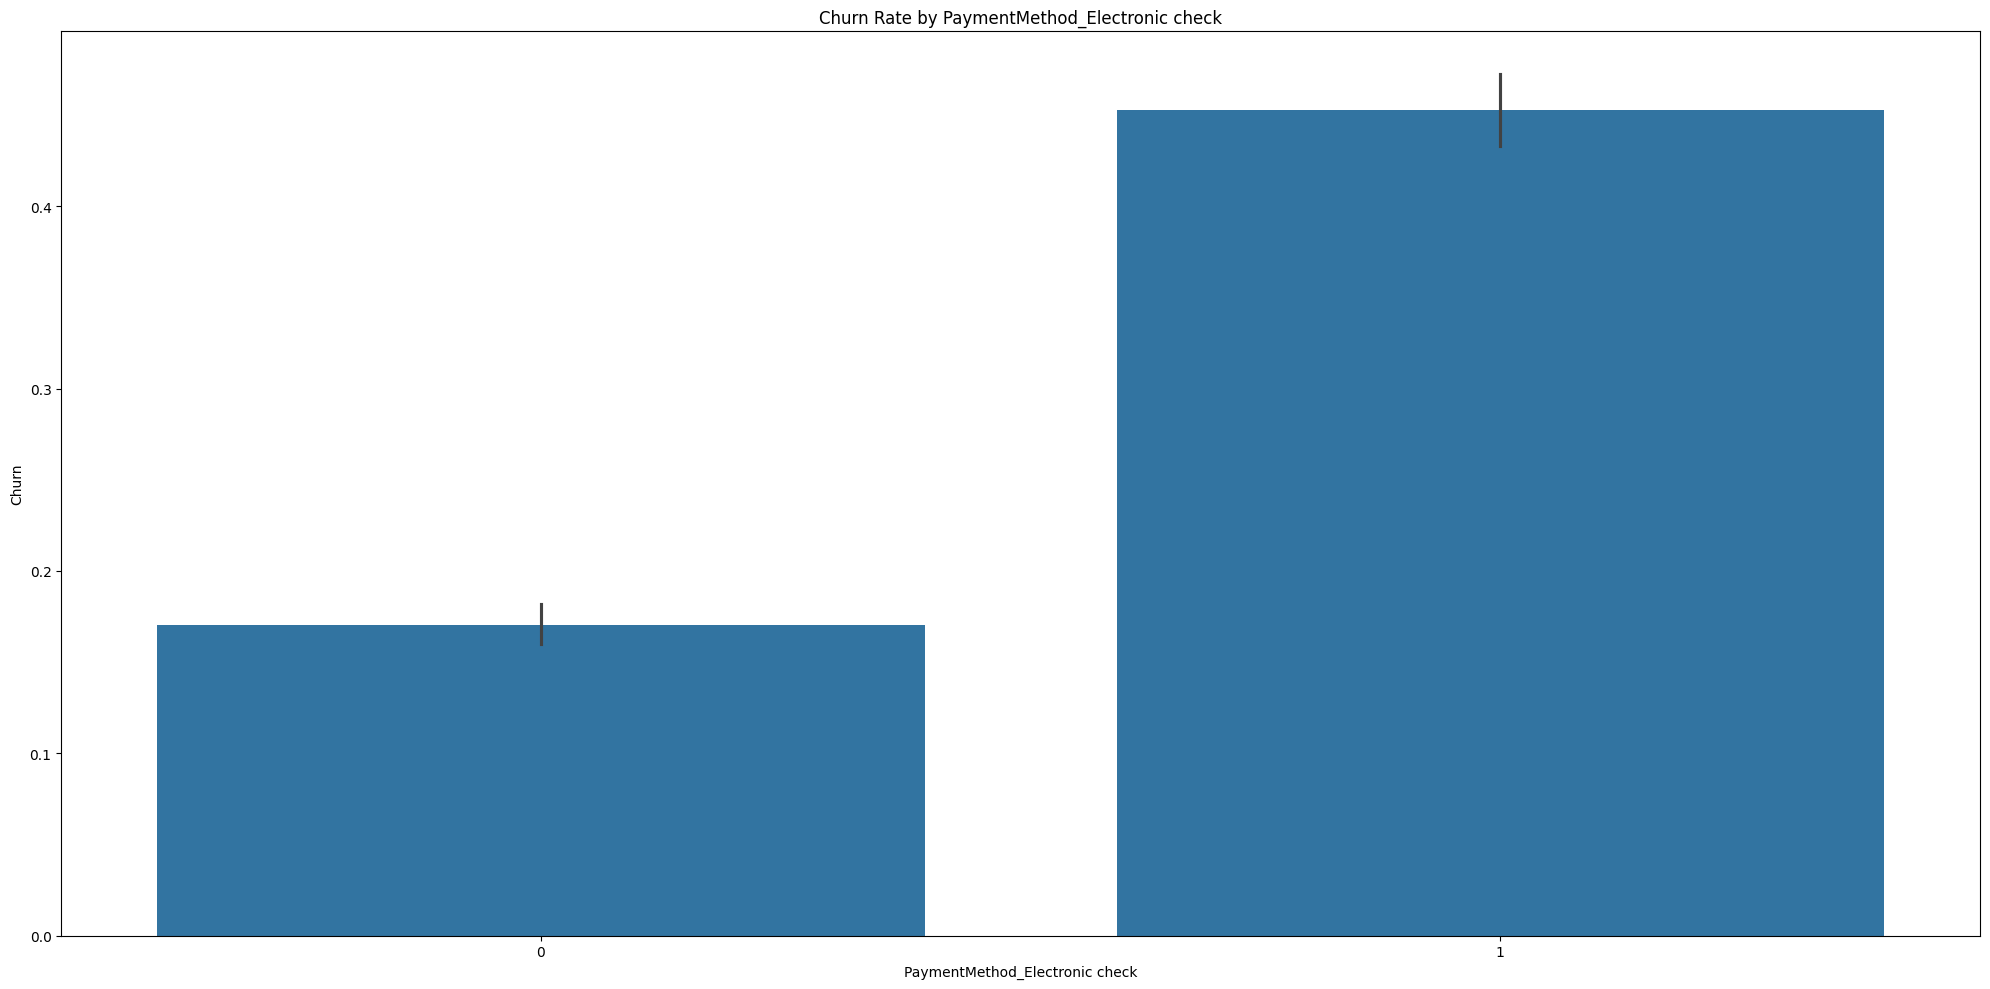

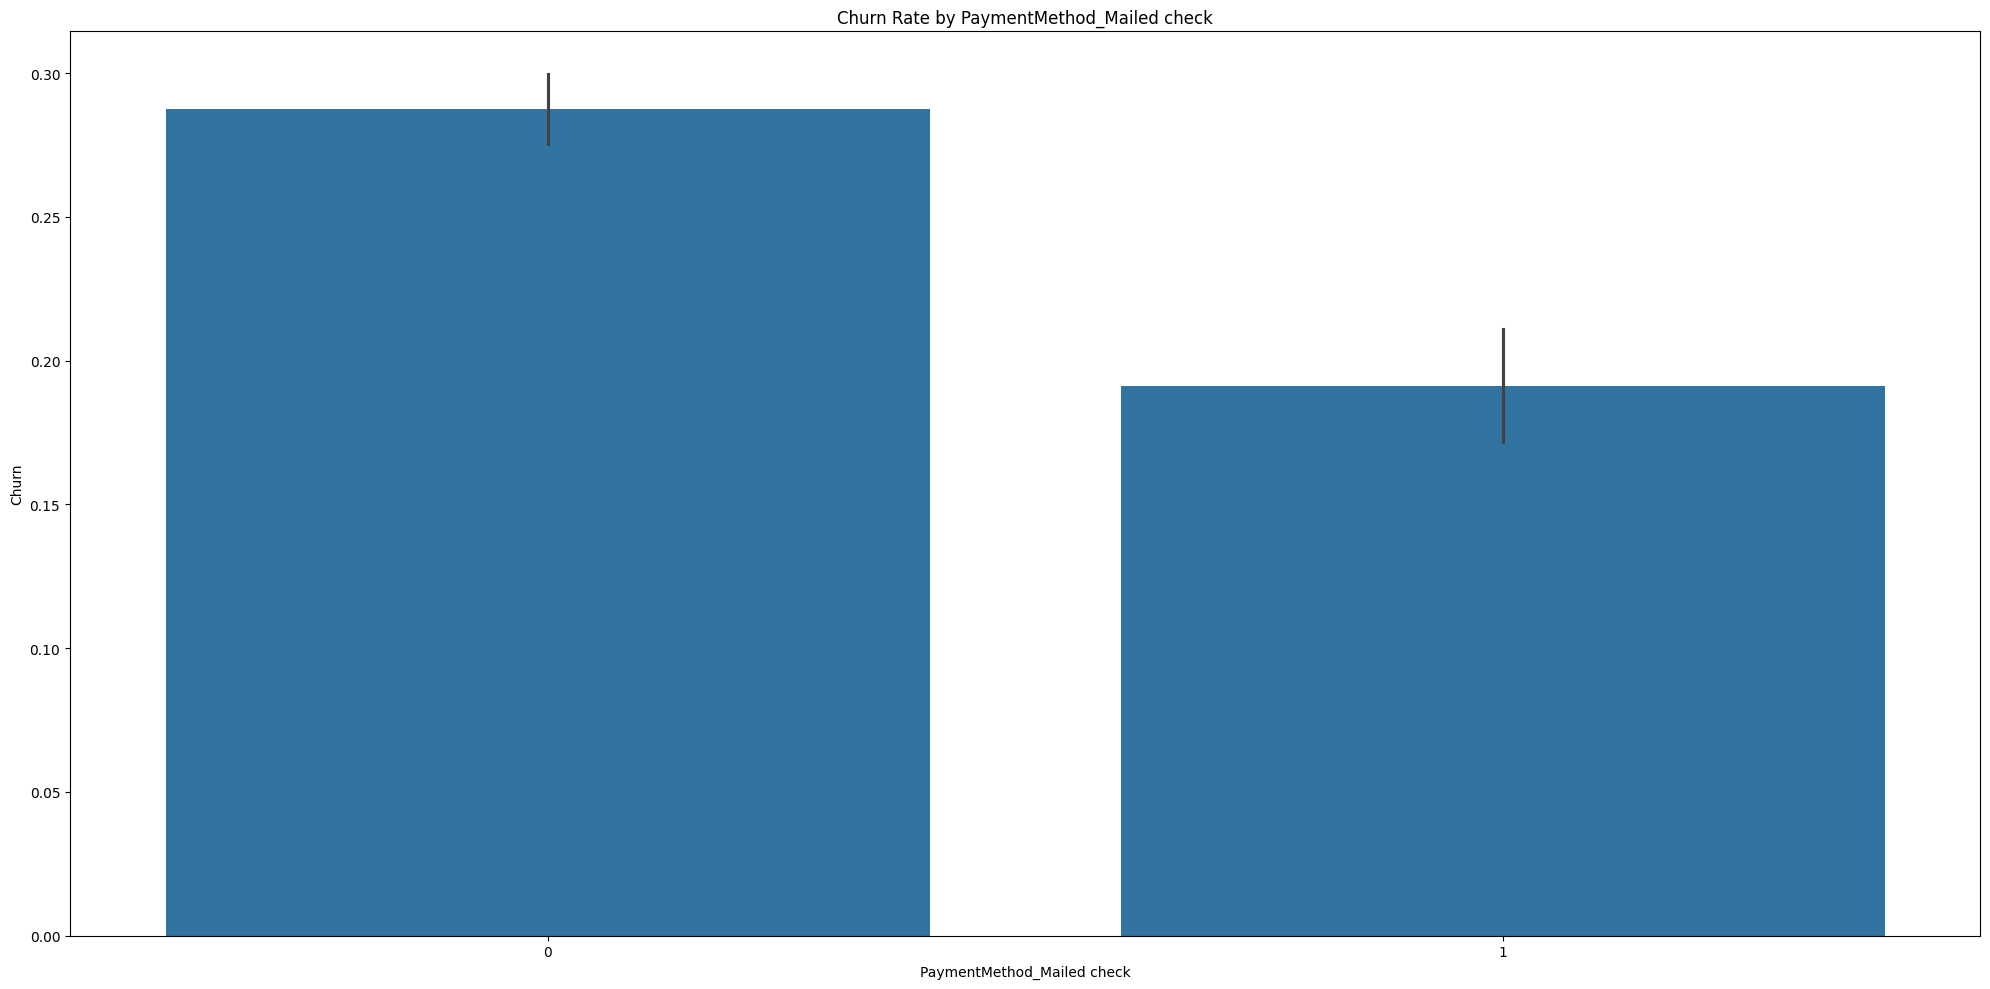

In [219]:
for cols in bools_cols:
    plt.figure(figsize = (20, 10))
    sns.barplot(x = cols, y = 'Churn', data = df)
    plt.title(f"Churn Rate by {cols}")
    plt.tight_layout()
    plt.show()

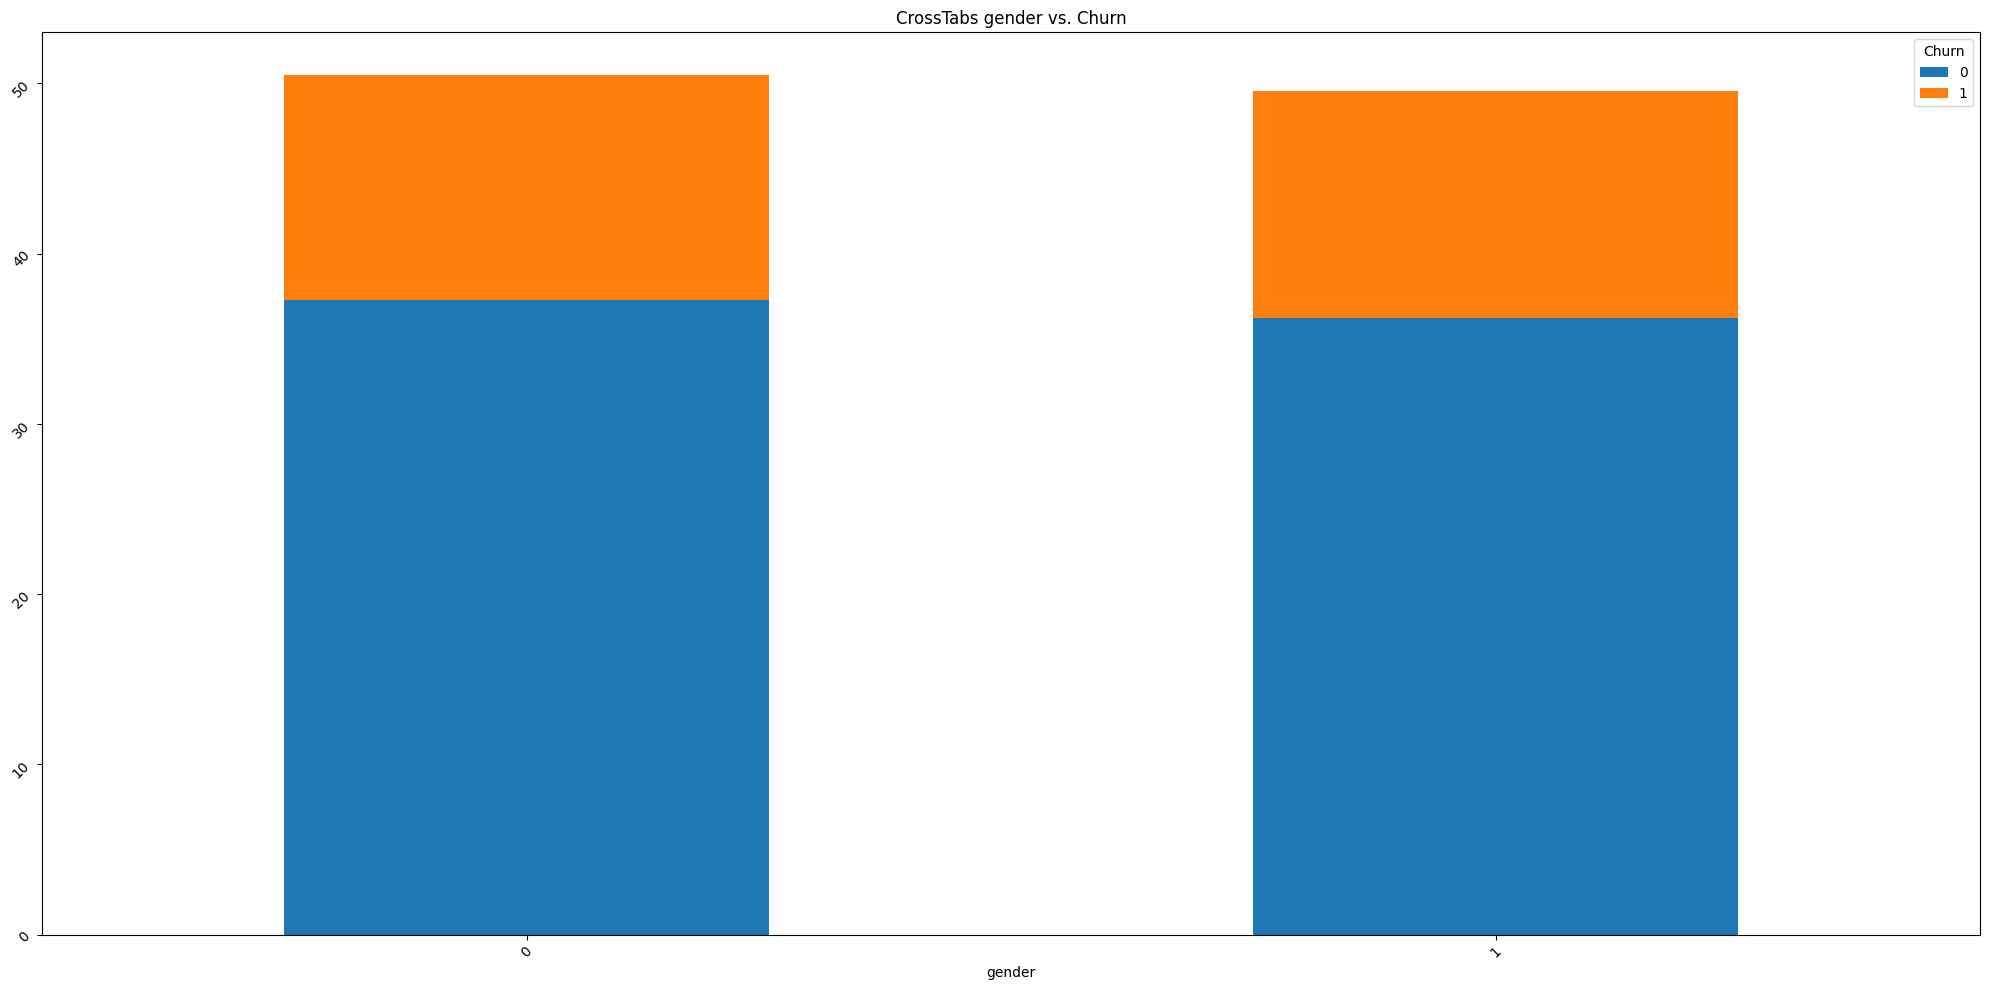

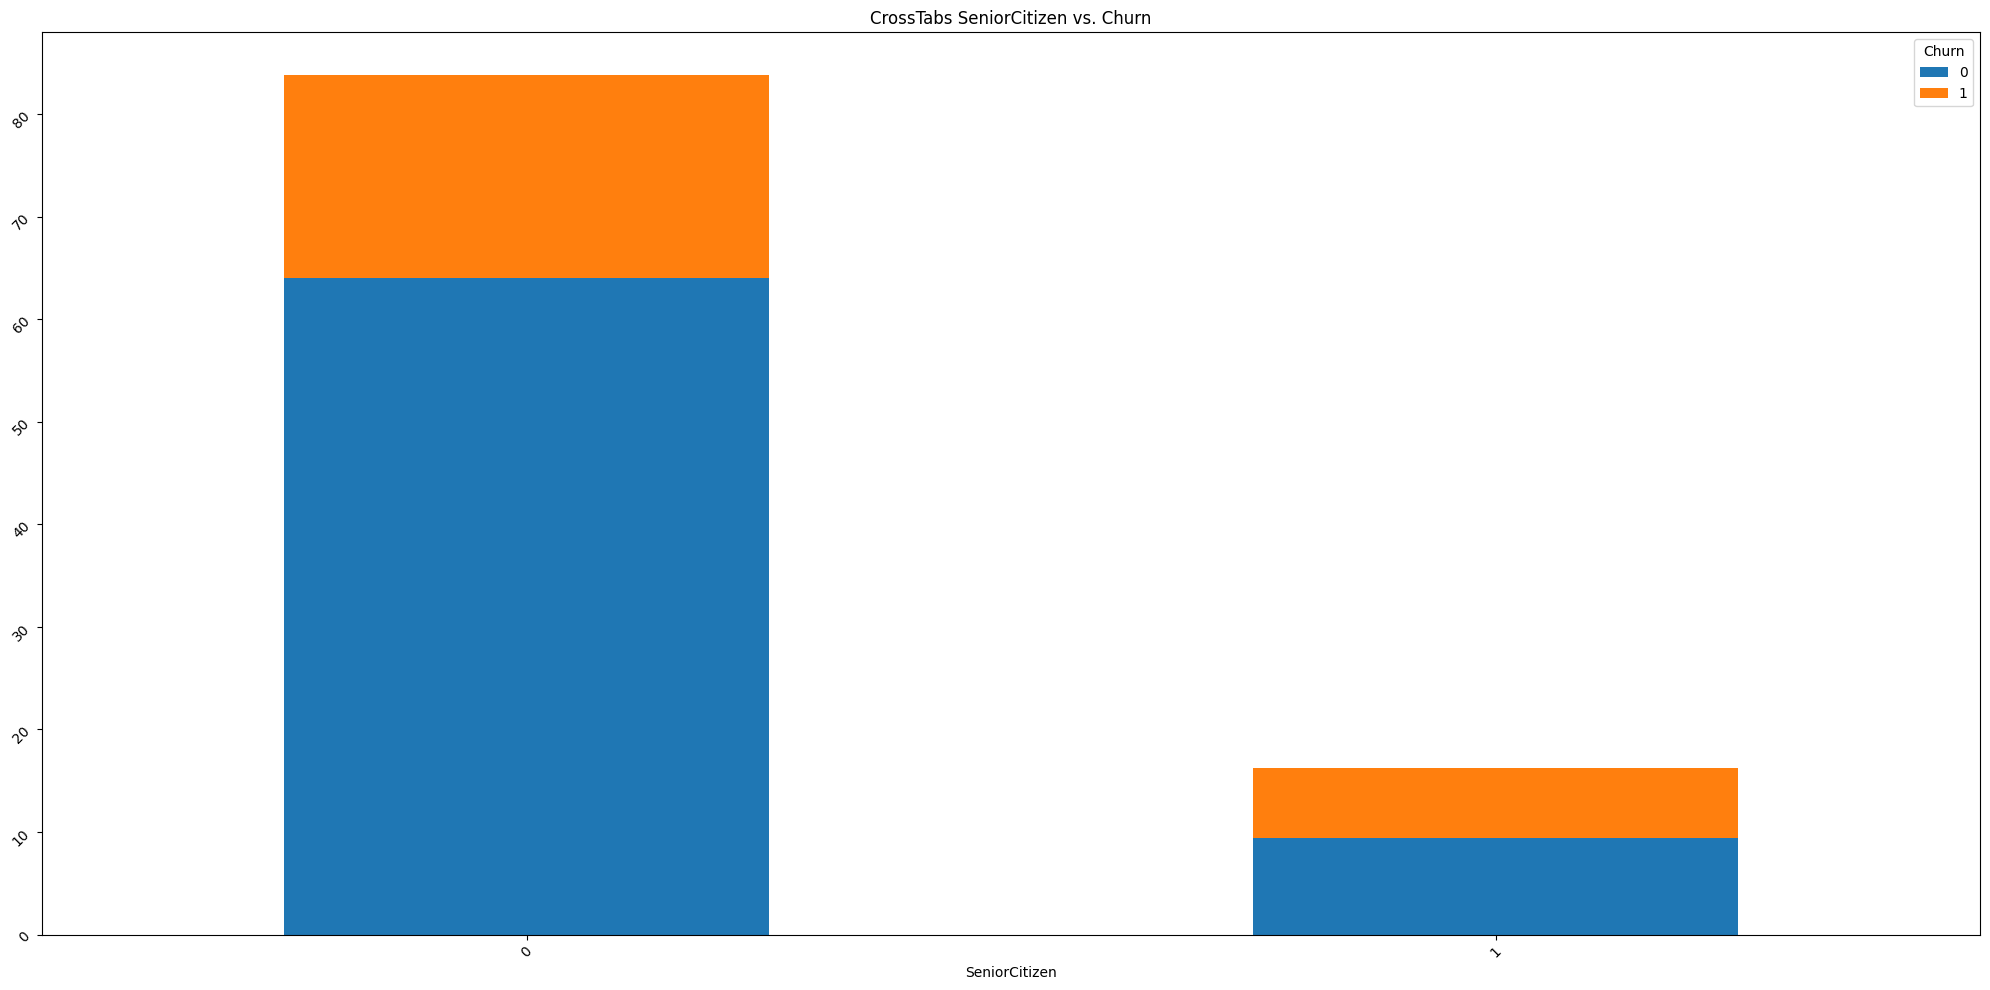

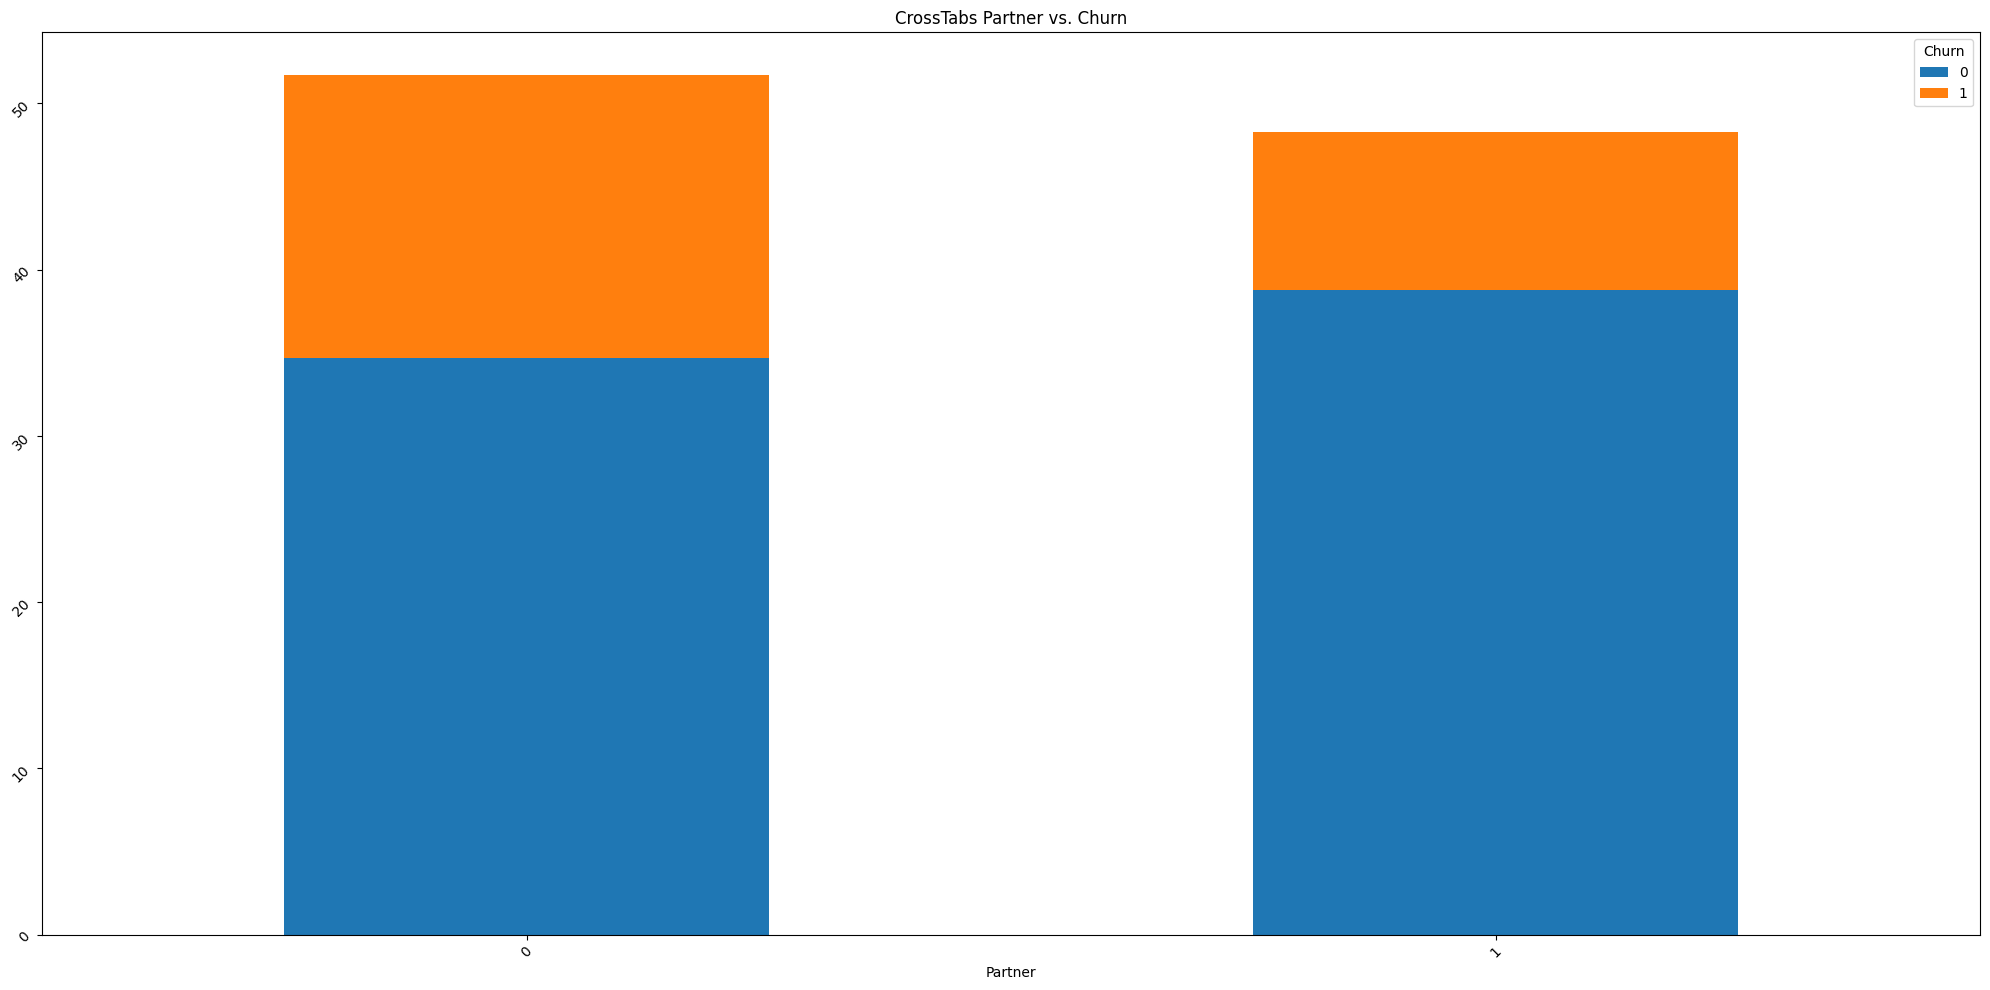

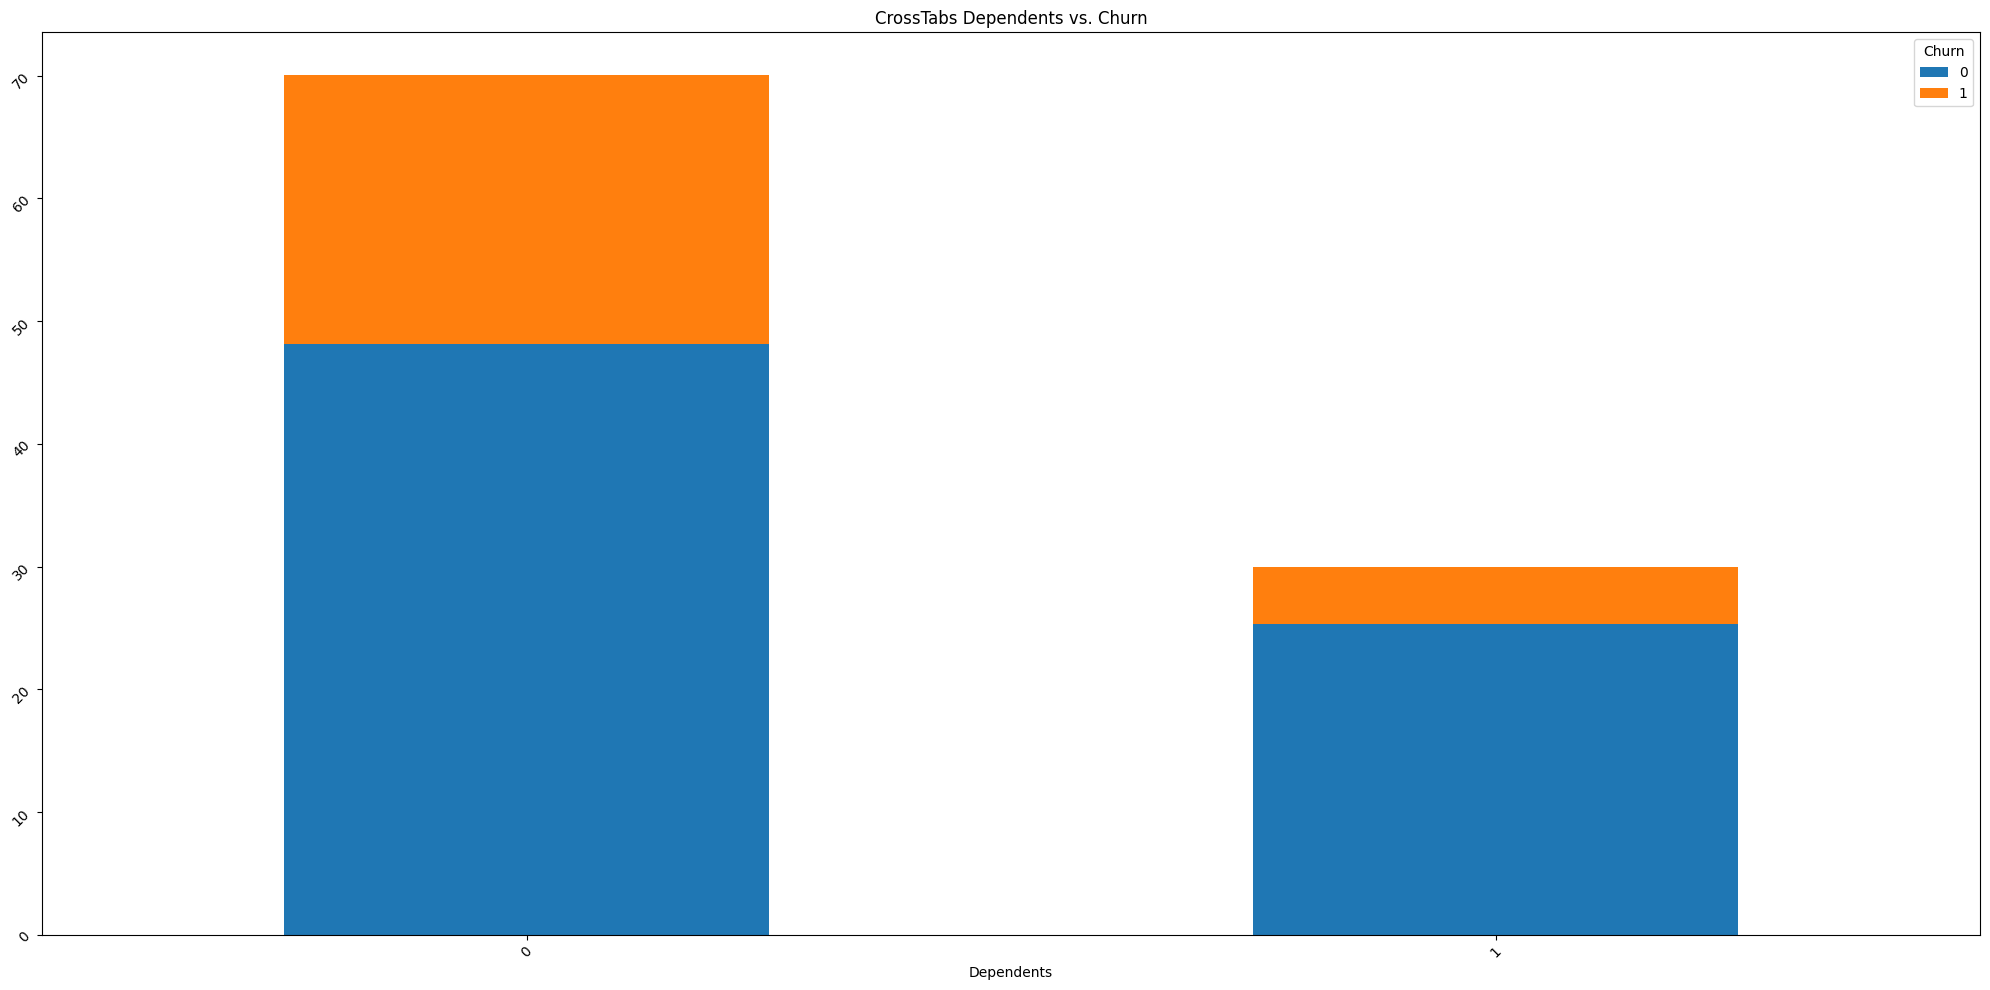

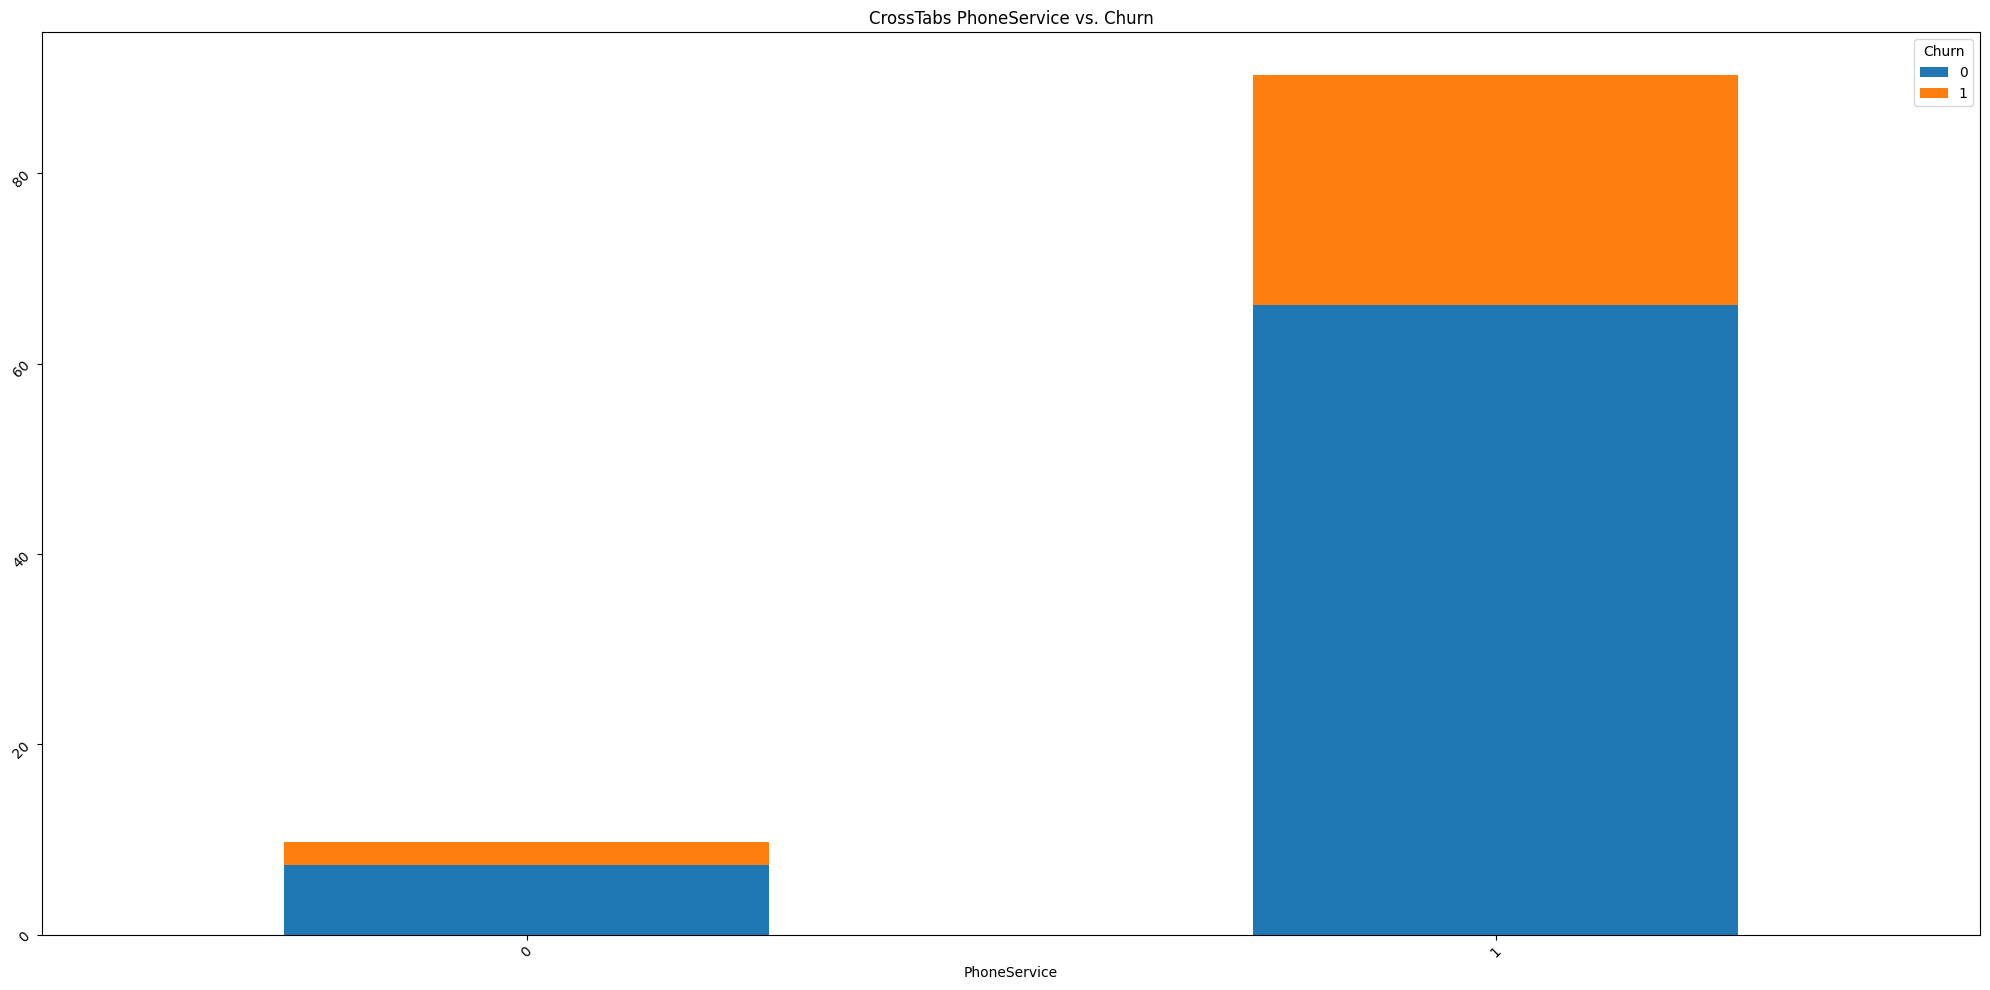

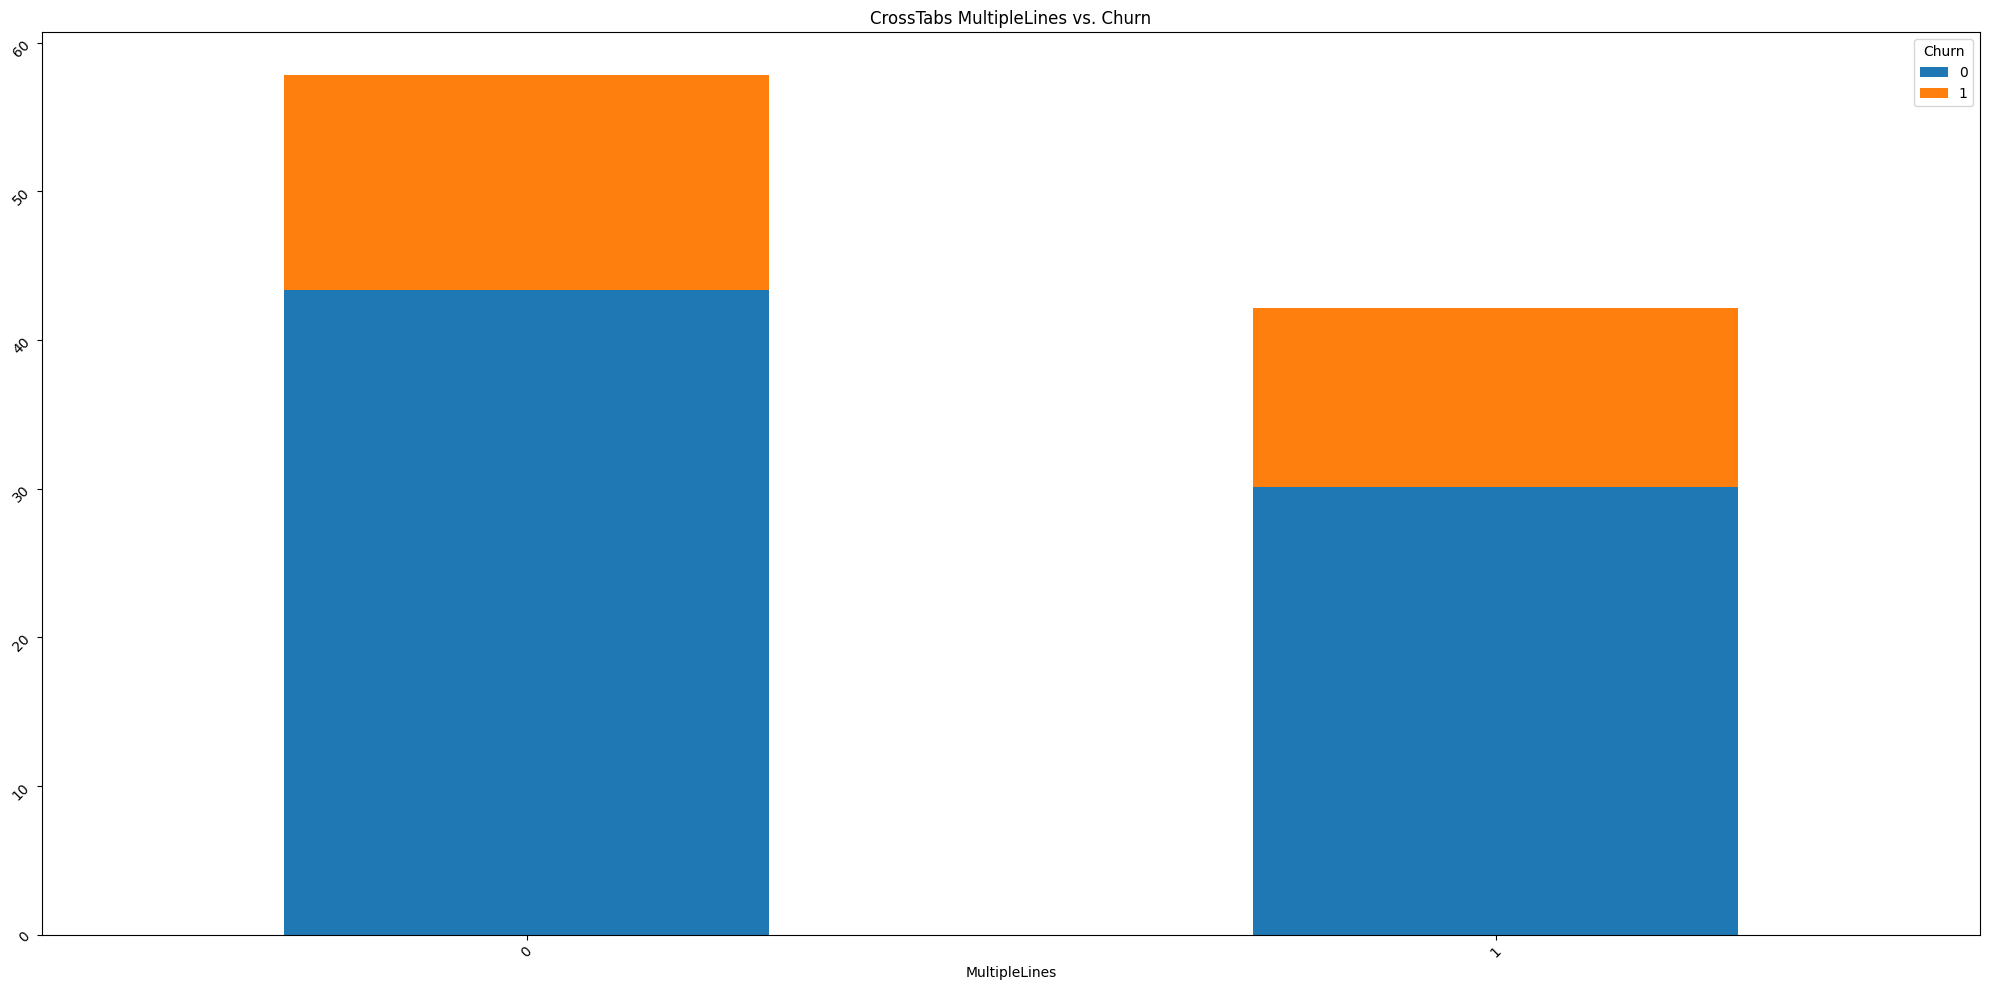

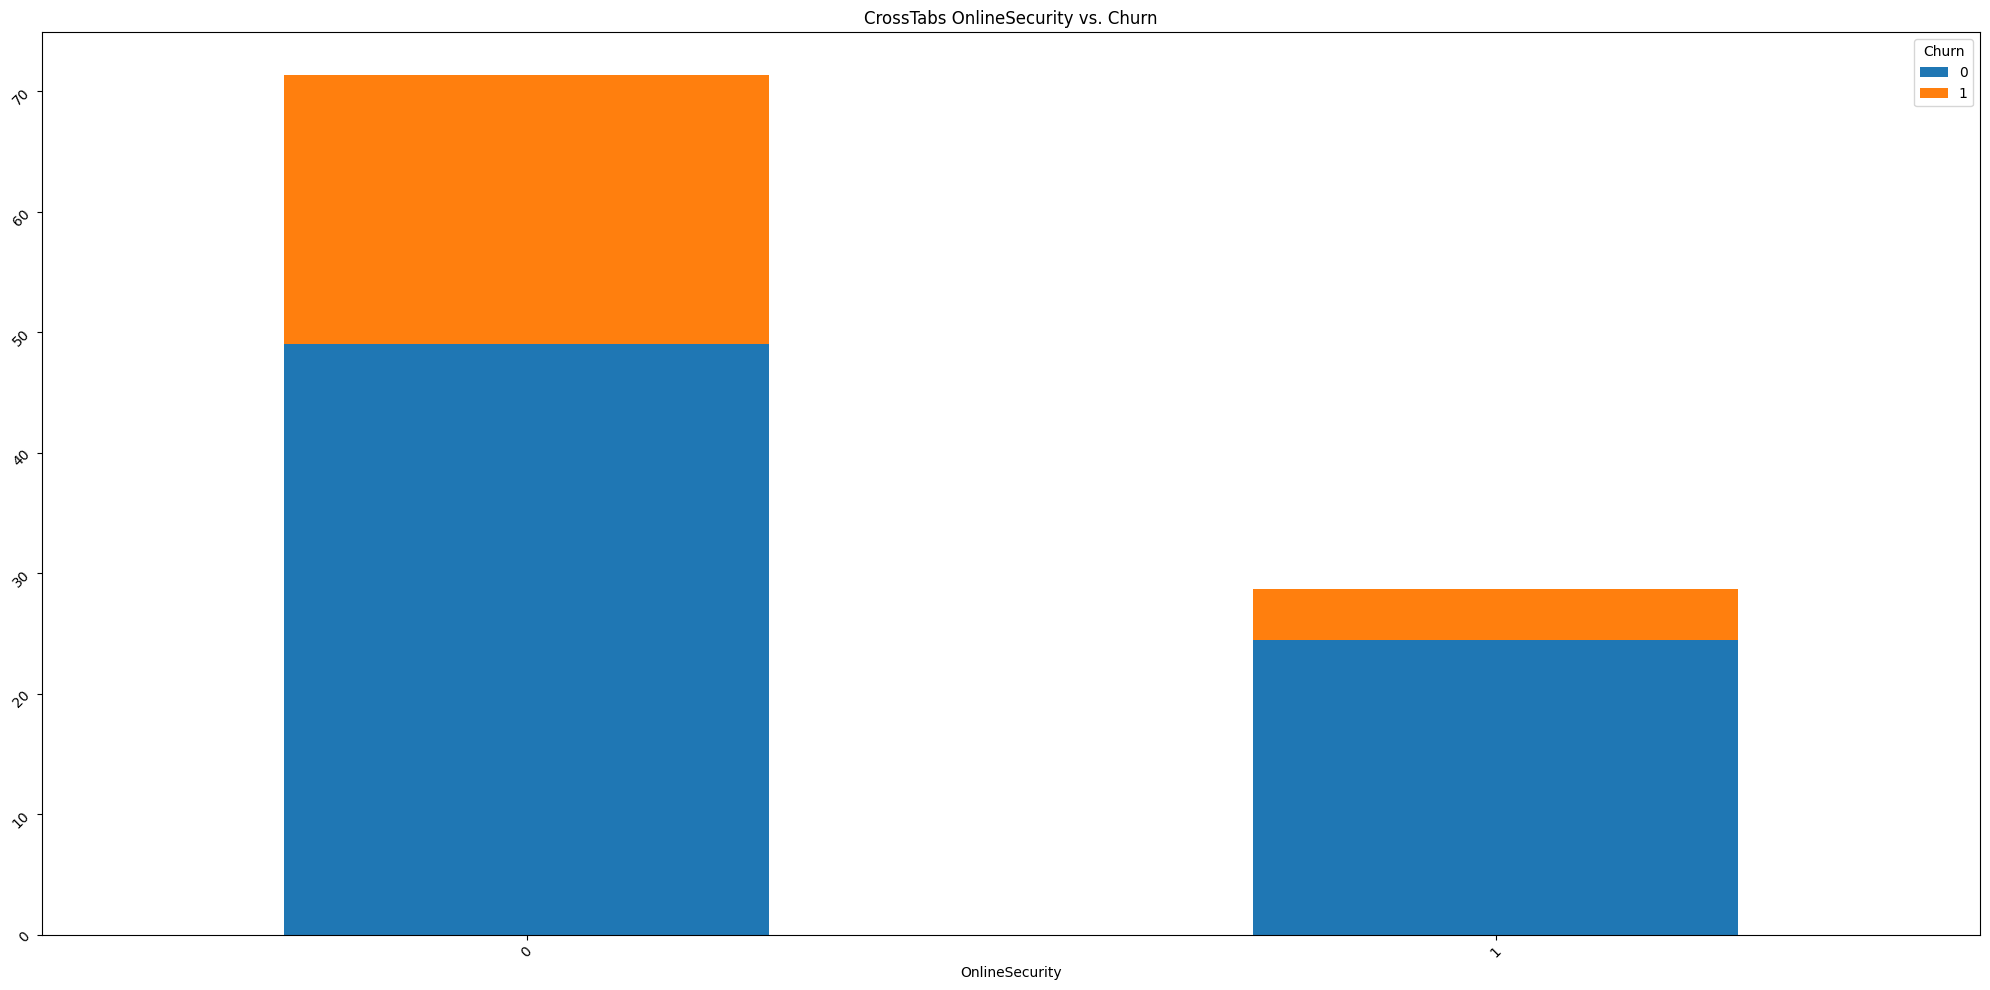

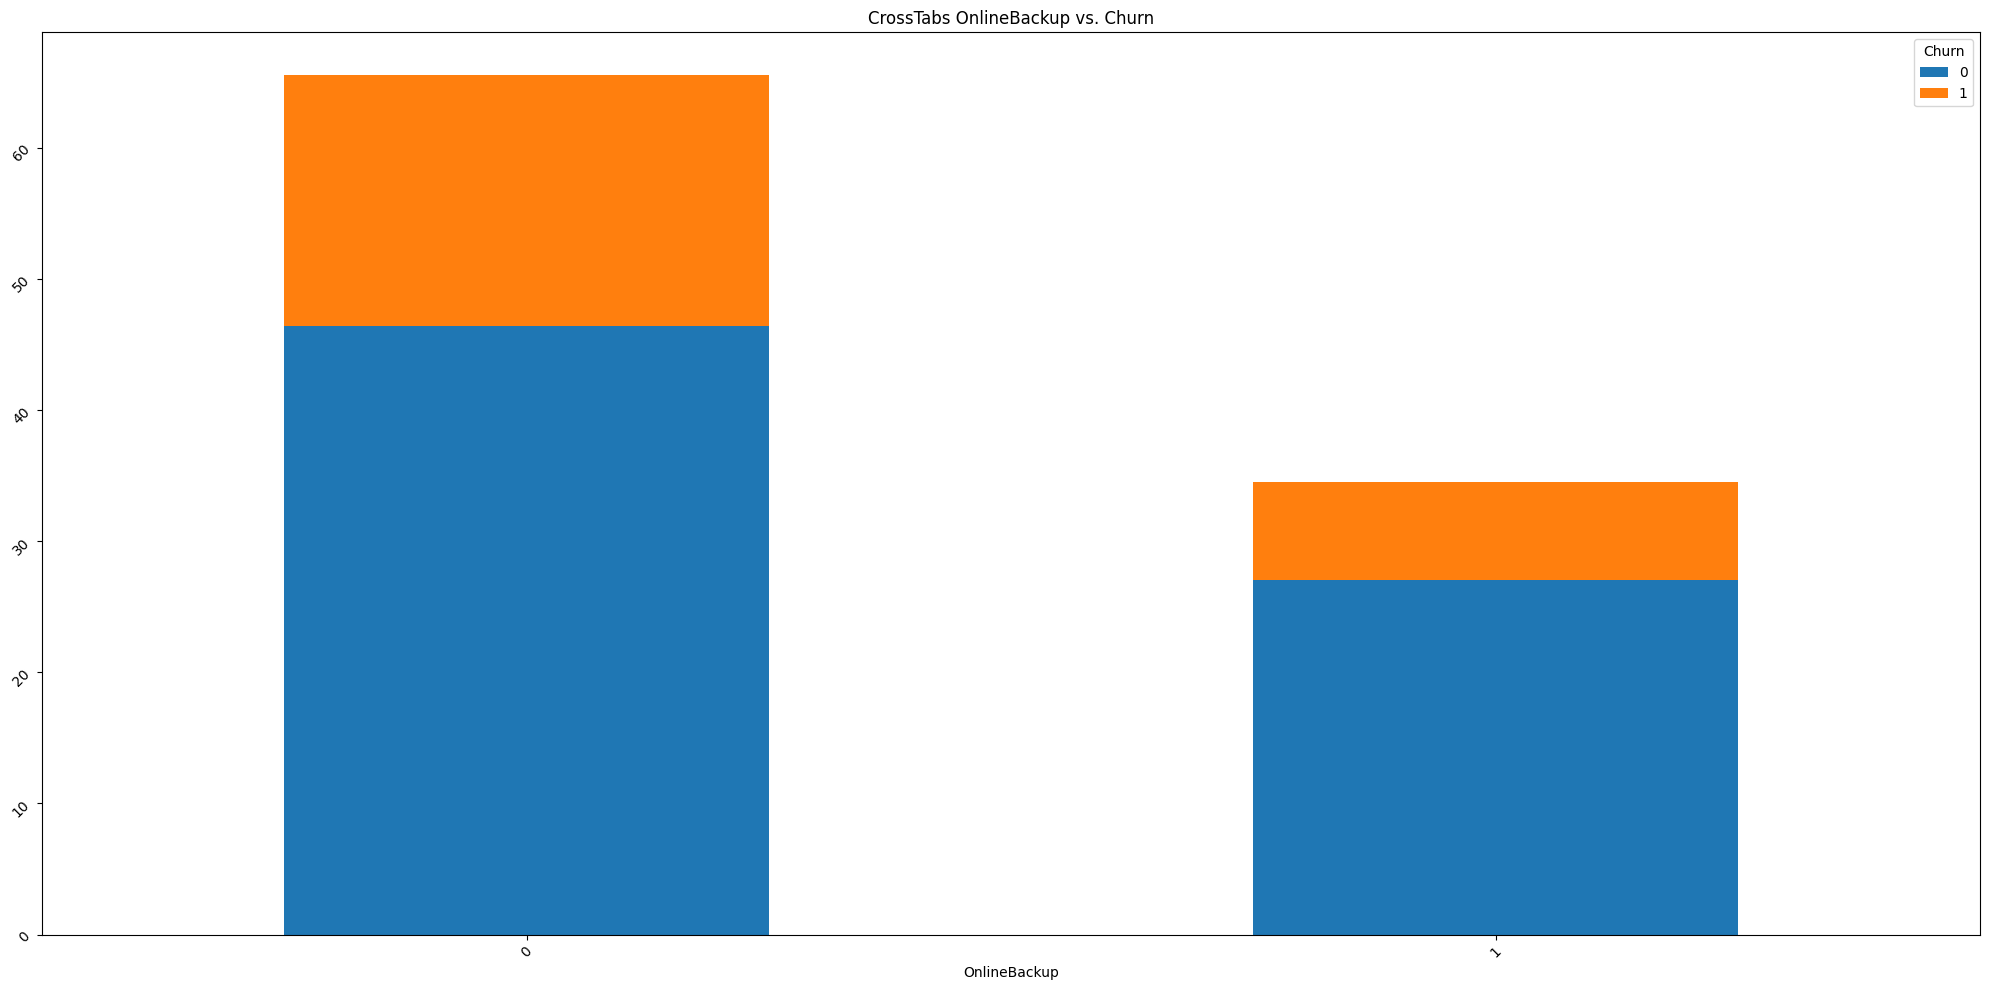

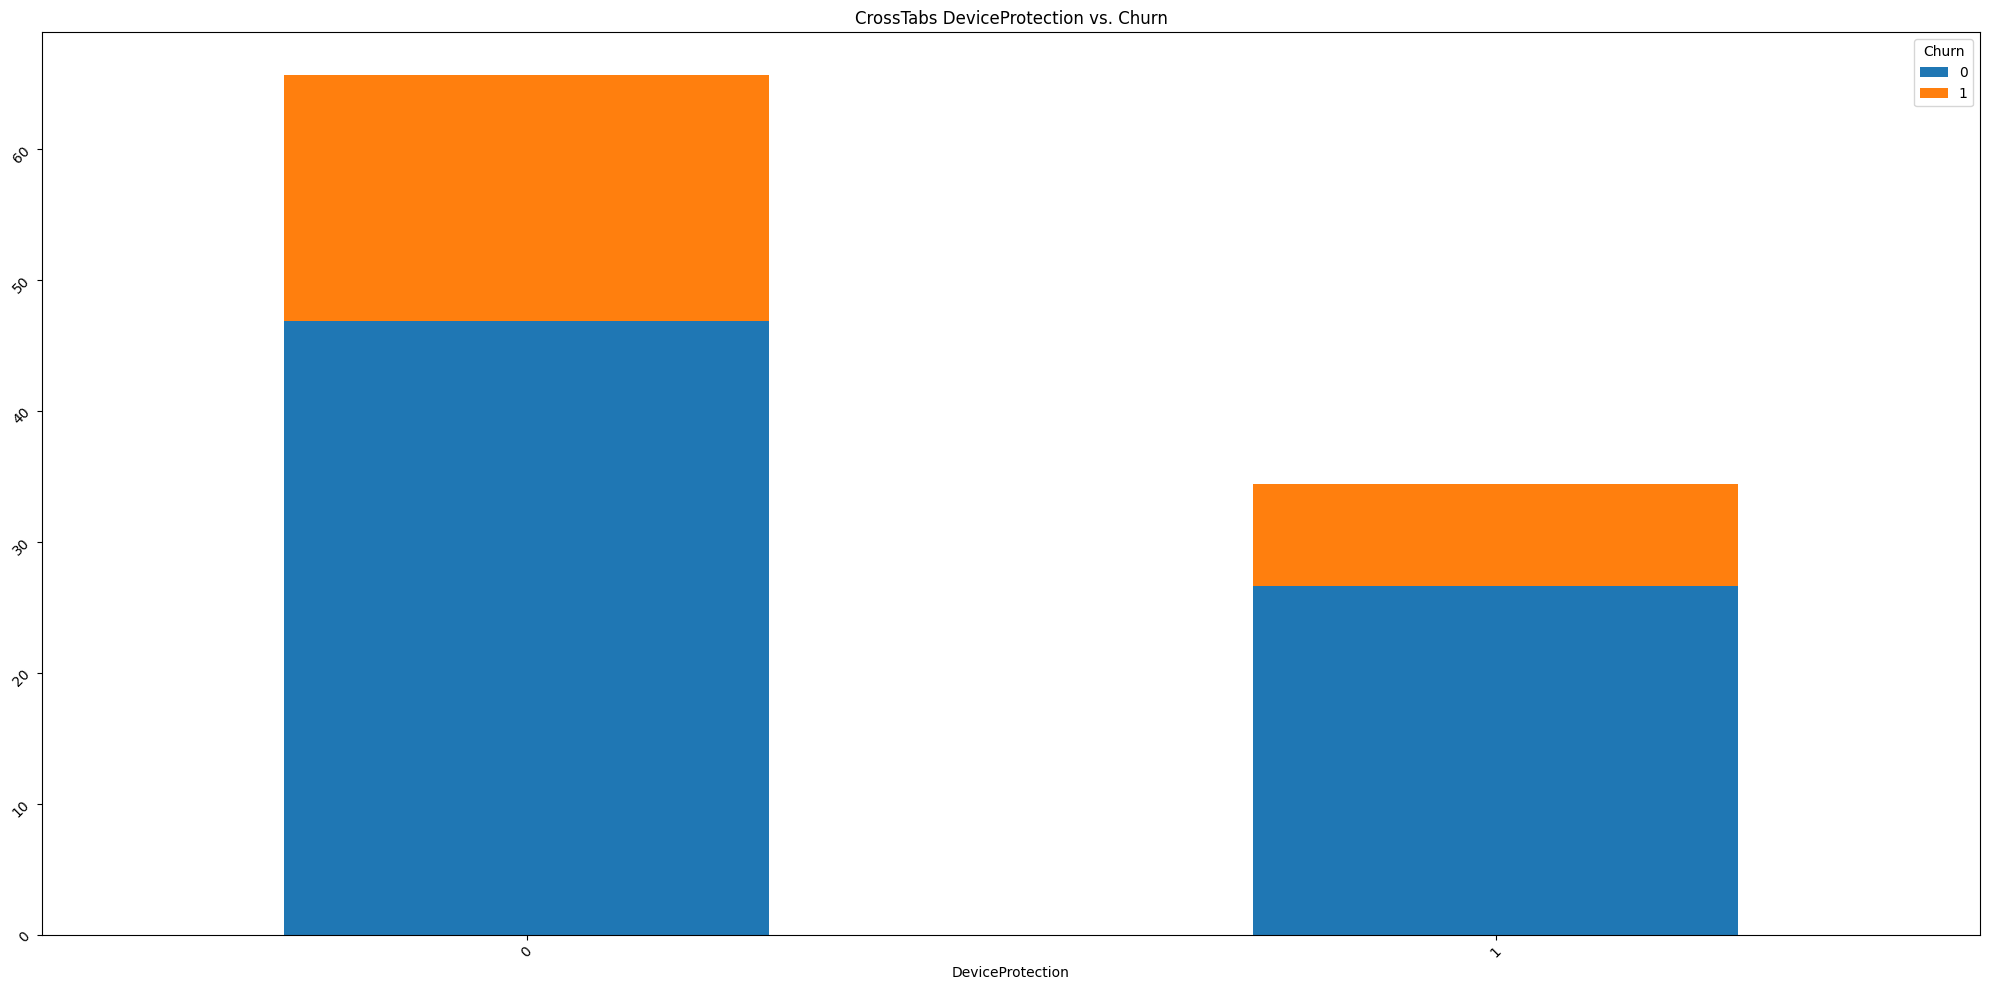

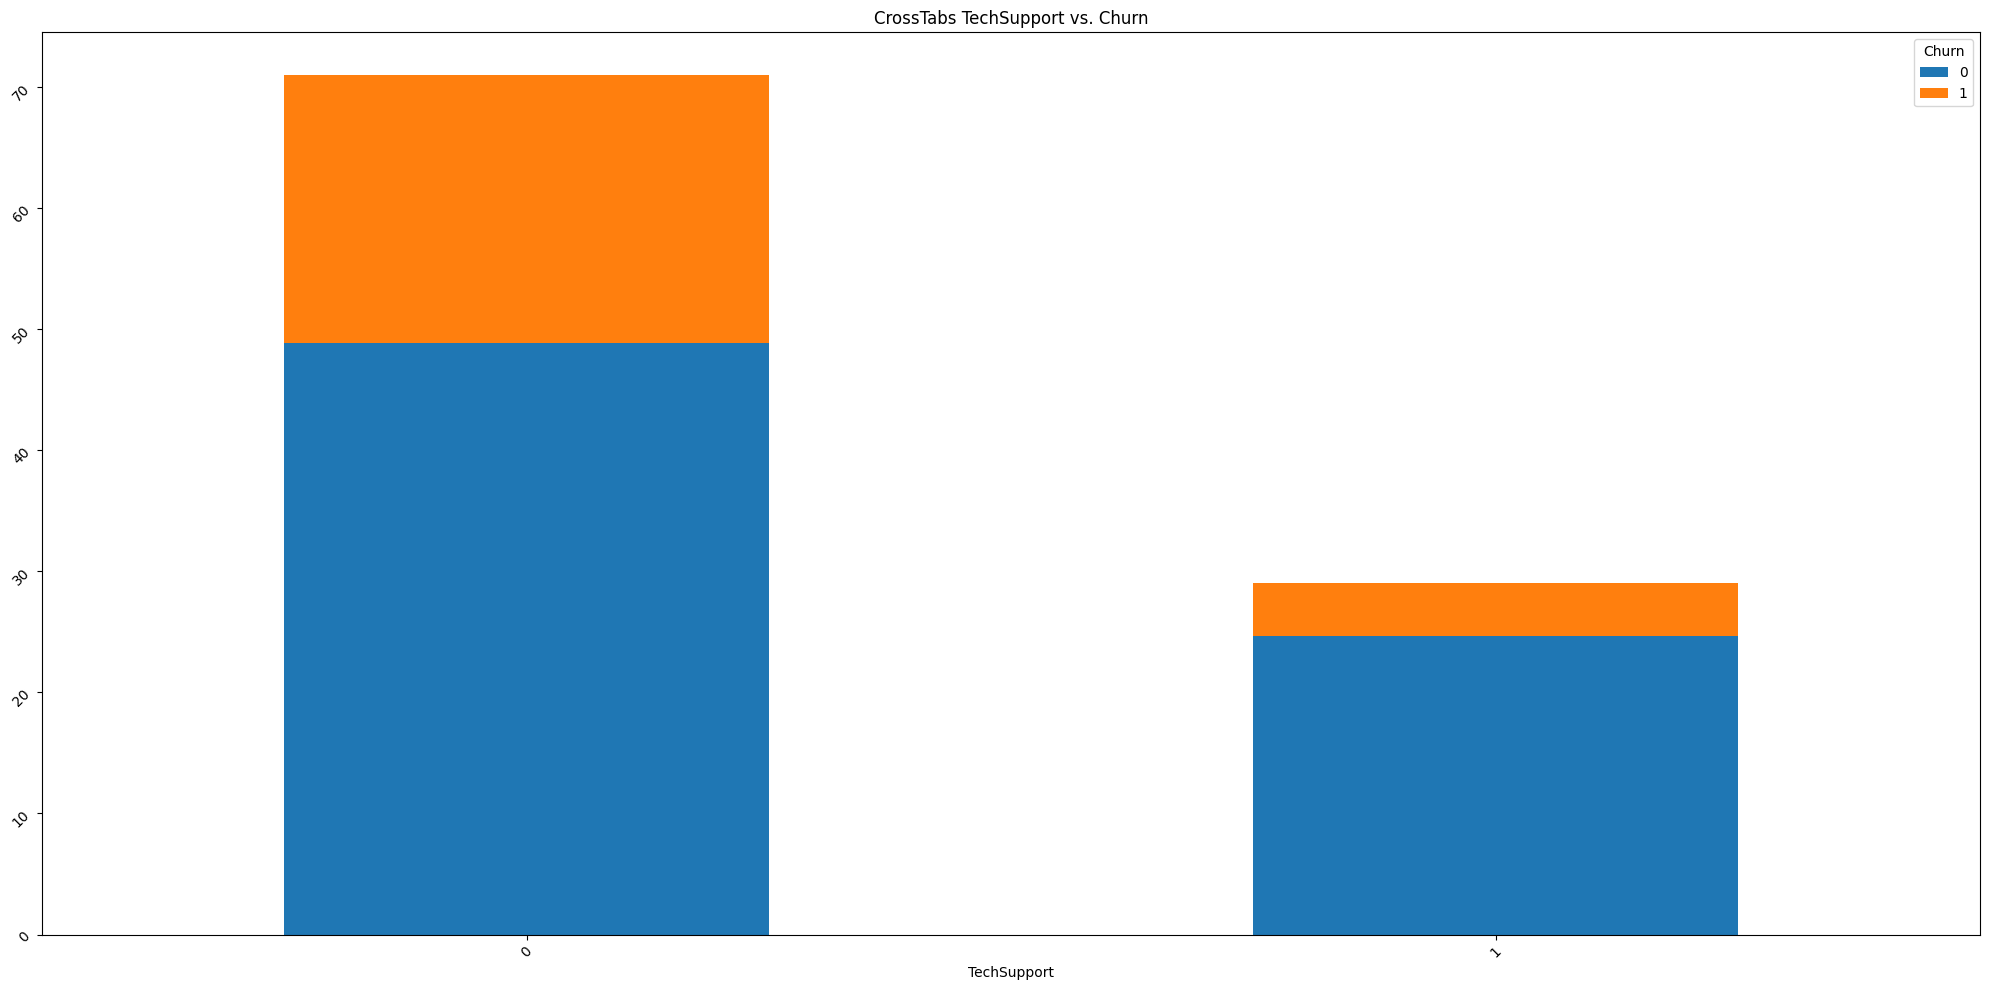

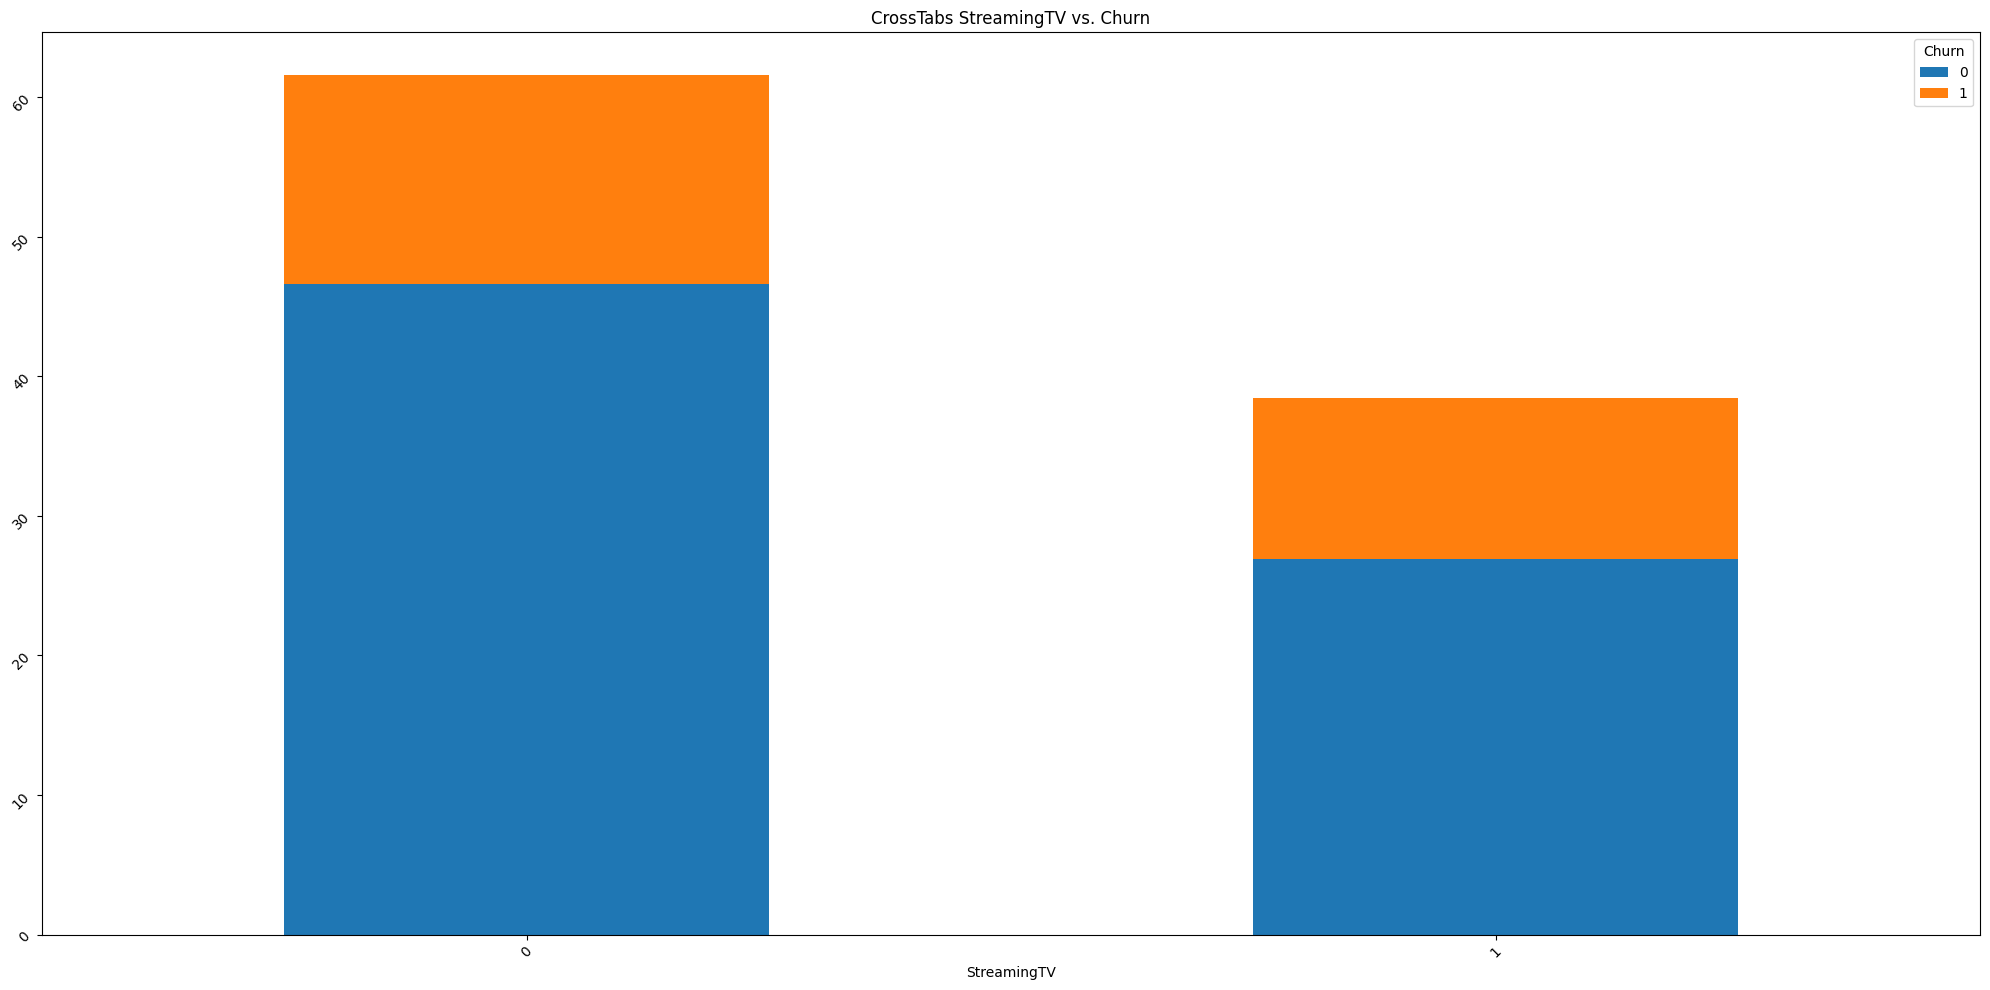

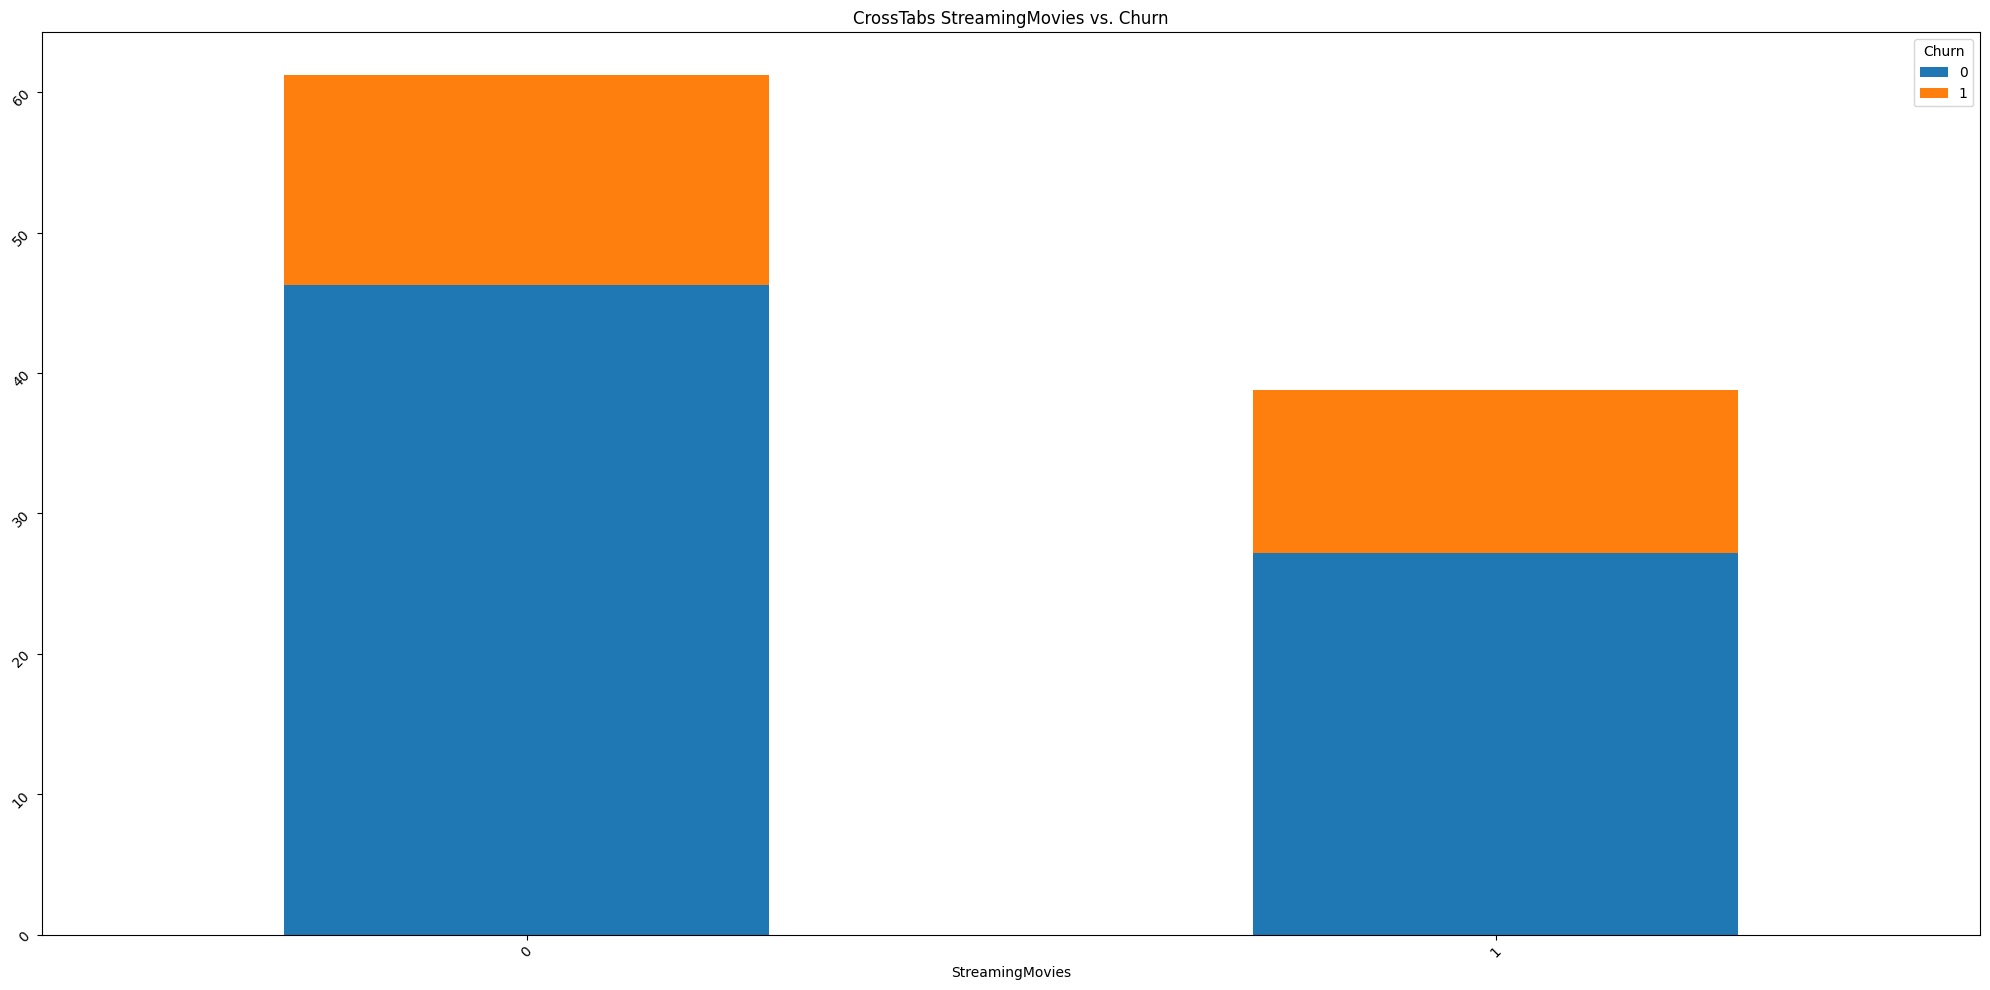

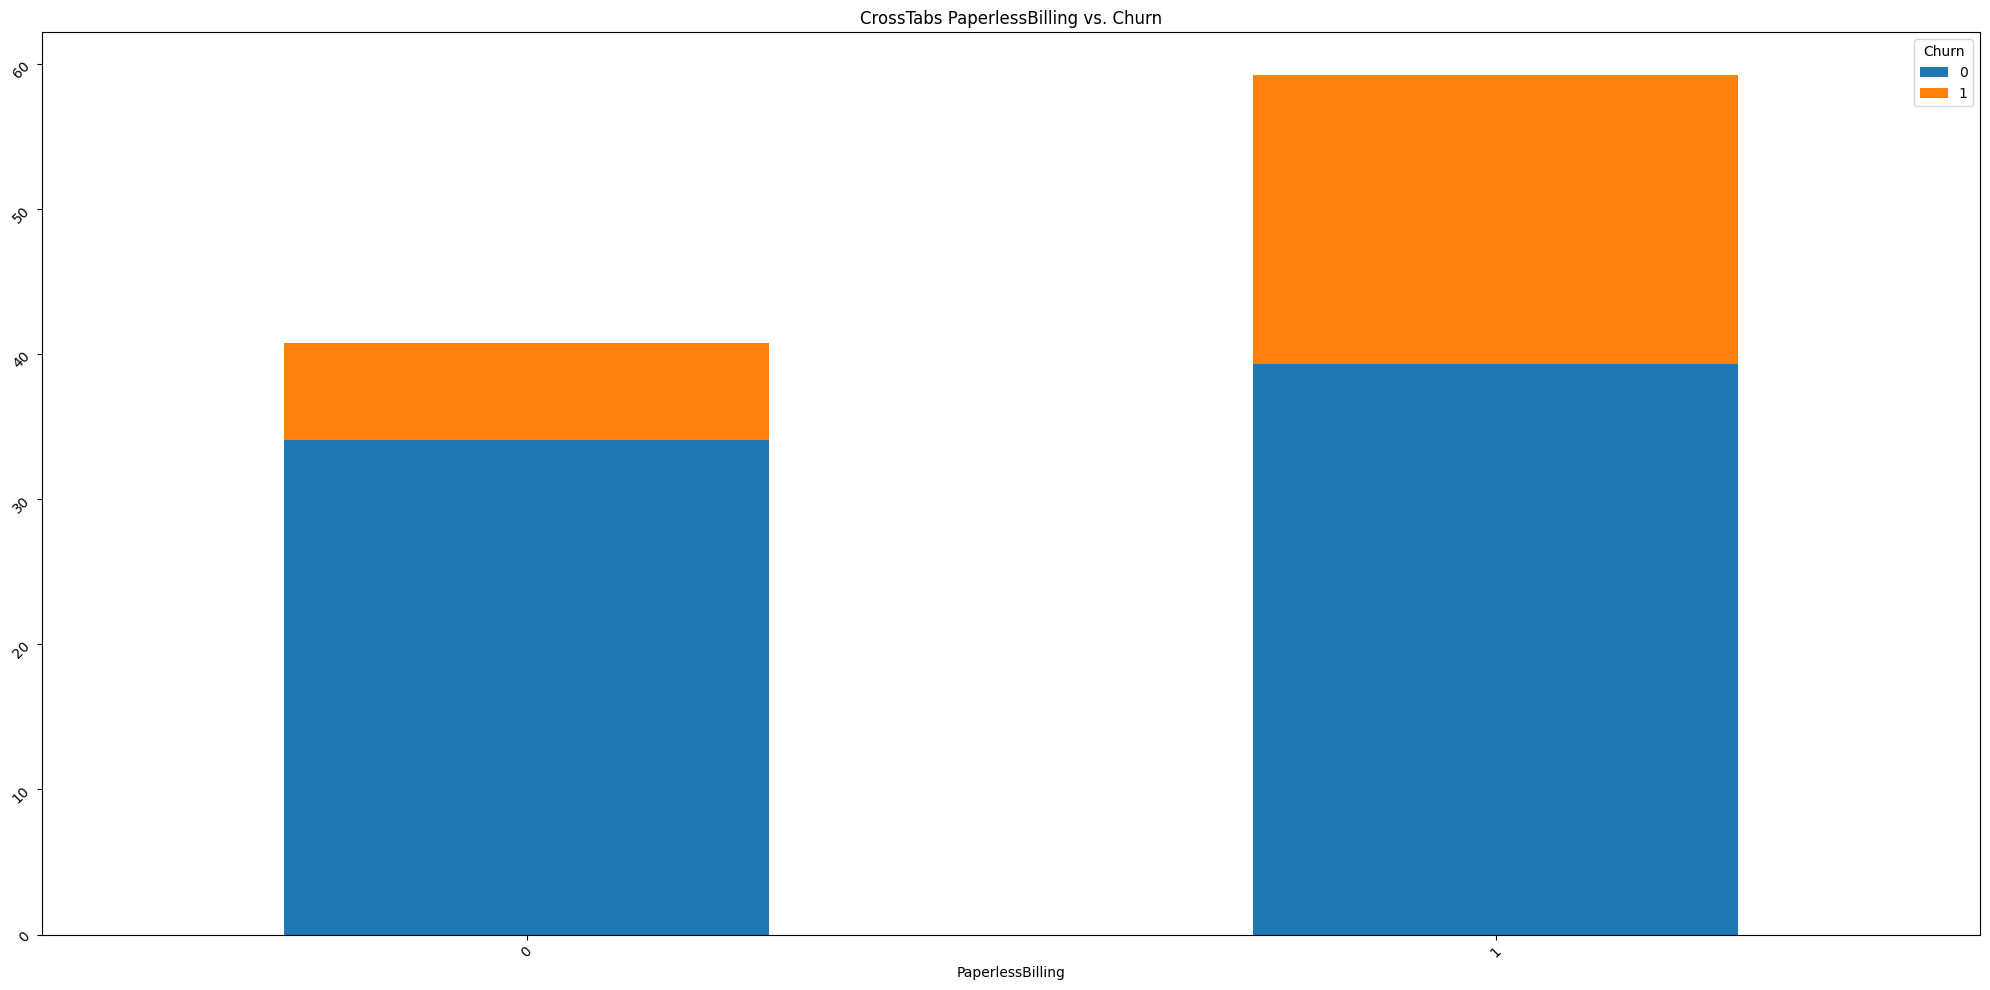

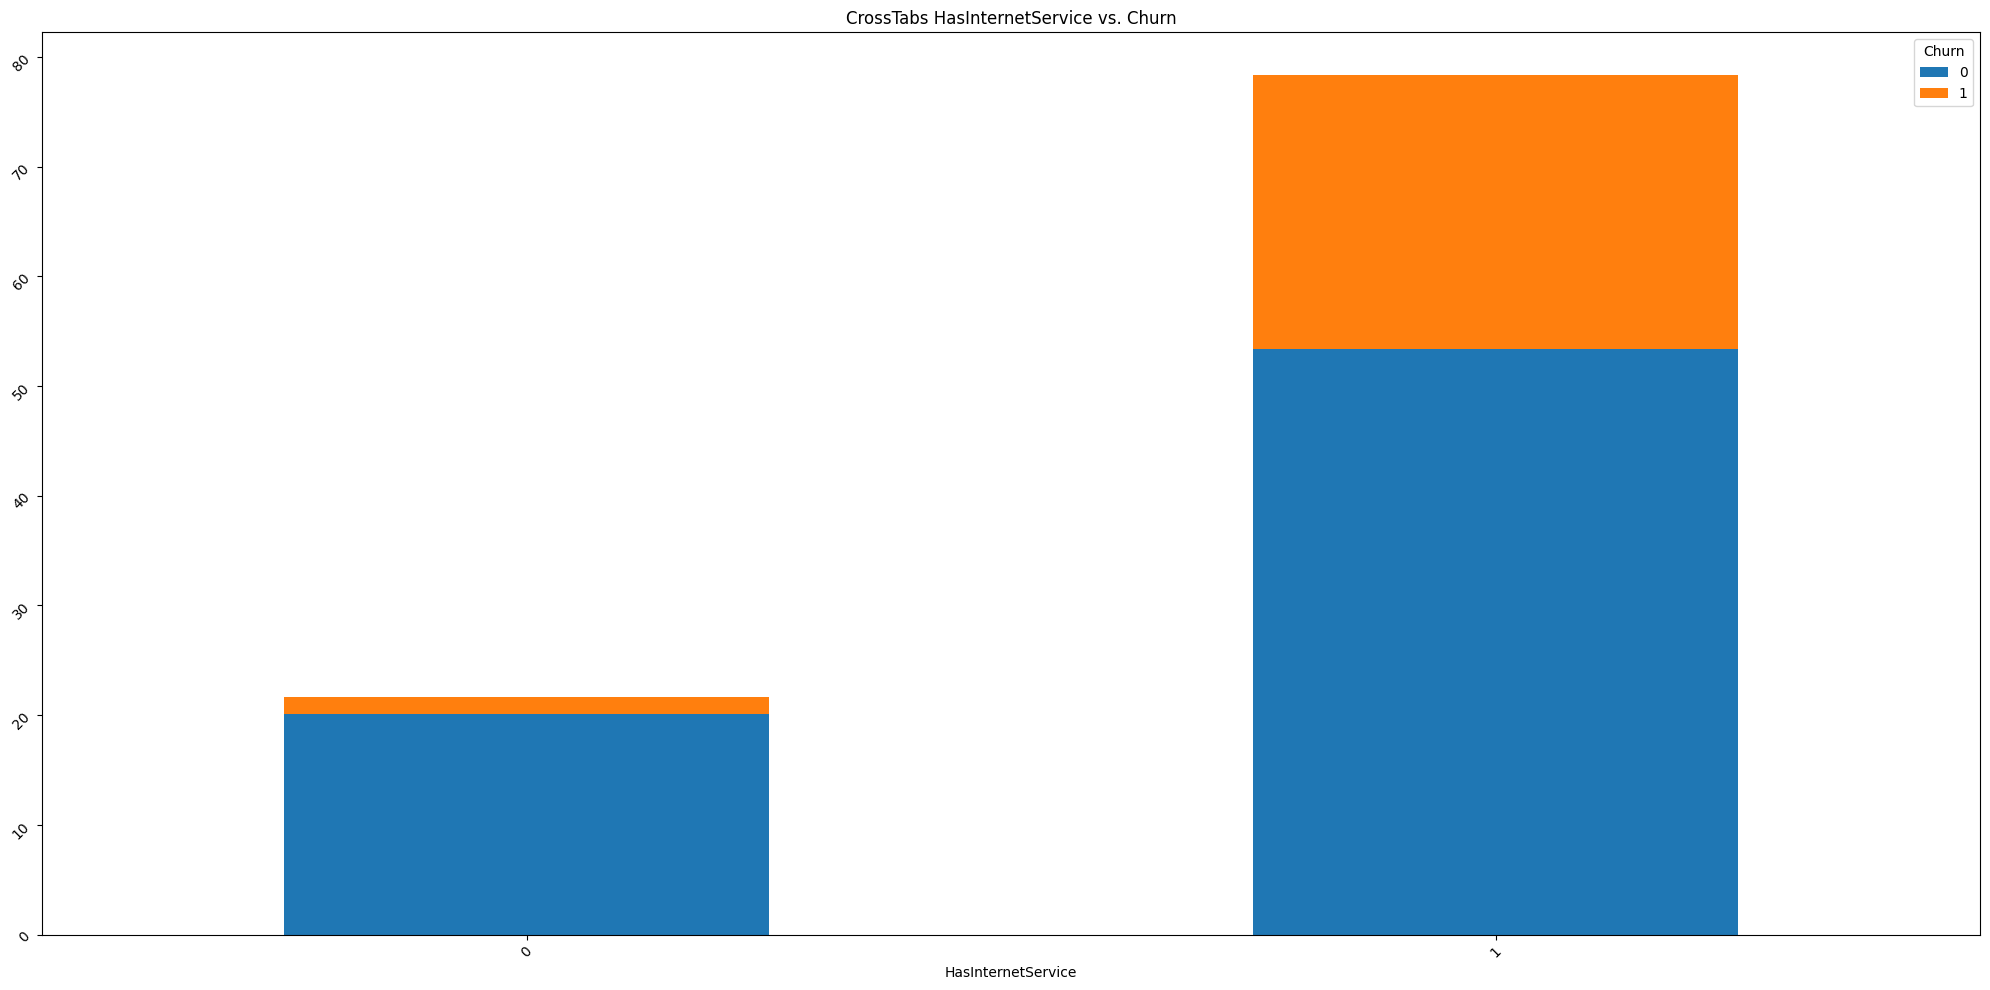

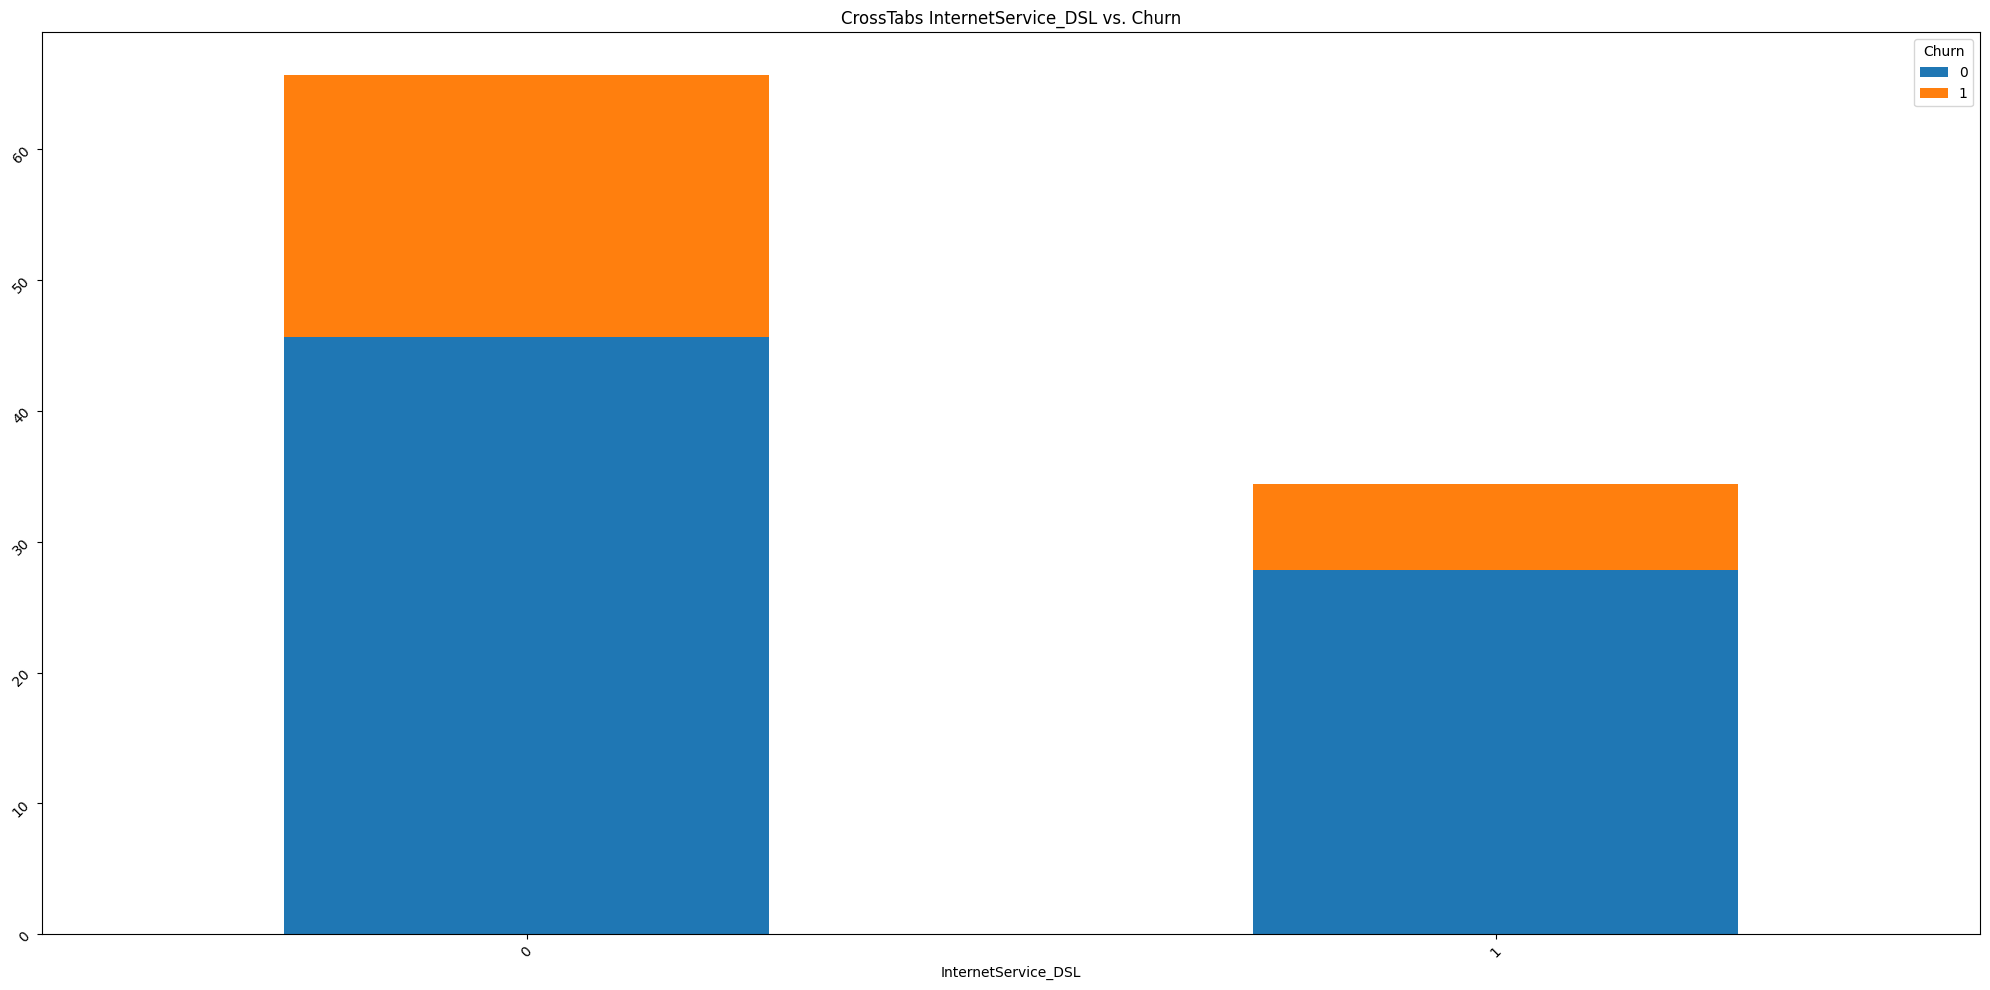

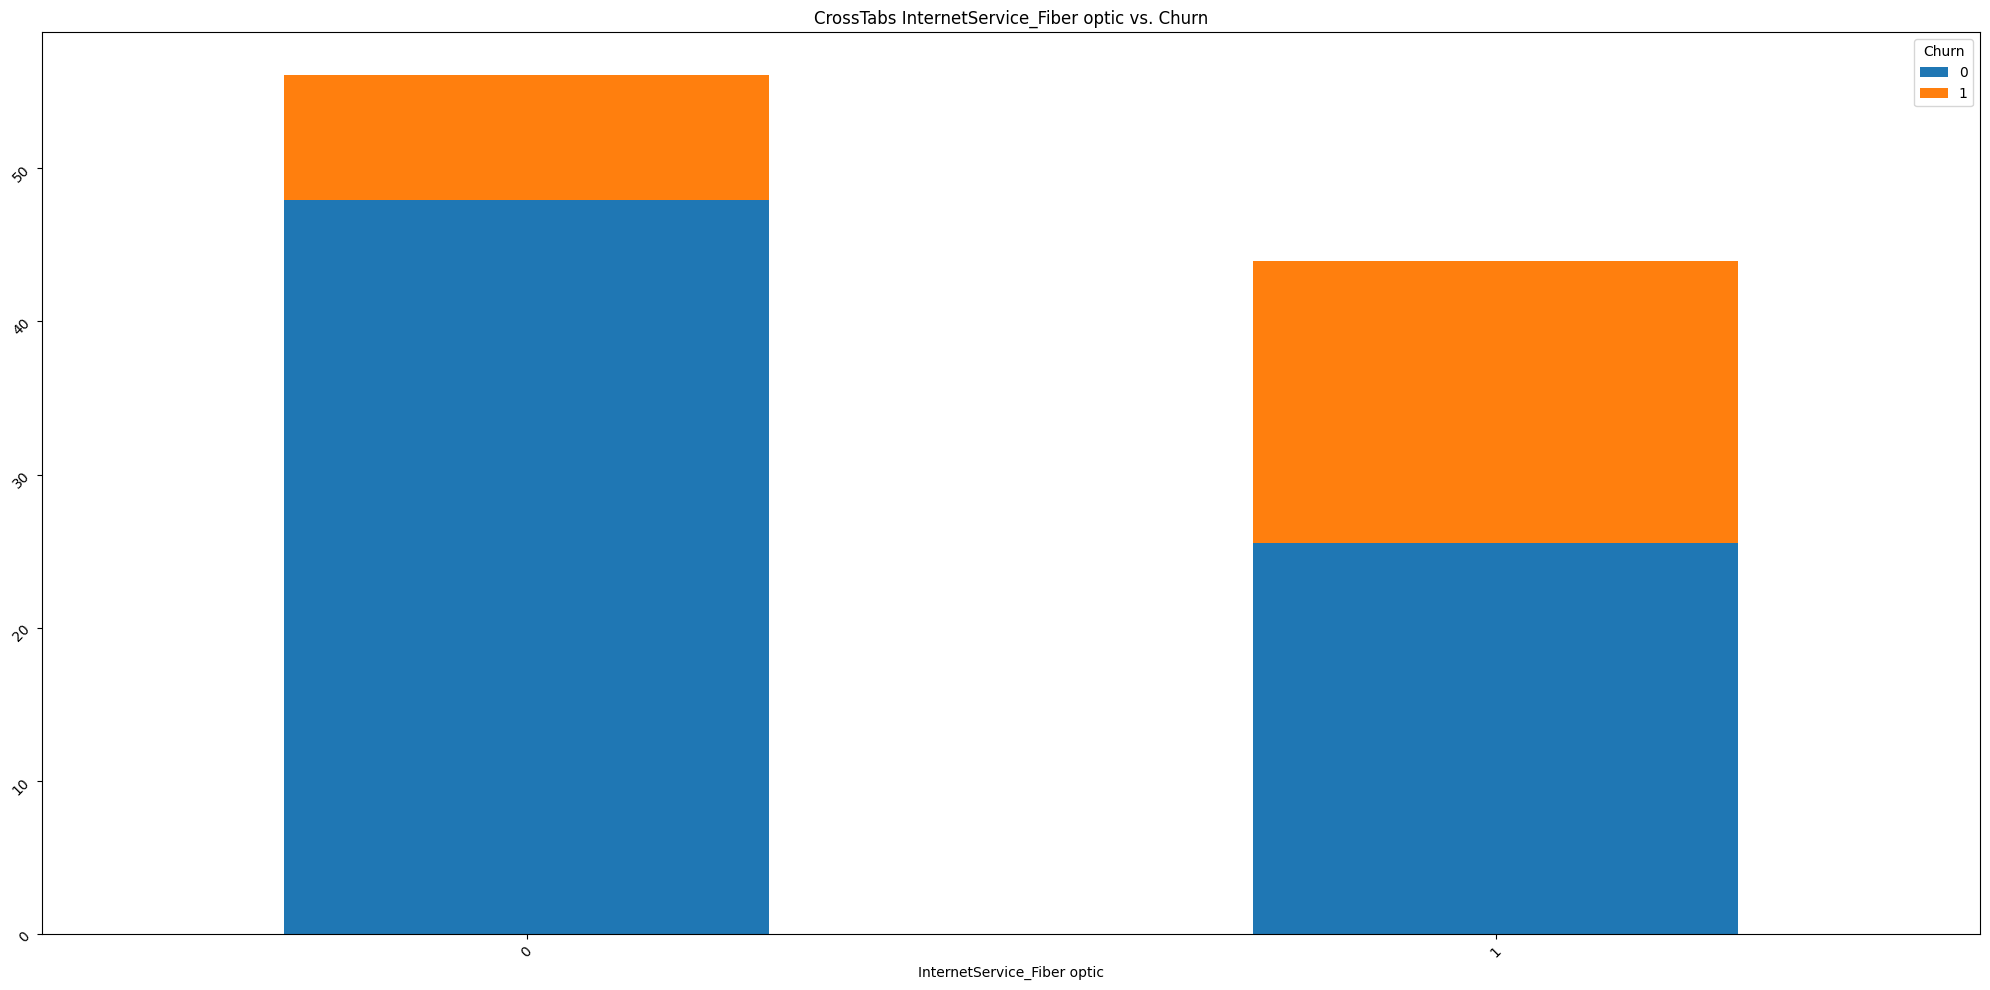

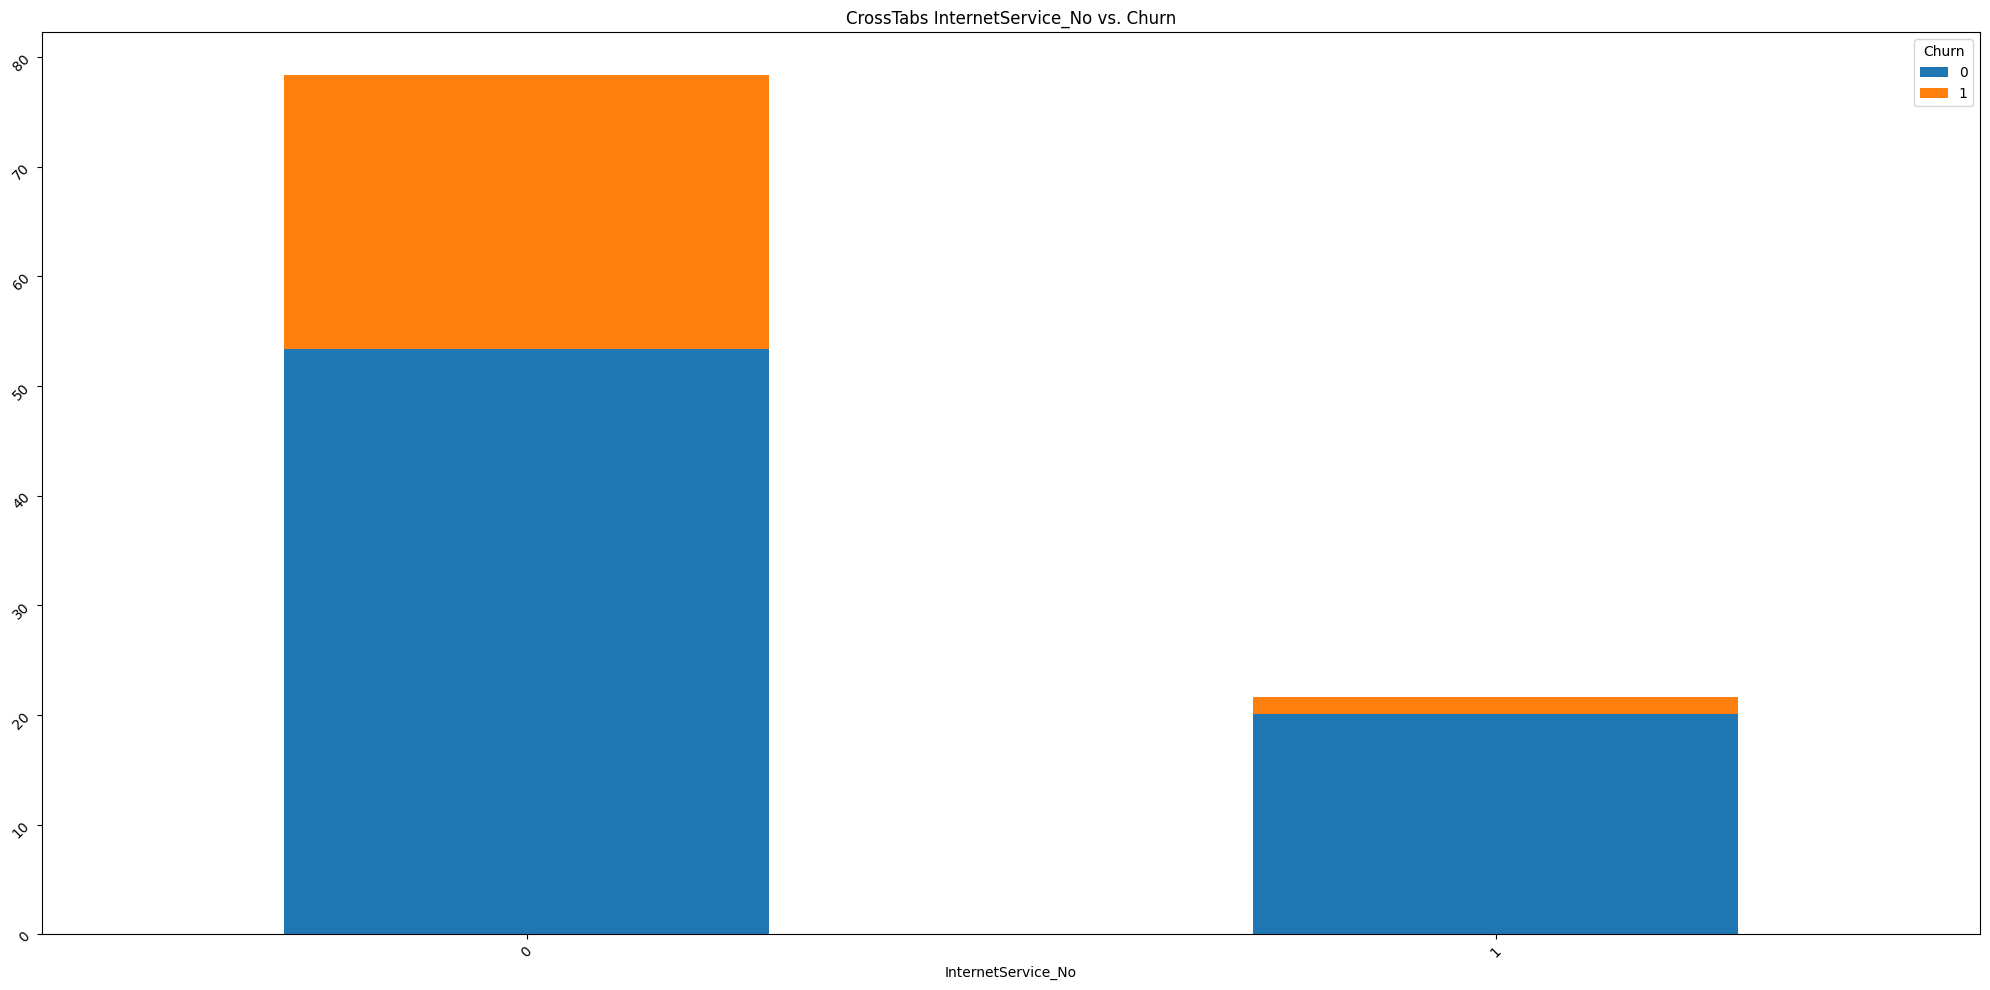

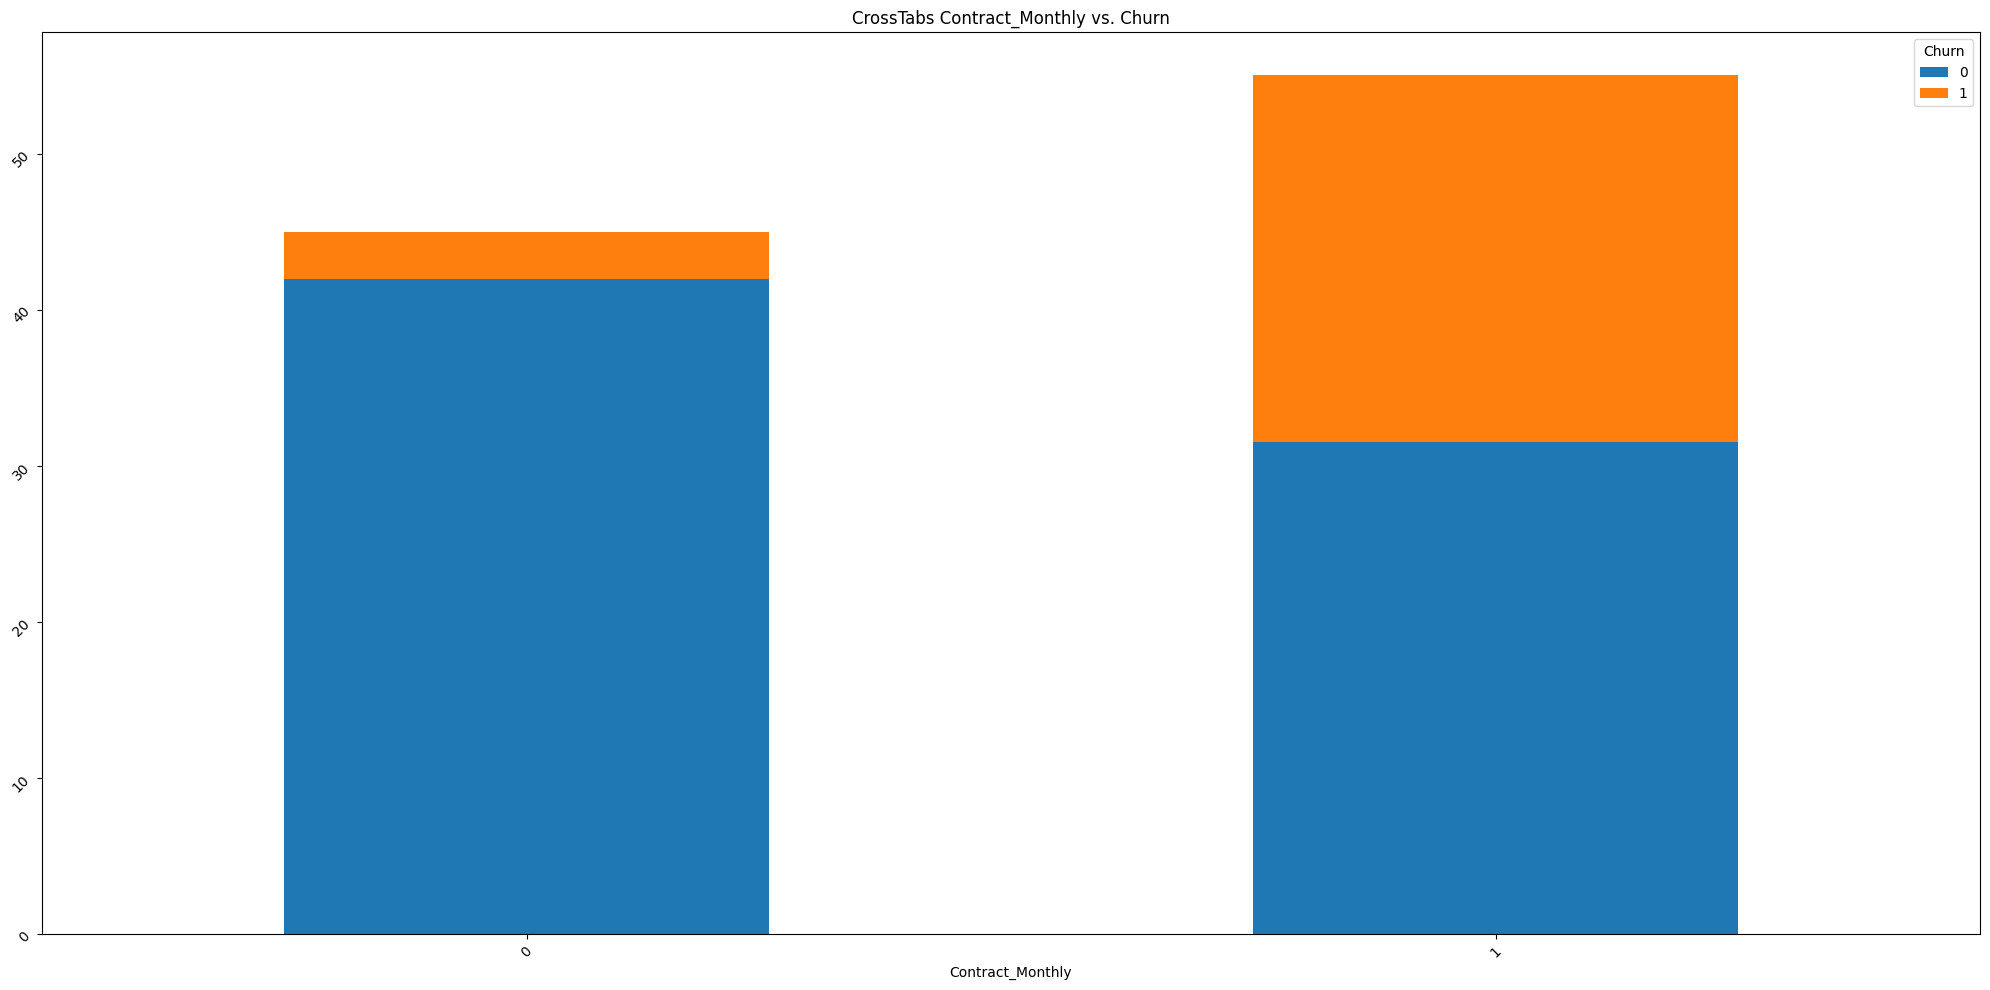

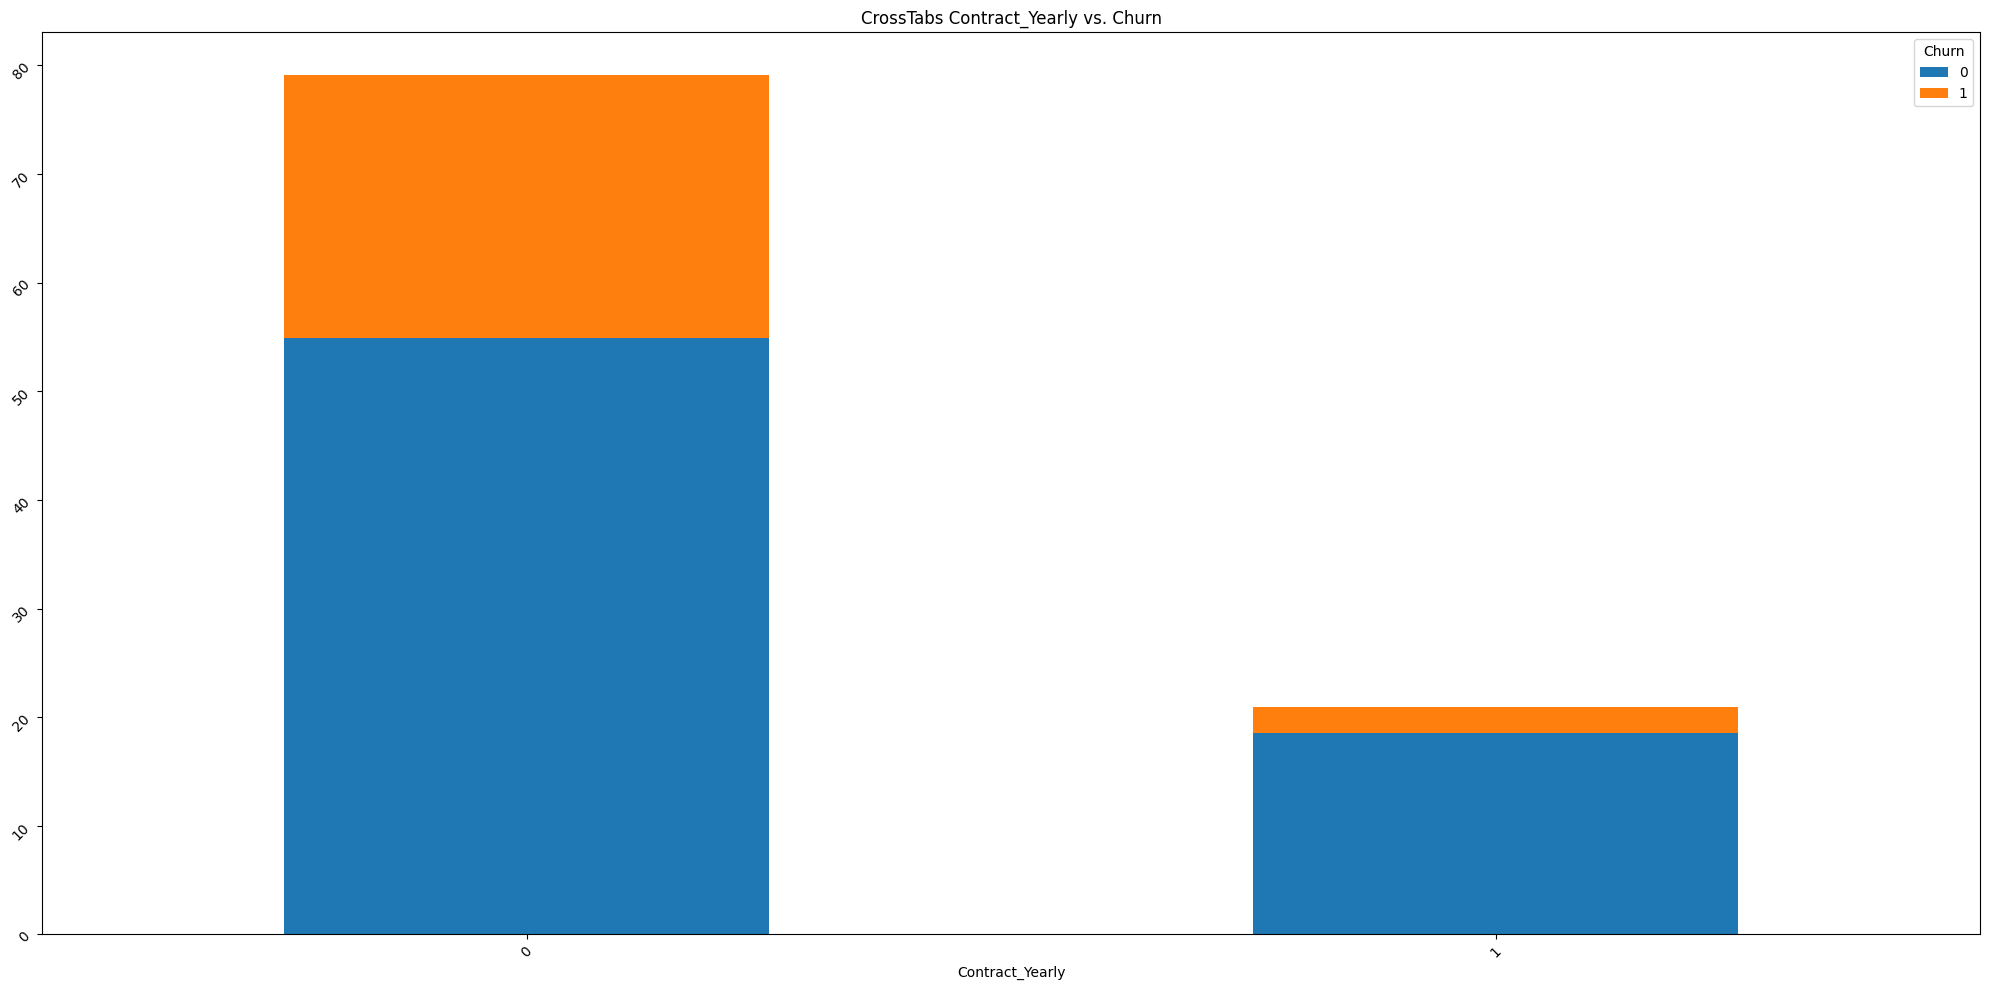

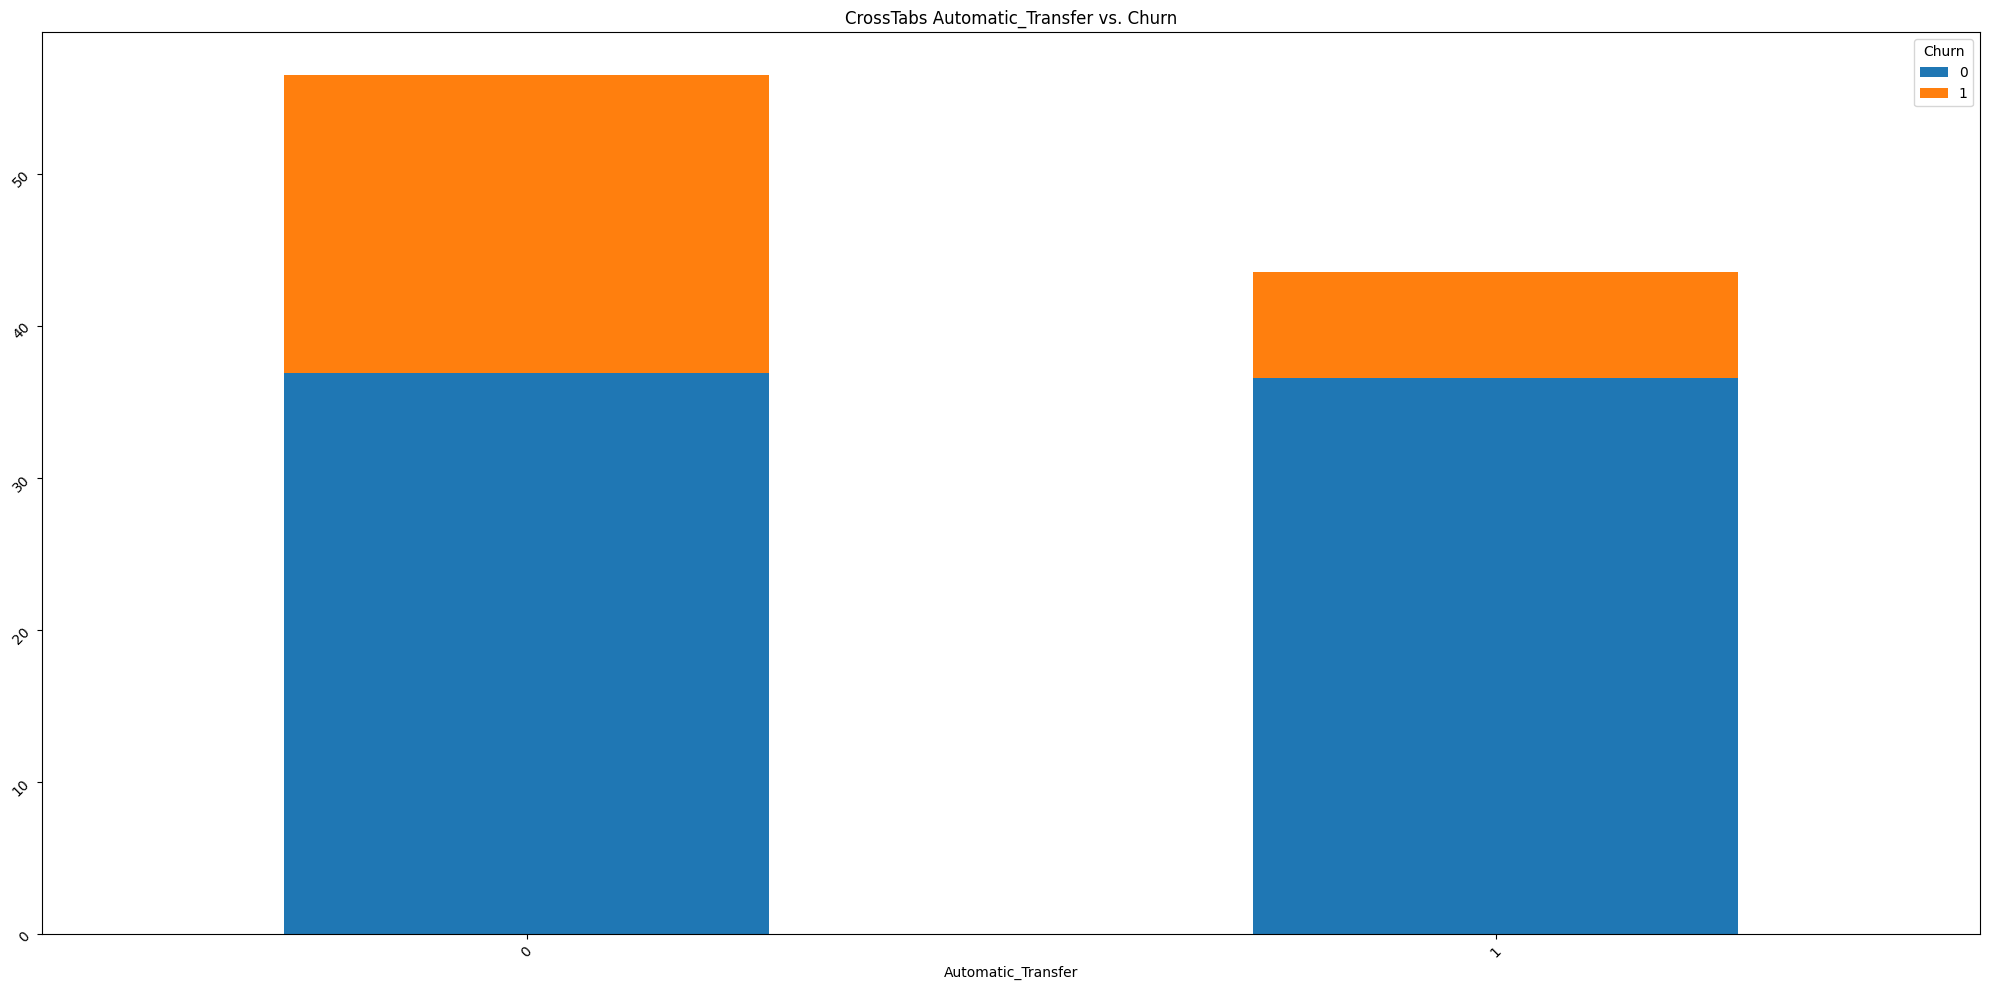

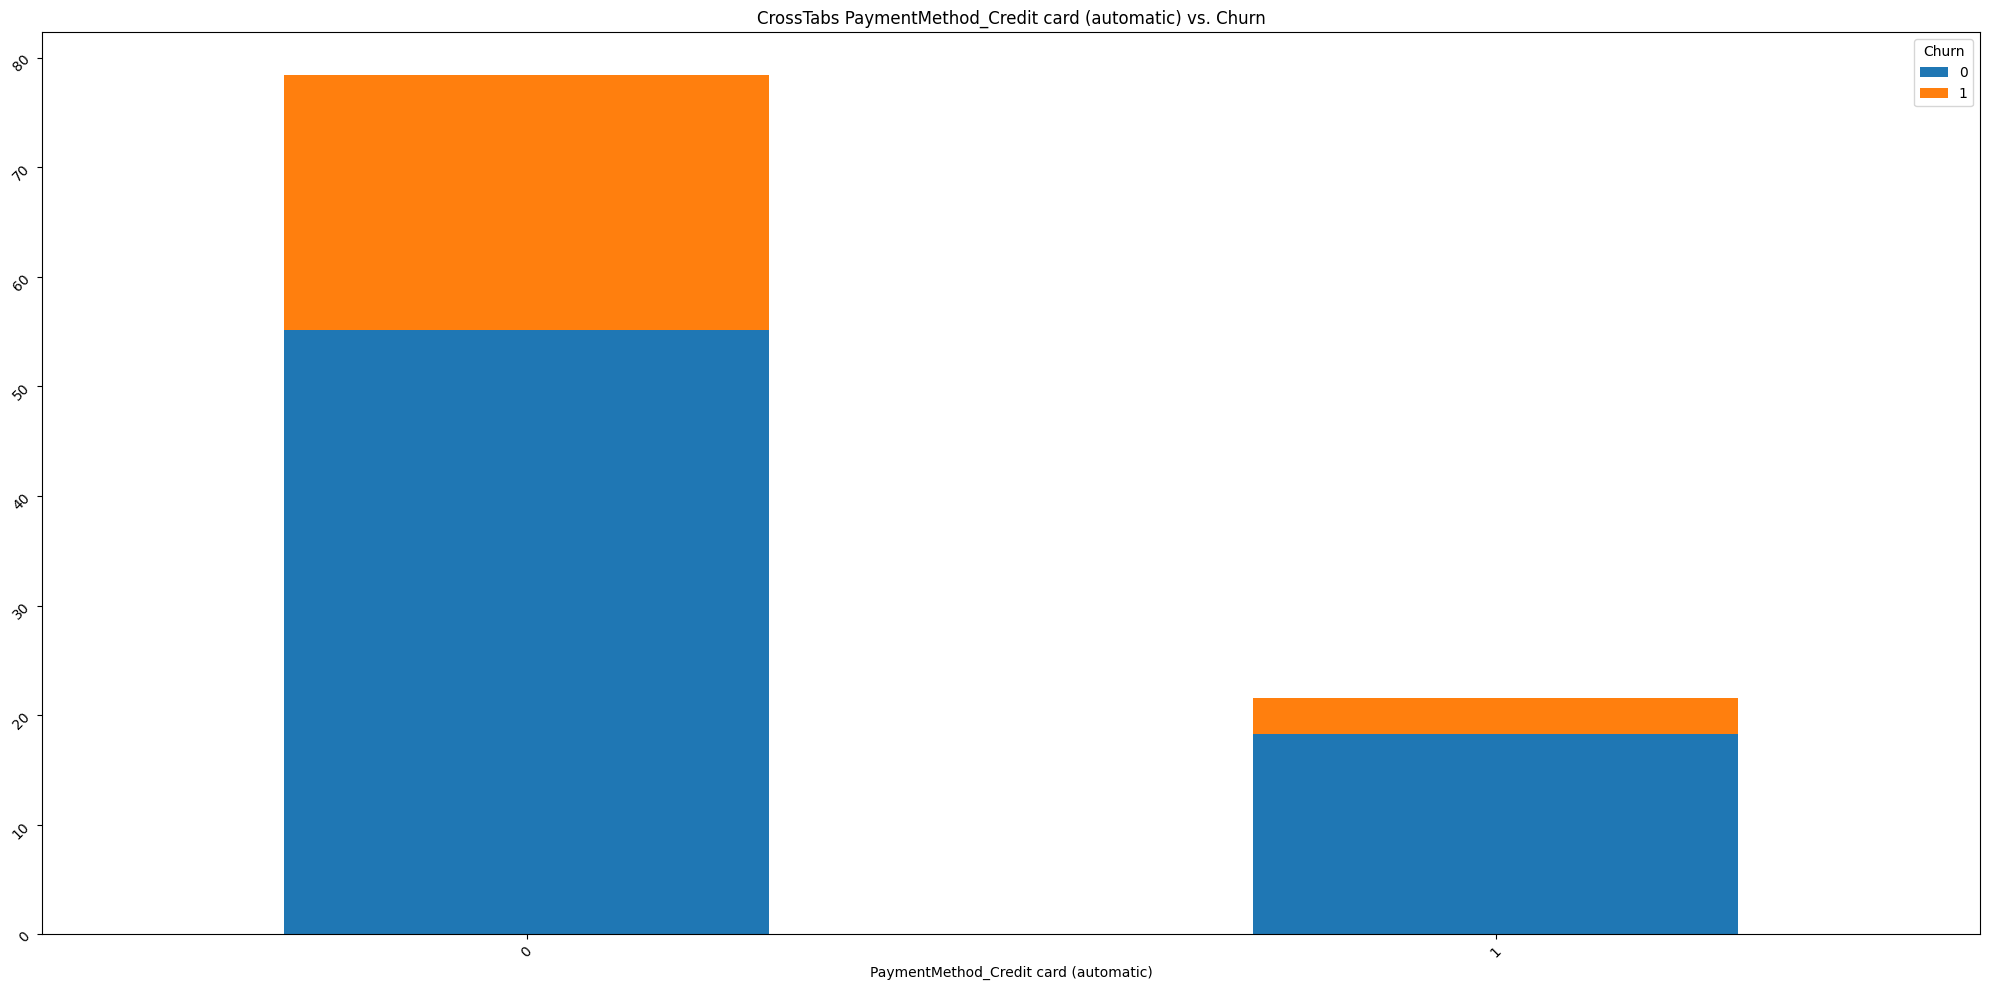

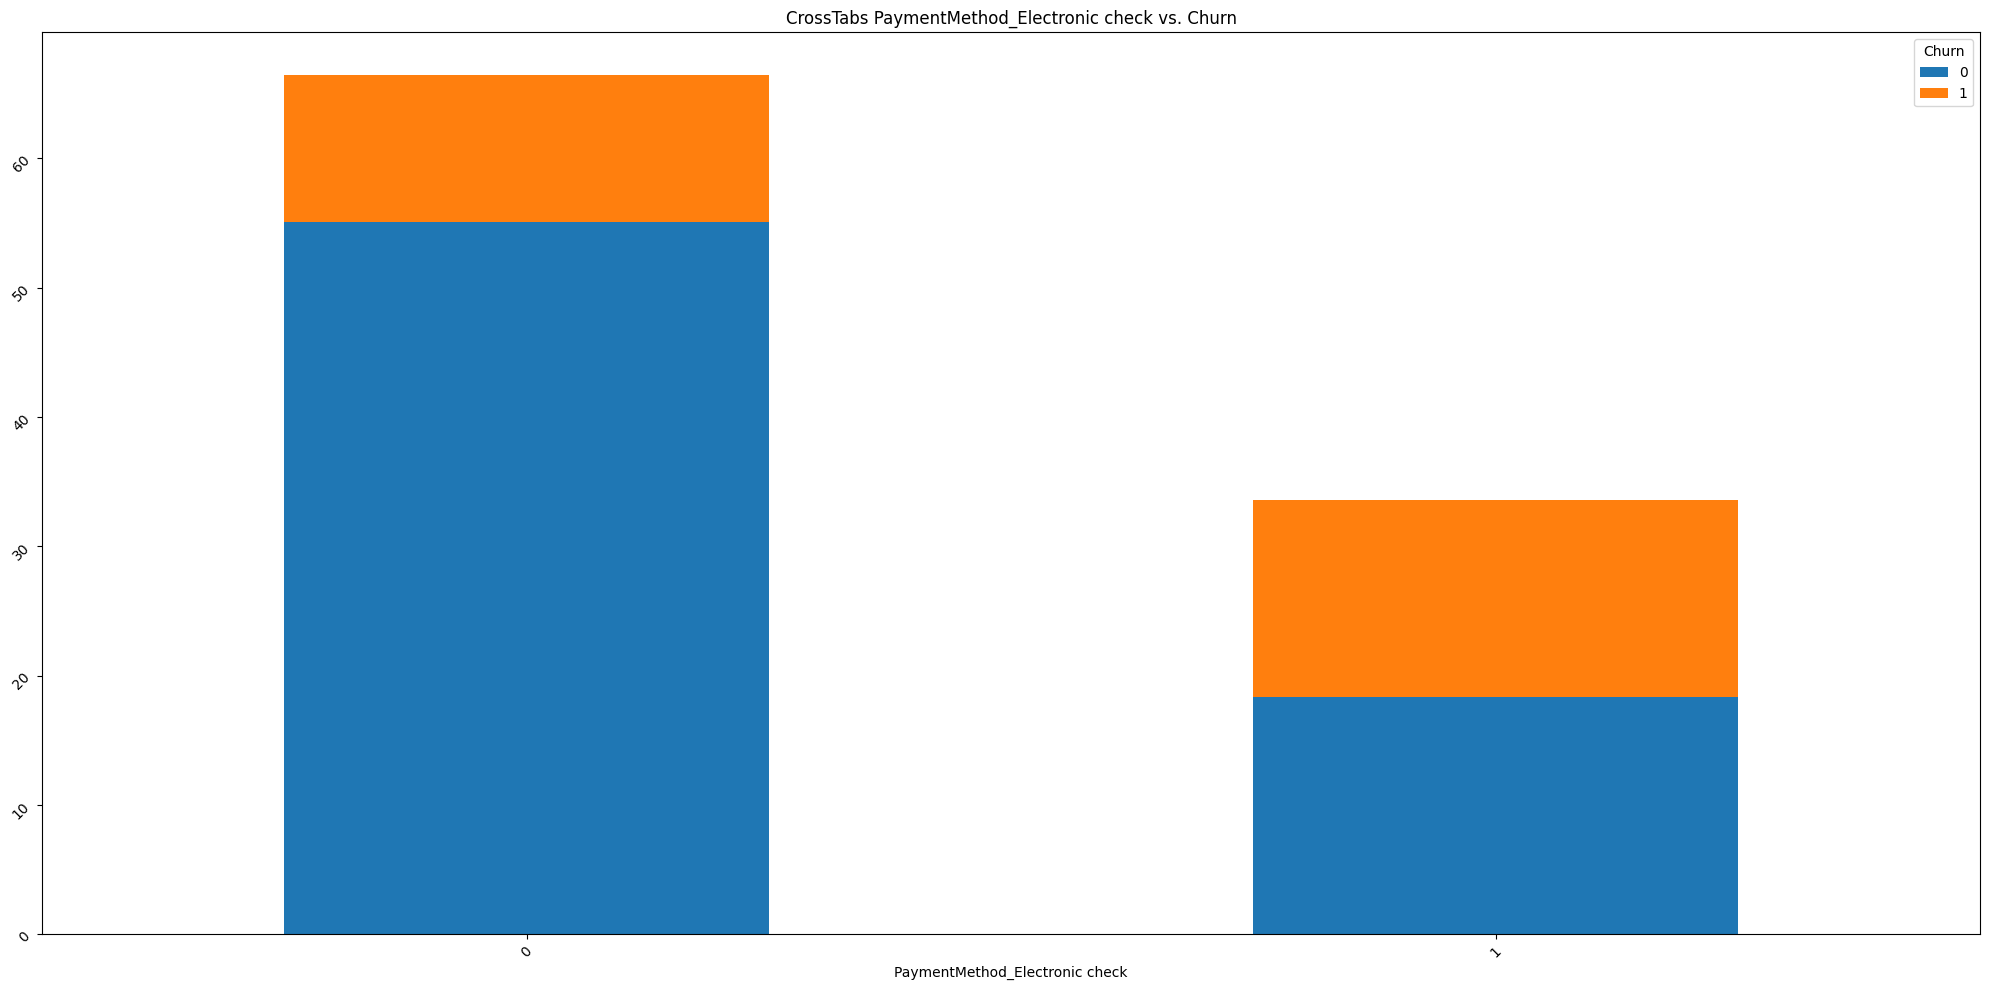

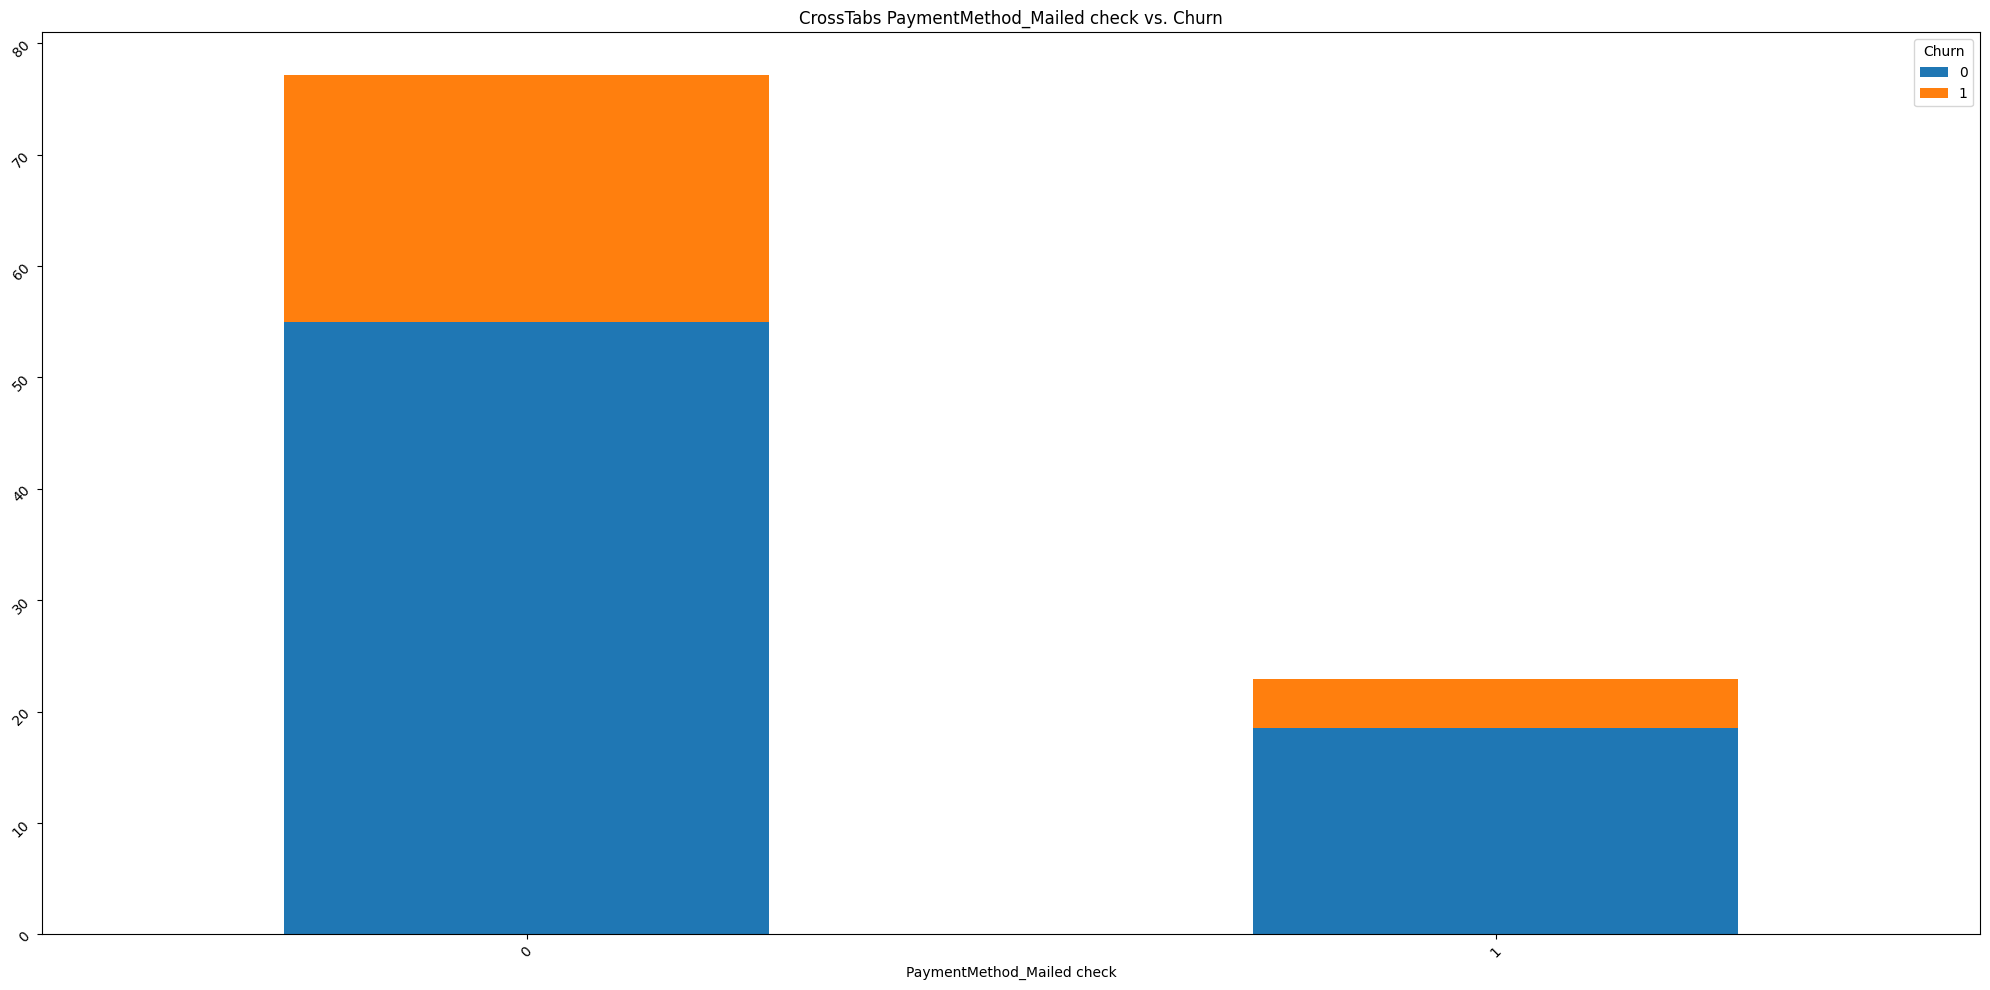

In [220]:
for cols in bools_cols:
    (pd.crosstab(df[cols], df['Churn'], normalize = True) * 100).plot(kind = 'bar', stacked = 'True', figsize = (20, 10))
    plt.title(f"CrossTabs {cols} vs. Churn")
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    plt.tight_layout()
    plt.show()

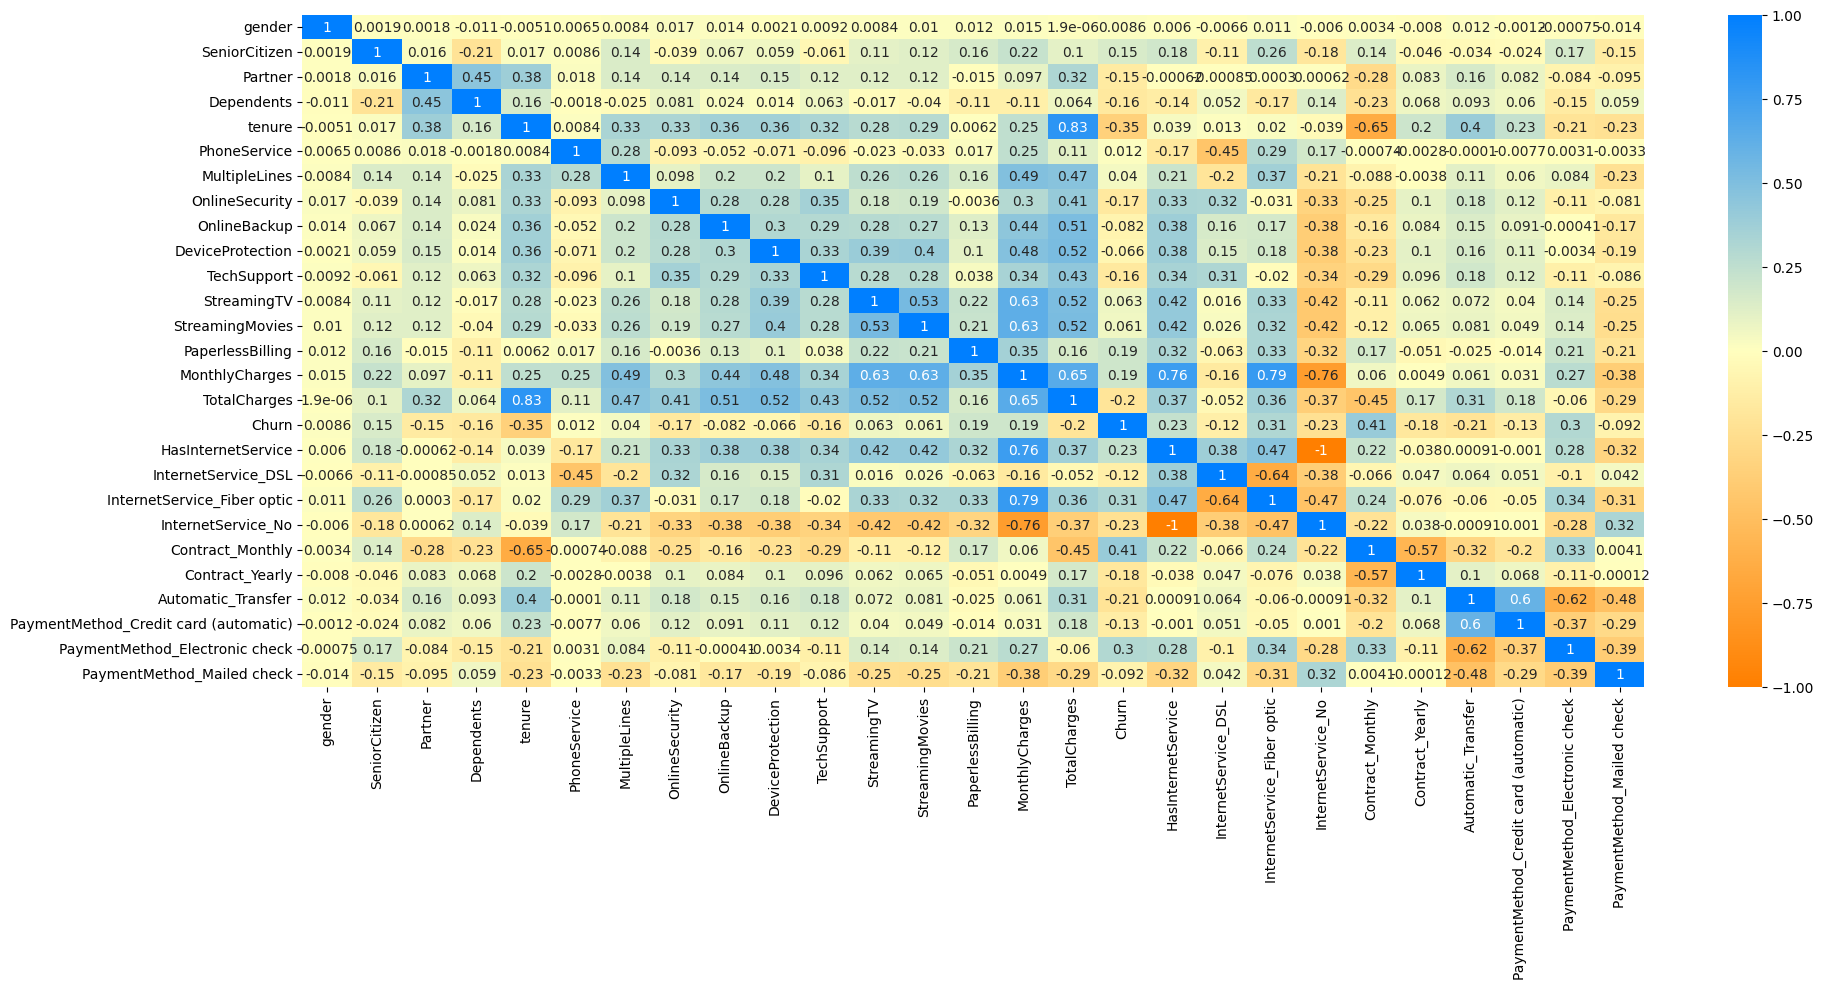

In [221]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list(
    name="orange_blue", 
    colors=["#FF7F00", "#FFFFBF", "#007FFF"]  # Orange, white, blue
)
corr = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True, cmap = custom_cmap)
plt.tight_layout()
plt.show()

In [222]:
pd.pivot_table(df, values='Churn', index='Contract_Monthly', columns= 'InternetService_Fiber optic', aggfunc='mean')

InternetService_Fiber optic,0,1
Contract_Monthly,,
0,0.035909,0.139463
1,0.282198,0.546053


In [223]:
'''
#Row Contract_Monthly=0 (Non-Monthly Contracts):

For customers without Fiber Optic (0), the churn rate is 0.0359 (~3.6%).

For customers with Fiber Optic (1), the churn rate increases to 0.1395 (~13.9%).

#Row Contract_Monthly=1 (Monthly Contracts):

For customers without Fiber Optic (0), the churn rate is 0.2822 (~28.2%).

For customers with Fiber Optic (1), the churn rate is even higher at 0.5461 (~54.6%).

'''

'\n#Row Contract_Monthly=0 (Non-Monthly Contracts):\n\nFor customers without Fiber Optic (0), the churn rate is 0.0359 (~3.6%).\n\nFor customers with Fiber Optic (1), the churn rate increases to 0.1395 (~13.9%).\n\n#Row Contract_Monthly=1 (Monthly Contracts):\n\nFor customers without Fiber Optic (0), the churn rate is 0.2822 (~28.2%).\n\nFor customers with Fiber Optic (1), the churn rate is even higher at 0.5461 (~54.6%).\n\n'

In [224]:
pd.pivot_table(df, values='Churn', index='SeniorCitizen', columns= 'PaymentMethod_Electronic check', aggfunc='mean')

PaymentMethod_Electronic check,0,1
SeniorCitizen,,
0,0.154722,0.425748
1,0.290146,0.533670


In [225]:
'''
For non-senior citizens (SeniorCitizen=0):

Customers not using electronic checks (PaymentMethod_Electronic check=0) have a churn rate of 0.1547 (~15.5%).

Customers using electronic checks (PaymentMethod_Electronic check=1) show a much higher churn rate of 0.4257 (~42.6%).

For senior citizens (SeniorCitizen=1):

Customers not using electronic checks (PaymentMethod_Electronic check=0) have a churn rate of 0.2901 (~29%).

Customers using electronic checks (PaymentMethod_Electronic check=1) show the highest churn rate at 0.5337 (~53.4%).

'''

'\nFor non-senior citizens (SeniorCitizen=0):\n\nCustomers not using electronic checks (PaymentMethod_Electronic check=0) have a churn rate of 0.1547 (~15.5%).\n\nCustomers using electronic checks (PaymentMethod_Electronic check=1) show a much higher churn rate of 0.4257 (~42.6%).\n\nFor senior citizens (SeniorCitizen=1):\n\nCustomers not using electronic checks (PaymentMethod_Electronic check=0) have a churn rate of 0.2901 (~29%).\n\nCustomers using electronic checks (PaymentMethod_Electronic check=1) show the highest churn rate at 0.5337 (~53.4%).\n\n'

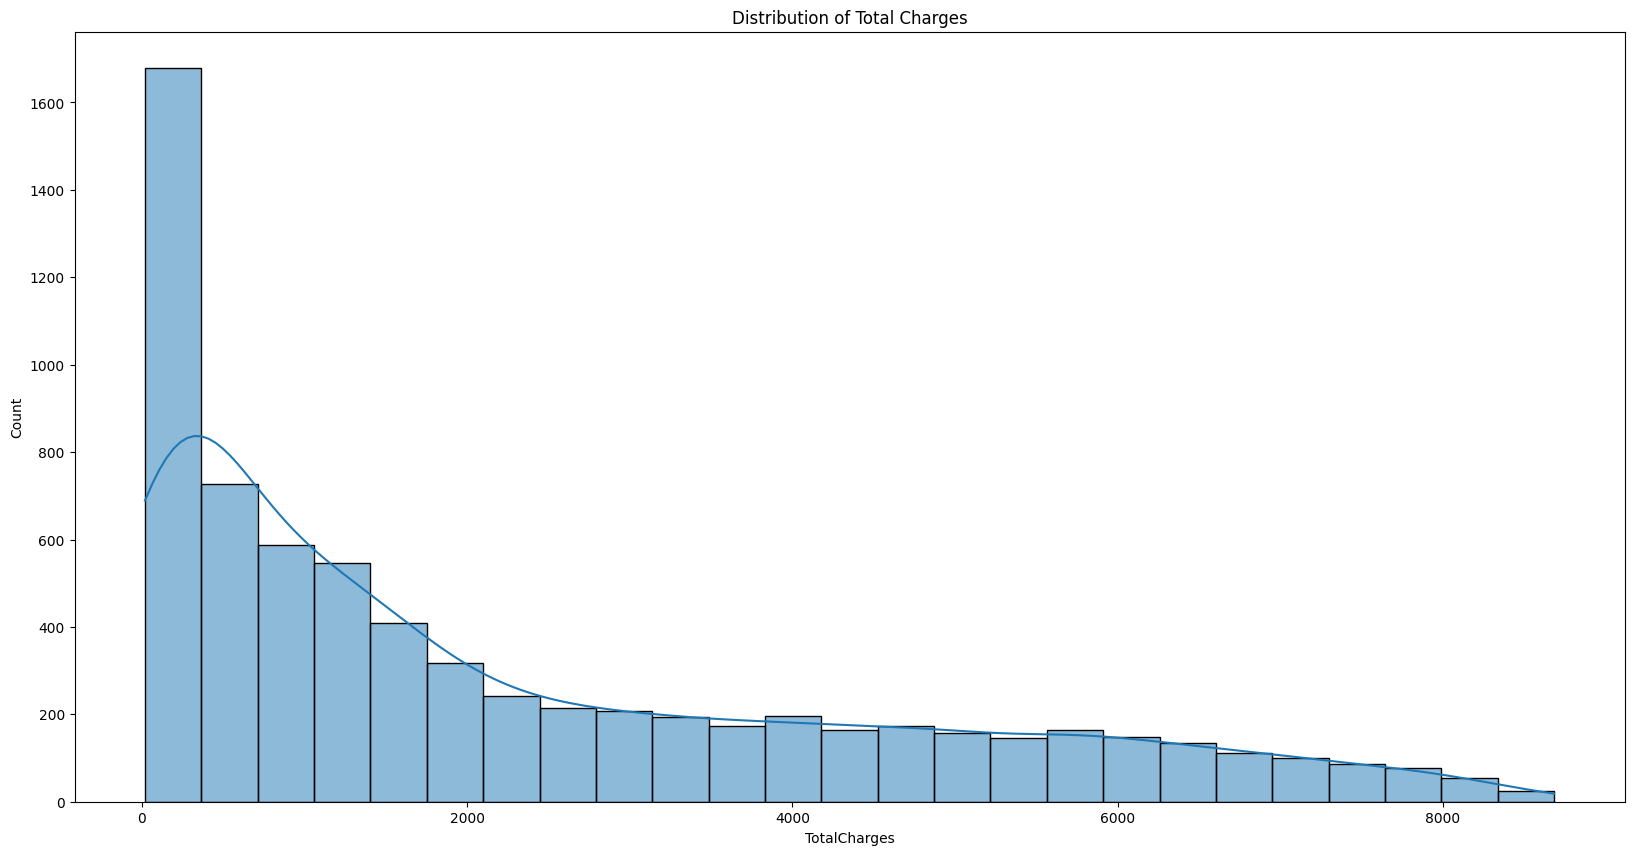

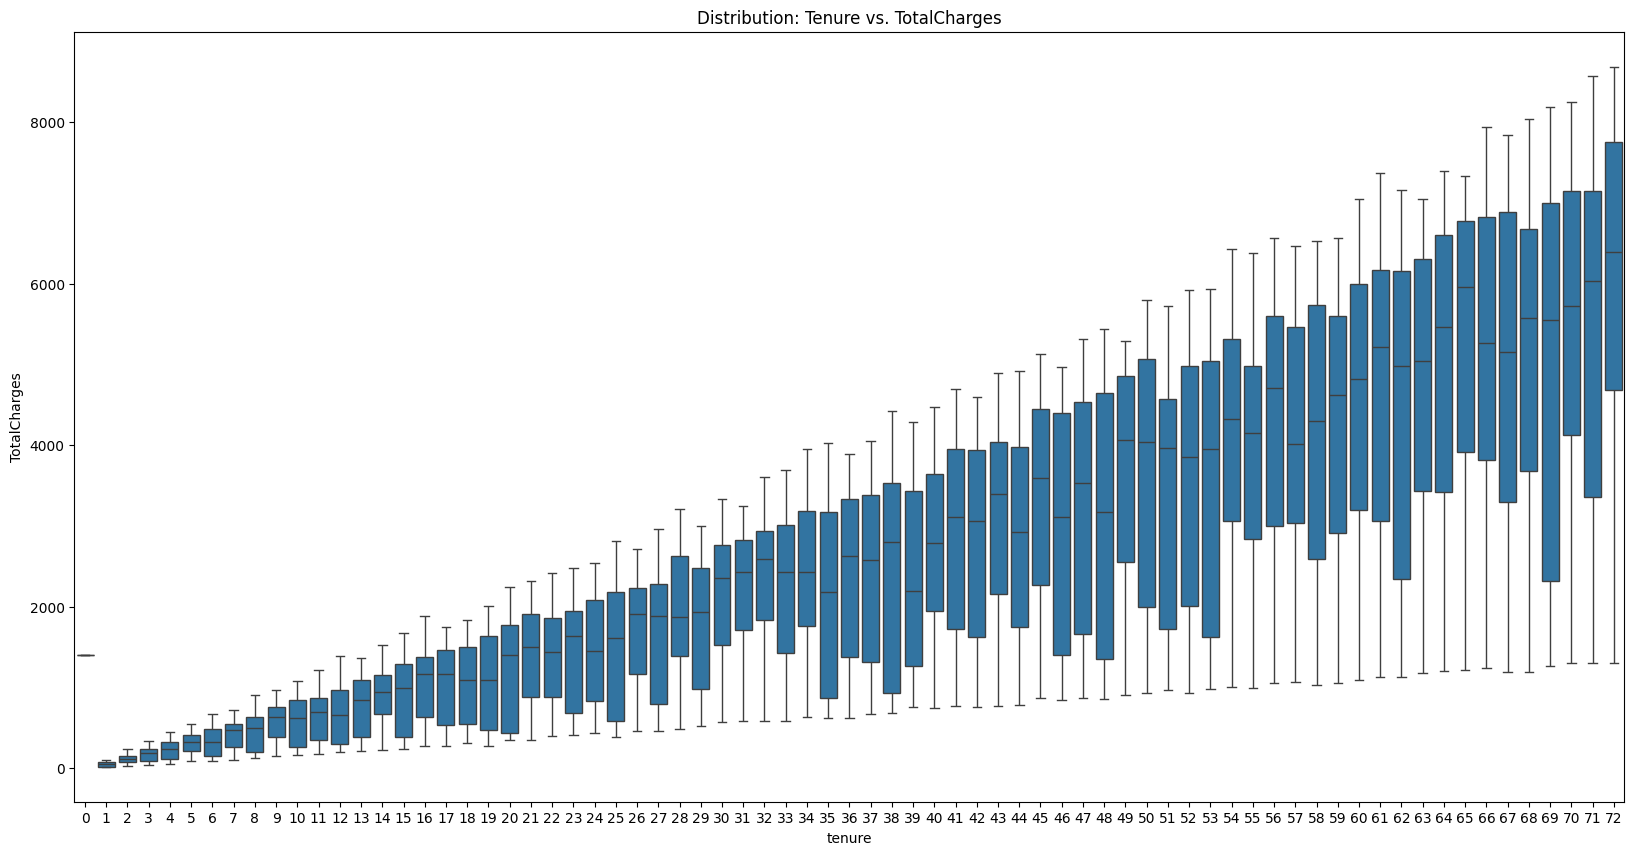

In [226]:
plt.figure(figsize = (20, 10))
sns.histplot(df['TotalCharges'], kde=True)
plt.title("Distribution of Total Charges")
plt.show()

plt.figure(figsize = (20, 10))
sns.boxplot(x = df['tenure'], y = df['TotalCharges'])
plt.title("Distribution: Tenure vs. TotalCharges")
plt.show()

In [227]:
df['TotalCharges'].skew()
df['tenure'].skew()

np.float64(0.2395397495619829)

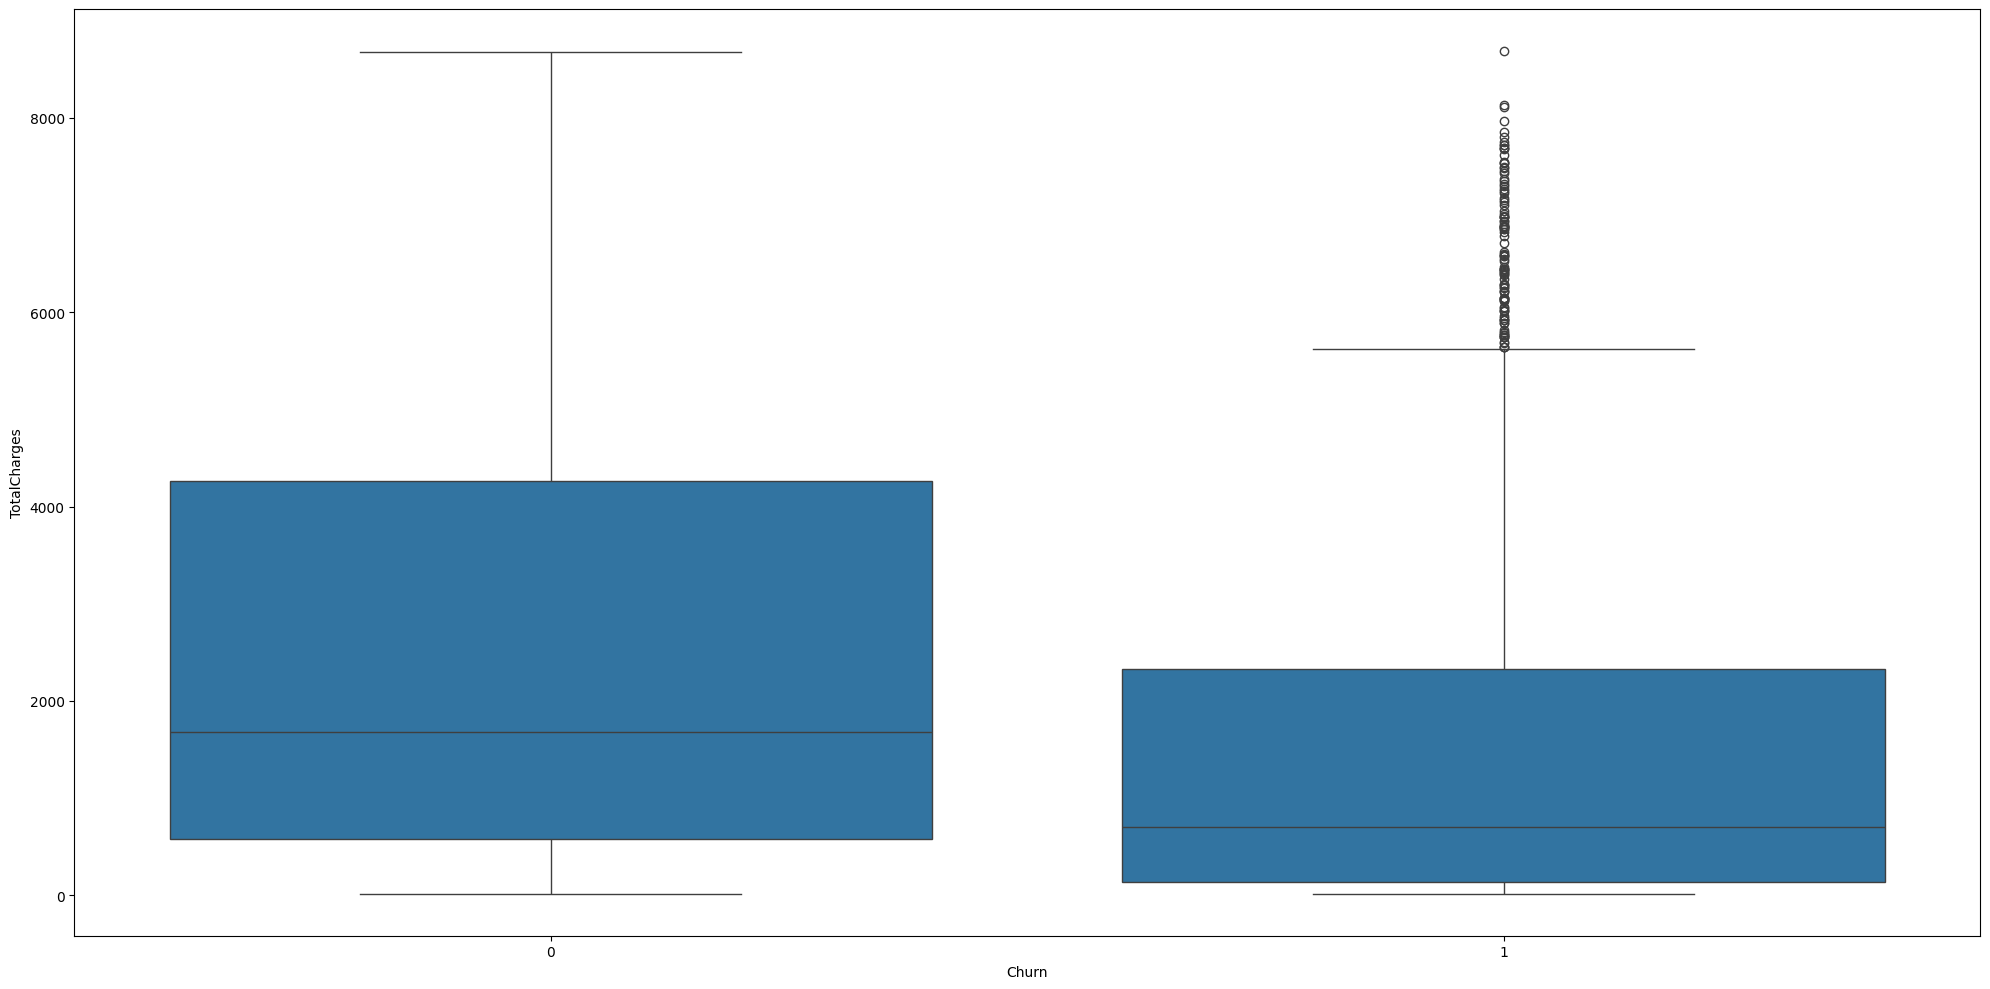

In [228]:
plt.figure(figsize = (20, 10))
sns.boxplot(y = df['TotalCharges'], x = df['Churn'])
plt.tight_layout()
plt.show()

In [229]:
'''
Churning Customers (on Average) don't pay that much, it's those who don't pay higher charges tend to stay with us.
It's possible that the churn customers don't necessarily believe in our products and don't really want to continue with us because of that.
'''

"\nChurning Customers (on Average) don't pay that much, it's those who don't pay higher charges tend to stay with us.\nIt's possible that the churn customers don't necessarily believe in our products and don't really want to continue with us because of that.\n"

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#Trying Logistic Regression

df['TotalCharges'] = df['TotalCharges'].clip(lower = df['TotalCharges'].quantile(0.01), upper = df['TotalCharges'].quantile(0.99))
df['TotalCharges'] = np.log1p(df['TotalCharges'])

scaler = StandardScaler()
df['TotalCharges_scaled'] = scaler.fit_transform(df[['TotalCharges']])


In [231]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

x_lr = df.drop(['Churn', 'TotalCharges'], axis = 1)
y_lr = df['Churn']
x = df.drop('Churn', axis = 1)
y = df['Churn']

x_temp_lr, x_test_lr, y_temp_lr, y_test_lr = train_test_split(x_lr, y_lr, random_state = 42, test_size = 0.25)
x_train_lr, x_val_lr, y_train_lr, y_val_lr = train_test_split(x_temp_lr, y_temp_lr, random_state = 42, test_size = 0.2)

smote_lr = SMOTE(random_state = 42)
x_train_res_lr, y_train_res_lr = smote_lr.fit_resample(x_train_lr, y_train_lr)

x_temp, x_test, y_temp, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, random_state = 42, test_size = 0.2)

smote = SMOTE(random_state = 42)
x_train_resampled_temp, y_train_resampled_temp = smote.fit_resample(x_train, y_train)

In [232]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

baseline_models = {
    'Random Forest': RandomForestClassifier(max_depth = 20, n_estimators = 20),
    'Decision Trees': DecisionTreeClassifier(max_depth = 20),
    'XGB': XGBClassifier(max_depth = 20),
    'CatBoost': CatBoostClassifier(),
    'Adaboost': AdaBoostClassifier() 
}

for name, model in baseline_models.items():
    model.fit(x_train_resampled_temp, y_train_resampled_temp)
    y_pred_temps = model.predict(x_train)
    accuracy = accuracy_score(y_train, y_pred_temps)
    cnfm = confusion_matrix(y_train, y_pred_temps)
    clsfs = classification_report(y_train, y_pred_temps)

    print("Name: ", model)
    print("Accuracy Score: ", accuracy)
    print("Confusion Score: ", cnfm)
    print("Classification Score: ", clsfs)

Name:  RandomForestClassifier(max_depth=20, n_estimators=20)
Accuracy Score:  0.989585798816568
Confusion Score:  [[3089   34]
 [  10 1092]]
Classification Score:                precision    recall  f1-score   support

           0       1.00      0.99      0.99      3123
           1       0.97      0.99      0.98      1102

    accuracy                           0.99      4225
   macro avg       0.98      0.99      0.99      4225
weighted avg       0.99      0.99      0.99      4225

Name:  DecisionTreeClassifier(max_depth=20)
Accuracy Score:  0.989112426035503
Confusion Score:  [[3084   39]
 [   7 1095]]
Classification Score:                precision    recall  f1-score   support

           0       1.00      0.99      0.99      3123
           1       0.97      0.99      0.98      1102

    accuracy                           0.99      4225
   macro avg       0.98      0.99      0.99      4225
weighted avg       0.99      0.99      0.99      4225

Name:  XGBClassifier(base_score=Non

In [233]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(x_train_res_lr, y_train_res_lr)
y_pred_lr = lr_model.predict(x_train_lr)

accuracy_lr = accuracy_score(y_train_lr, y_pred_lr)
cnfm_lr = confusion_matrix(y_train_lr, y_pred_lr)
clsfs_lr = classification_report(y_train_lr, y_pred_lr)

print('Accuracy Score: ', accuracy_lr)
print('Confusion Matrix: ', cnfm_lr)
print('Classification Report: ', clsfs_lr)

Accuracy Score:  0.7917159763313609
Confusion Matrix:  [[2657  466]
 [ 414  688]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.85      0.86      3123
           1       0.60      0.62      0.61      1102

    accuracy                           0.79      4225
   macro avg       0.73      0.74      0.73      4225
weighted avg       0.80      0.79      0.79      4225



In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define model
model = LogisticRegression(solver='liblinear', class_weight='balanced')

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid = GridSearchCV(model, param_grid, cv=skf, scoring='recall')  # Maximize recall
grid.fit(x_train_lr, y_train_lr)

print("Best Params:", grid.best_params_)
print("Best Recall:", grid.best_score_)

Best Params: {'C': 10, 'penalty': 'l1'}
Best Recall: 0.8021842863019334


In [247]:
from sklearn.model_selection import cross_val_predict
y_cv_proba = cross_val_predict(grid.best_estimator_, x_train, y_train, cv=skf, method='predict_proba')[:, 1]

In [249]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [1, 5, 10]
}

grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_rf, scoring = 'f1', n_jobs = -1, verbose = 0, cv = 5)
grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = param_grid_dt, scoring = 'f1', n_jobs = -1, verbose = 0, cv = 5)
grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = param_grid_xgb, scoring='f1', n_jobs = -1, verbose = 0, cv=5)

grid_rf.fit(x_train, y_train)
grid_dt.fit(x_train, y_train)
grid_xgb.fit(x_train, y_train)

best_rf = grid_rf.best_estimator_
best_df = grid_dt.best_estimator_
best_xgb = grid_xgb.best_estimator_

In [251]:
print(grid_rf.best_params_)
print(grid_dt.best_params_)
print(grid_xgb.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
{'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.6}


In [253]:
print(best_rf)
print(best_df)
print(best_xgb)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=500)
DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)


In [255]:
print(grid_rf.best_score_)
print(grid_dt.best_score_)
print(grid_xgb.best_score_)

0.5700186728780237
0.5477673105007892
0.6080749975427084


In [257]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score
from sklearn.base import clone

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

f1s = []
accuracy = []
recall = []

for train_idx, val_idx in skf.split(x_train, y_train):
    x_fold_train, y_fold_train = x_train.iloc[train_idx], y_train.iloc[train_idx]
    x_fold_val, y_fold_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
    smote = SMOTE(random_state = 42)
    x_resampled, y_resampled = smote.fit_resample(x_fold_train, y_fold_train)

    model = clone(best_xgb)
    model.fit(x_resampled, y_resampled)

    preds = model.predict(x_fold_val)
    f1_s = f1_score(y_fold_val, preds)
    accus = accuracy_score(y_fold_val, preds)
    recs = recall_score(y_fold_val, preds)
    f1s.append(f1_s)
    accuracy.append(accus)
    recall.append(recs)

print("Average F-1 Score: ", np.mean(f1s))
print("Average Accuracy Score: ", np.mean(accuracy))
print("Average Recall: ", np.mean(recall))
print("Accuracy scores for each fold:", accuracy)
print("Recall scores for each fold:", recall)
print("F-1 Score for each fold: ", f1s)

Average F-1 Score:  0.5963605742605352
Average Accuracy Score:  0.714792899408284
Average Recall:  0.8076347182229535
Accuracy scores for each fold: [0.714792899408284, 0.714792899408284, 0.7289940828402367, 0.714792899408284, 0.7005917159763314]
Recall scores for each fold: [0.8144796380090498, 0.7873303167420814, 0.8272727272727273, 0.7954545454545454, 0.8136363636363636]
F-1 Score for each fold:  [0.5990016638935108, 0.5908319185059423, 0.6138279932546374, 0.5922165820642978, 0.5859247135842881]


In [259]:
y_proba = model.predict_proba(x_train)[:, 1]
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
f1s = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    score = f1_score(y_train, y_pred)
    f1s.append(score)

best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]
best_f1 = f1s[best_idx]

print(f'Best threshold: {best_threshold:.2f}')
print(f'Best F1 Score: {best_f1:.4f}')

Best threshold: 0.70
Best F1 Score: 0.7957


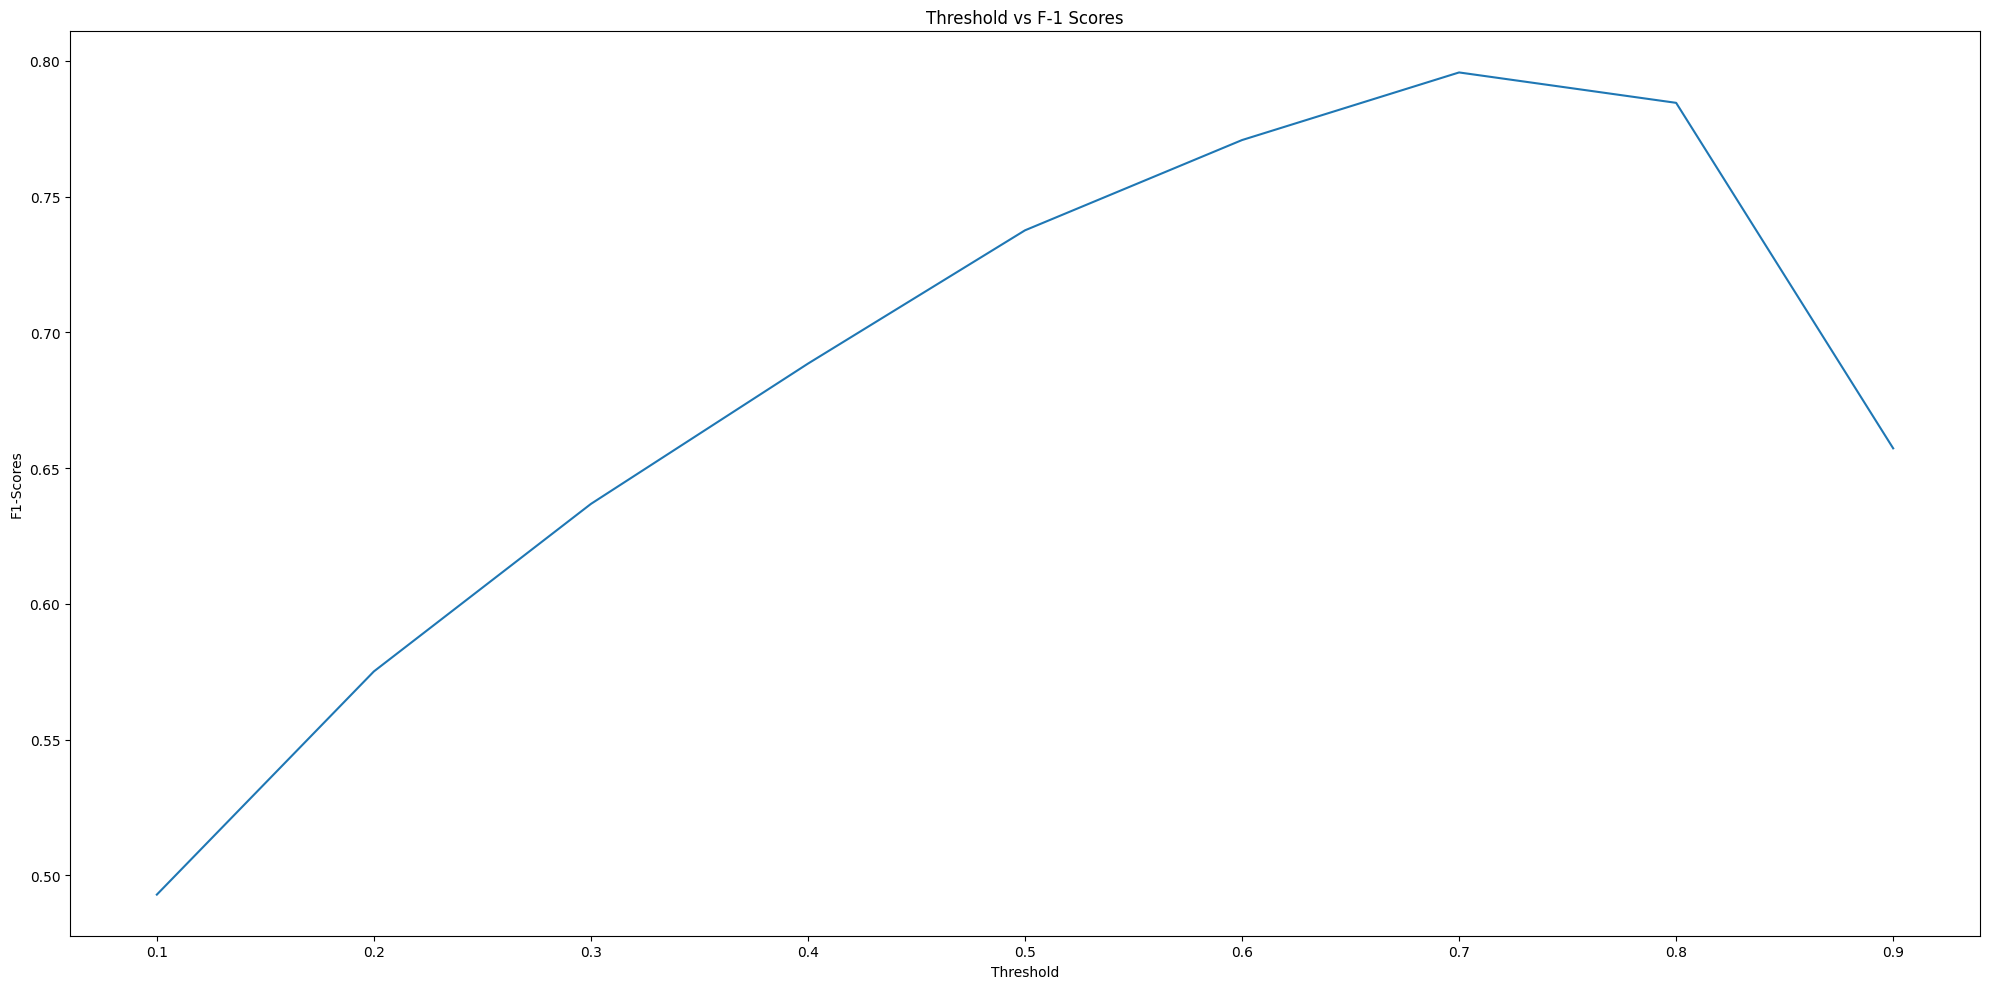

In [261]:
plt.figure(figsize = (20, 10))
plt.plot(thresholds, f1s)
plt.xlabel("Threshold")
plt.ylabel("F1-Scores")
plt.title("Threshold vs F-1 Scores")
plt.tight_layout()
plt.show()

In [263]:
print("Threshold = 0.5")
print(classification_report(y_train, (y_proba >= 0.5).astype(int)))

print("Threshold = 0.7")
print(classification_report(y_train, (y_proba >= 0.7).astype(int)))

Threshold = 0.5
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      3123
           1       0.60      0.96      0.74      1102

    accuracy                           0.82      4225
   macro avg       0.79      0.87      0.80      4225
weighted avg       0.88      0.82      0.83      4225

Threshold = 0.7
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3123
           1       0.71      0.91      0.80      1102

    accuracy                           0.88      4225
   macro avg       0.84      0.89      0.85      4225
weighted avg       0.90      0.88      0.88      4225



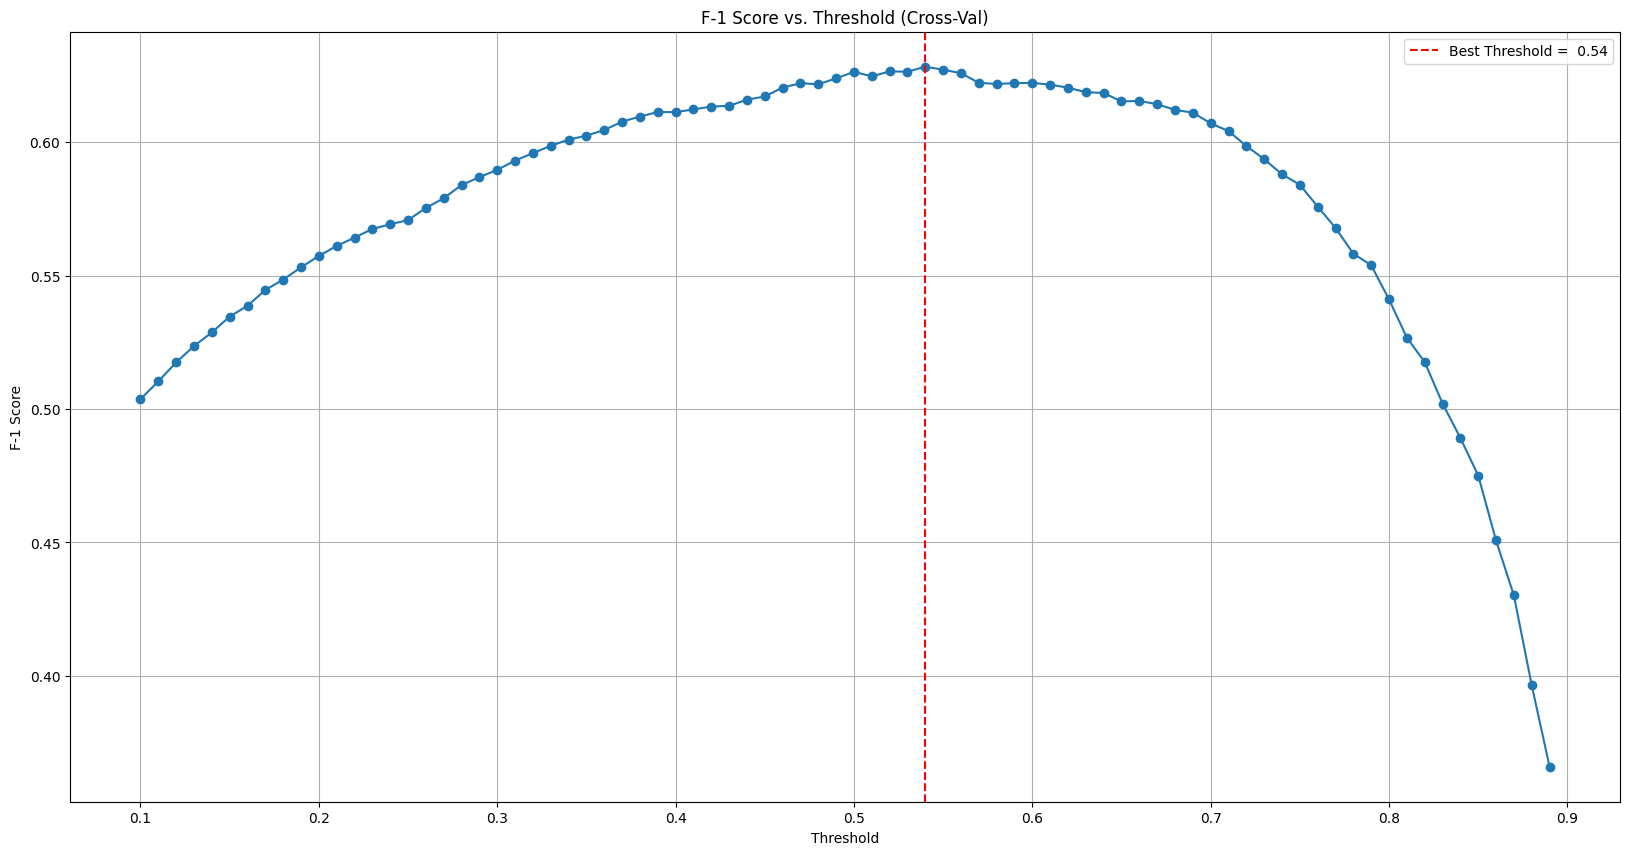

Best Threshold:  0.5399999999999998
Best F1 0.6282022722209847


In [265]:


model = best_xgb
y_cv_proba = cross_val_predict(model, x, y, cv=5, method = 'predict_proba')[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
f1s = []

for t in thresholds:
    y_pred = (y_cv_proba >= t).astype(int)
    f1s.append(f1_score(y, y_pred))
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]
best_f1 = f1s[best_idx]

plt.figure(figsize = (20, 10))
plt.plot(thresholds, f1s, marker = 'o')
plt.axvline(best_threshold, color = 'red', linestyle = '--', label = f'Best Threshold = {best_threshold: .2f}')
plt.title("F-1 Score vs. Threshold (Cross-Val)")
plt.xlabel("Threshold")
plt.ylabel("F-1 Score")
plt.grid(True)
plt.legend()
plt.show()

print("Best Threshold: ", best_threshold)
print("Best F1", best_f1)
y_pred = (model.predict_proba(x)[:, 1] >= 0.55).astype(int)

In [267]:
y_cv_pred = (y_cv_proba >= best_threshold).astype(int)
print(classification_report(y, y_cv_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      5174
           1       0.54      0.75      0.63      1869

    accuracy                           0.76      7043
   macro avg       0.72      0.76      0.73      7043
weighted avg       0.80      0.76      0.77      7043



In [327]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
import numpy as np

# Define your feature and label sets
X = x_train_lr.reset_index(drop=True)
Y = y_train_lr.reset_index(drop=True)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)
model = LogisticRegression(C=10, penalty='l1', solver='liblinear')

probas = np.zeros(len(Y))  # This will store the OOF probs

for train_idx, val_idx in skf.split(X, Y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    Y_train, Y_val = Y.iloc[train_idx], Y.iloc[val_idx]

    # Apply SMOTE to training folds only
    X_res, Y_res = smote.fit_resample(X_train, Y_train)

    model.fit(X_res, Y_res)

    # Predict on the current fold's val set
    probas[val_idx] = model.predict_proba(X_val)[:, 1]  # Store correctly

# Now probas[] holds CV-based predicted probs for all training samples

# Tune threshold for best recall
thresholds = np.arange(0.3, 0.9, 0.01)
f1s = [f1_score(Y, (probas >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(recalls)]
best_f1s = max(f1s)

print(f"✅ Best Threshold: {best_threshold:.2f}")
print(f"🎯 Best F-1 Score: {best_f1s:.4f}")

✅ Best Threshold: 0.30
🎯 Best F-1 Score: 0.6176


In [291]:
lr_model = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear')
lr_model.fit(x_train_res_lr, y_train_res_lr)

y_proba_lr_val = lr_model.predict_proba(x_val_lr)[:, 1]
y_preds_lr_val = (y_proba_lr_val >= 0.3).astype(int)

print("Accuracy:", accuracy_score(y_val_lr, y_preds_lr_val))
print("Confusion Matrix:\n", confusion_matrix(y_val_lr, y_preds_lr_val))
print("Classification Report:\n", classification_report(y_val_lr, y_preds_lr_val))

Accuracy: 0.718070009460738
Confusion Matrix:
 [[535 234]
 [ 64 224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       769
           1       0.49      0.78      0.60       288

    accuracy                           0.72      1057
   macro avg       0.69      0.74      0.69      1057
weighted avg       0.78      0.72      0.73      1057



In [329]:
lr_model = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear', class_weight={0: 1, 1: 1.5})
y_cv_proba = cross_val_predict(lr_model, x, y, cv=10, method='predict_proba')[:, 1]
lr_model.fit(x_train_res_lr, y_train_res_lr)

y_proba_val = lr_model.predict_proba(x_val_lr)[:, 1]
y_pred_lr_val = (y_proba_val >= best_threshold).astype(int)

accu = accuracy_score(y_val_lr, y_pred_lr_val)
cnfm = confusion_matrix(y_val_lr, y_pred_lr_val)
cr = classification_report(y_val_lr, y_pred_lr_val)

print("Accuracy Score: ", accu)
print("Confusion Matrix: ", cnfm)
print("Classification Report", cr)

Accuracy Score:  0.6830652790917692
Confusion Matrix:  [[471 298]
 [ 37 251]]
Classification Report               precision    recall  f1-score   support

           0       0.93      0.61      0.74       769
           1       0.46      0.87      0.60       288

    accuracy                           0.68      1057
   macro avg       0.69      0.74      0.67      1057
weighted avg       0.80      0.68      0.70      1057



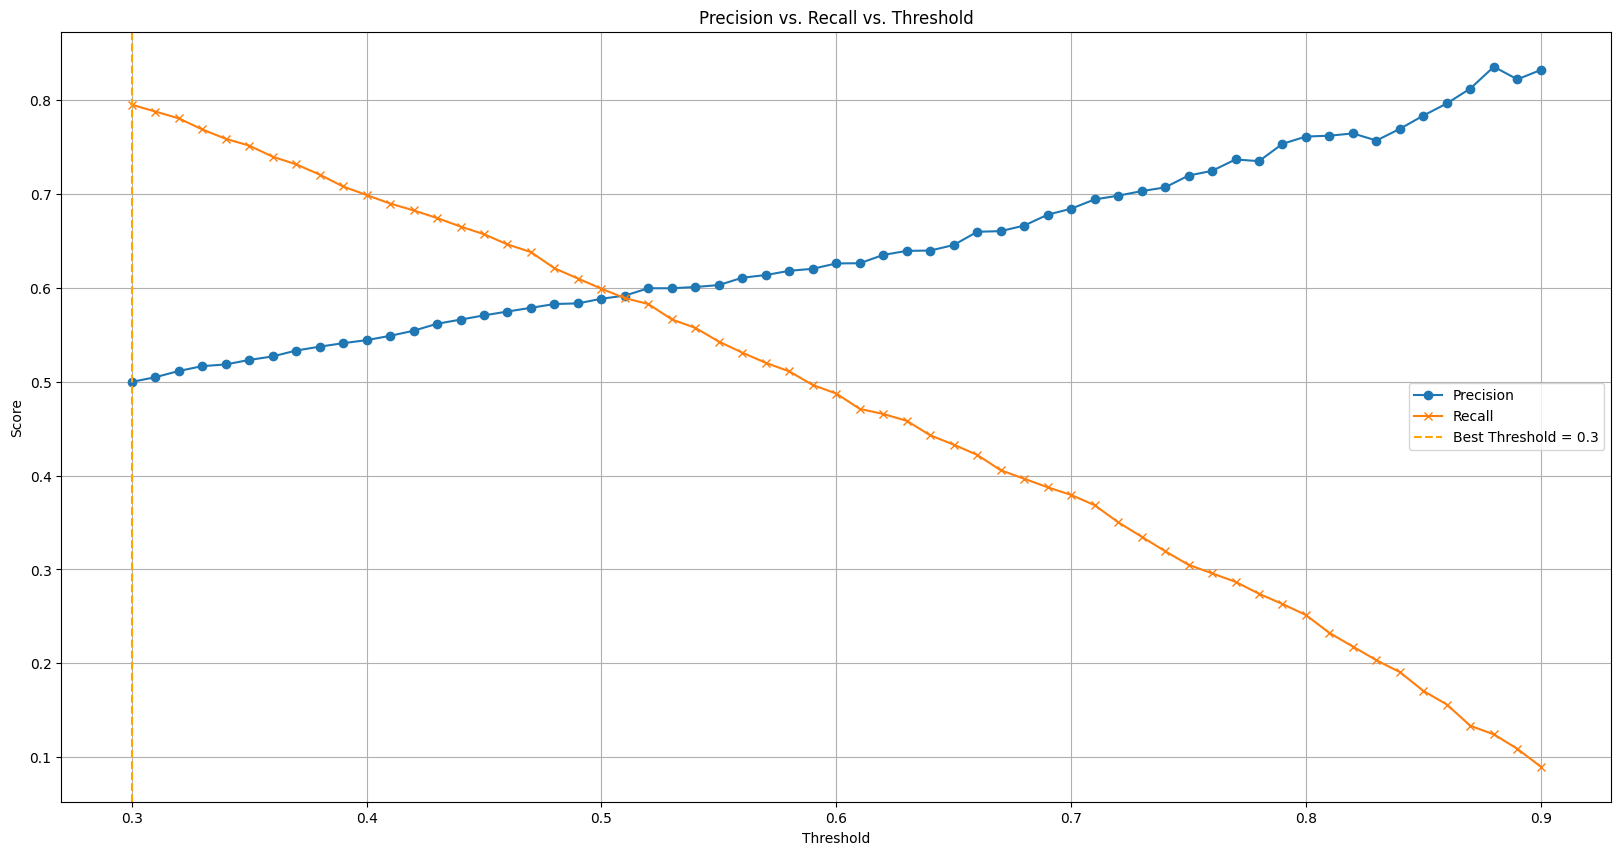

In [323]:
from sklearn.metrics import precision_score
threshold = np.arange(0.1, 0.9, 0.1)
pr = []
rec = []
f1 = [f1_score(Y, (probas >= t).astype(int)) for t in thresholds]

for t in thresholds:
    preds = (probas >= t).astype(int)
    pr.append(precision_score(Y, preds))
    rec.append(recall_score(Y, preds))

plt.figure(figsize = (20, 10))
plt.plot(thresholds, pr, marker = 'o', label = 'Precision')
plt.plot(thresholds, rec, marker = 'x', label = 'Recall')
plt.axvline(best_threshold, color = 'orange', linestyle = '--', label = f'Best Threshold = {best_threshold}')
plt.title("Precision vs. Recall vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.show()

In [331]:
plt.savefig("threshold_tuning_plot.png")

<Figure size 640x480 with 0 Axes>

In [333]:
lr_model = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear', class_weight={0: 1, 1: 1.5})

lr_model.fit(x_train_res_lr, y_train_res_lr)
y_pred_final = lr_model.predict(x_test_lr)

accu = accuracy_score(y_test_lr, y_pred_final)
clsr = classification_report(y_test_lr, y_pred_final)
cnfm = confusion_matrix(y_test_lr, y_pred_final)

print("✅Accuracy on Final Test Set: ", accu)
print("✅Confusion Matrix of Final Test Set: ", cnfm)
print("✅Classification Report on Final Set: ", clsr)

✅Accuracy on Final Test Set:  0.778534923339012
✅Confusion Matrix of Final Test Set:  [[1018  264]
 [ 126  353]]
✅Classification Report on Final Set:                precision    recall  f1-score   support

           0       0.89      0.79      0.84      1282
           1       0.57      0.74      0.64       479

    accuracy                           0.78      1761
   macro avg       0.73      0.77      0.74      1761
weighted avg       0.80      0.78      0.79      1761

